In [1]:
# Hello Lab 1!

In [1]:
import matplotlib.pylab as pl
import numpy as np
import ugradio
%matplotlib inline

sample_1.npy
[ 13312   5376  -4864 ..., -14848 -16128 -11008]
[ 13312   5376  -4864 ..., -14848 -16128 -11008]


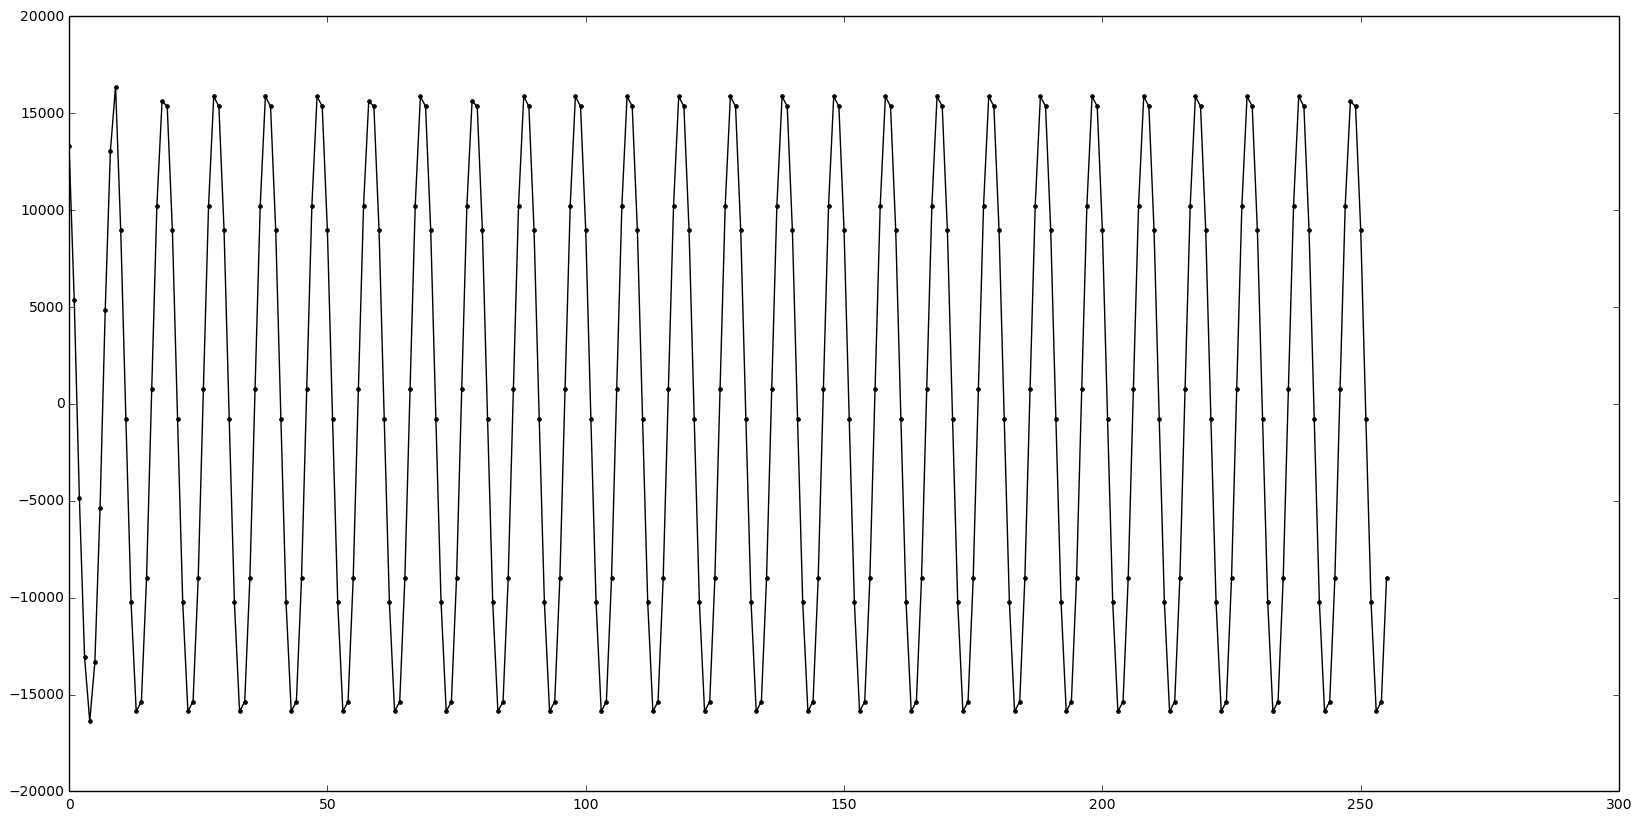

In [111]:
filename = "sample_" + str(i) + ".npy"
i+=1
print filename
arr = ugradio.pico.read_socket("2V", 10)
print arr
np.save(filename, arr)
print np.load(filename)
arr_plot = np.load(filename)
pl.figure(i, figsize=(20,10))
pl.plot(arr_plot[:256], 'k.-')

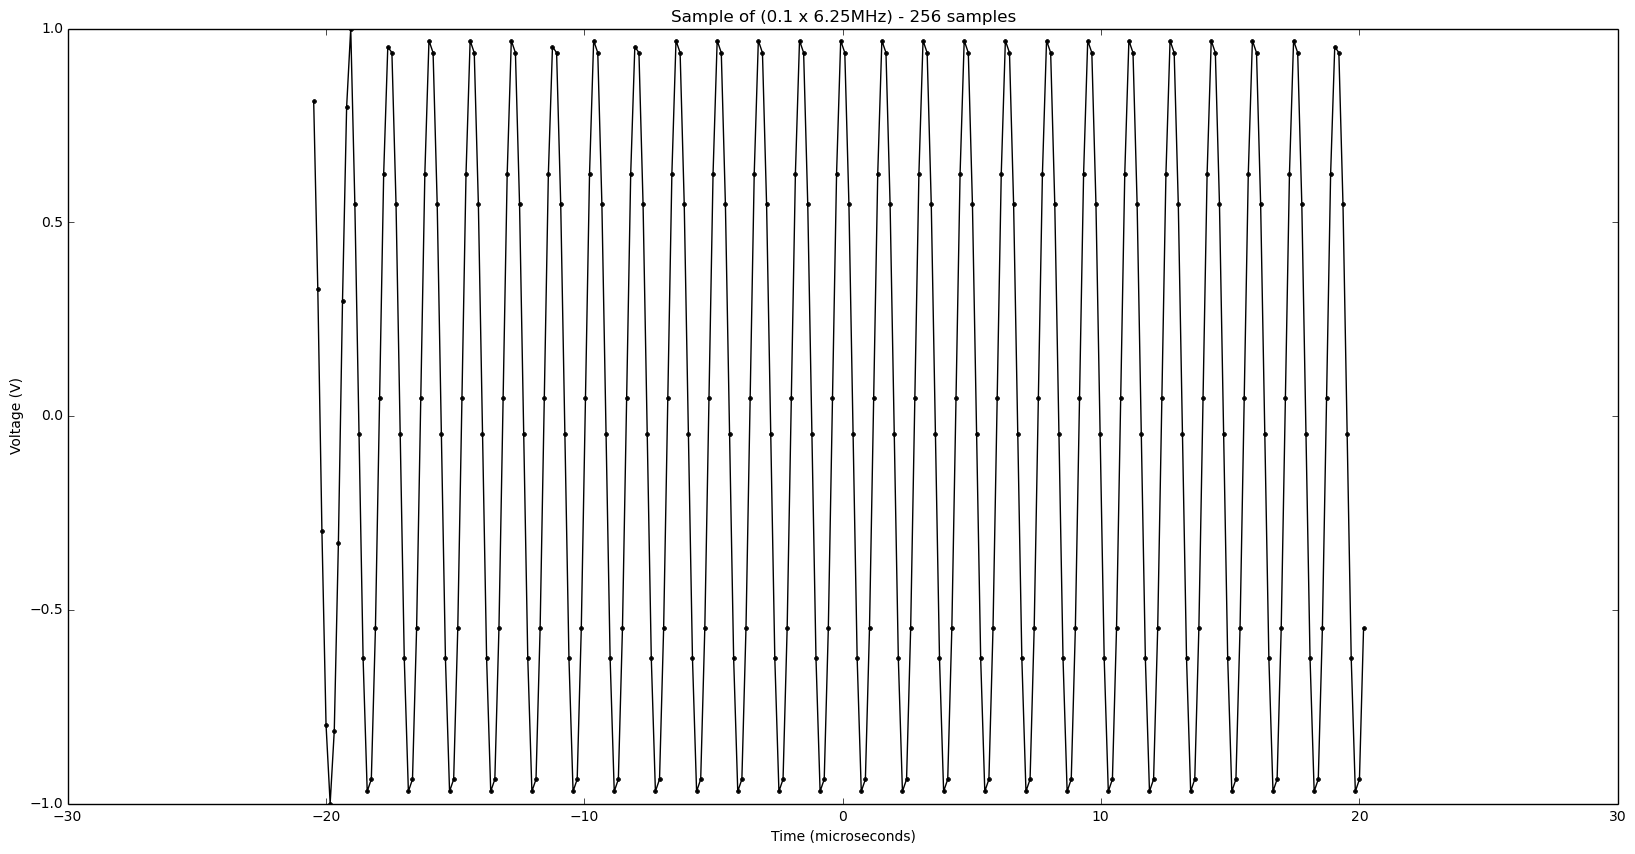

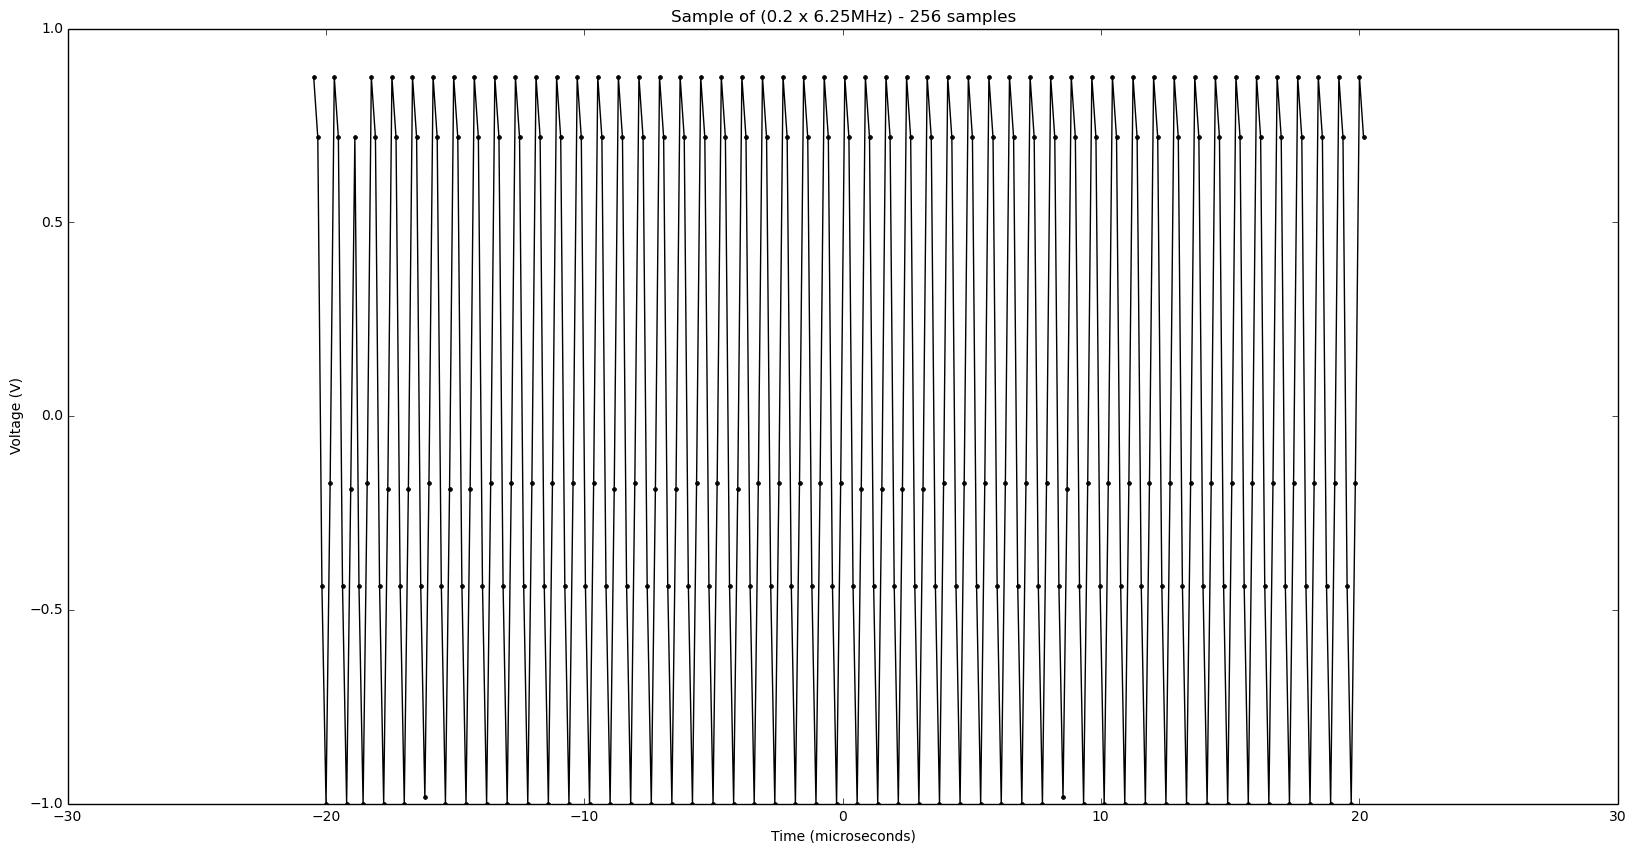

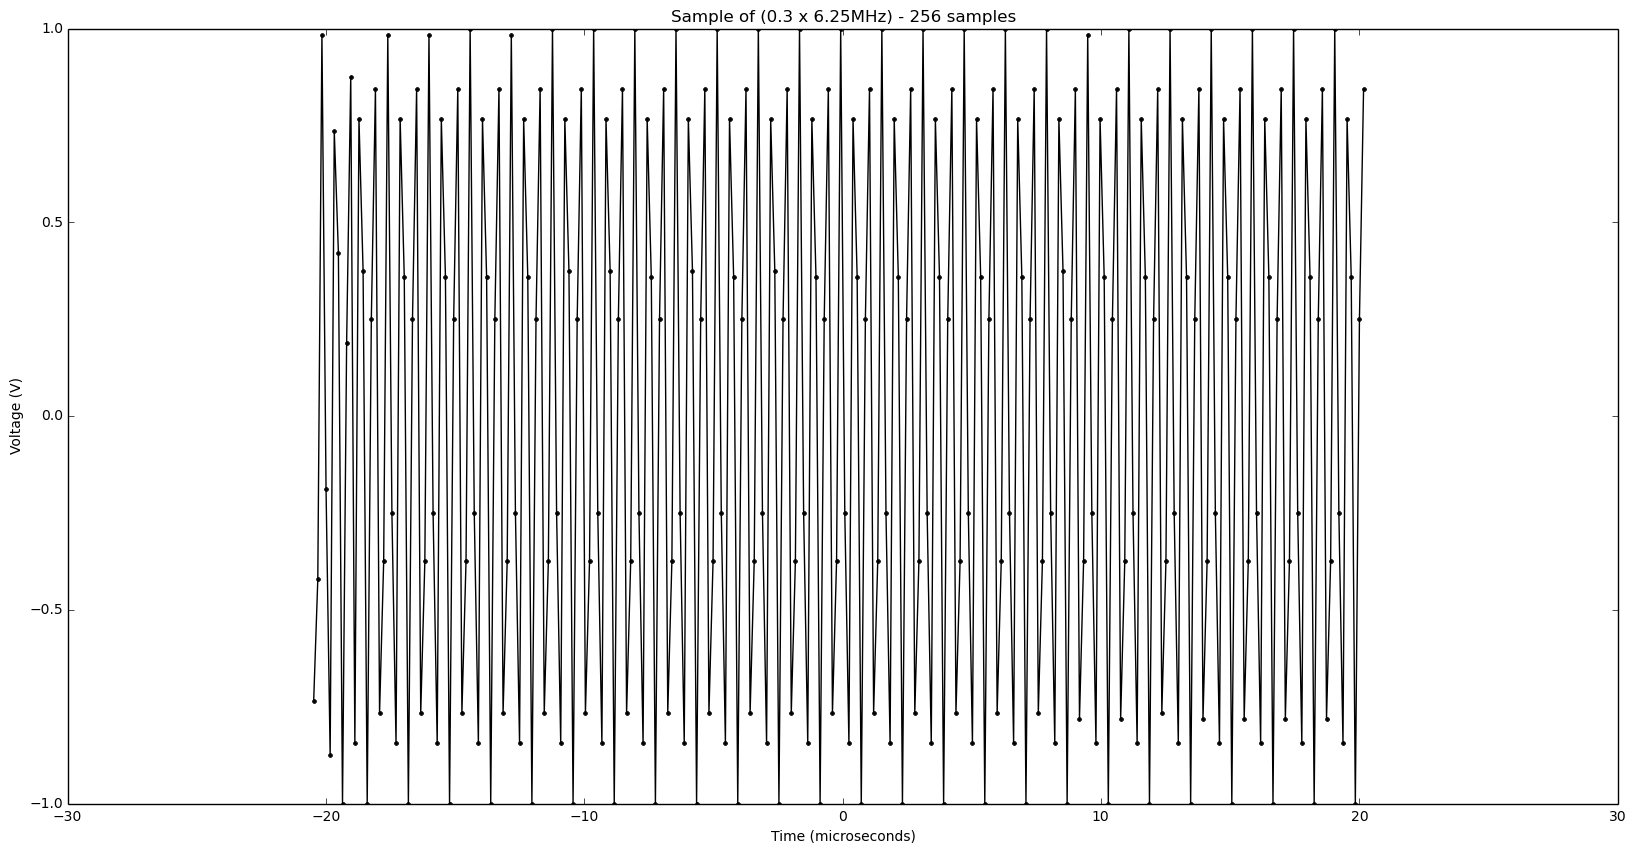

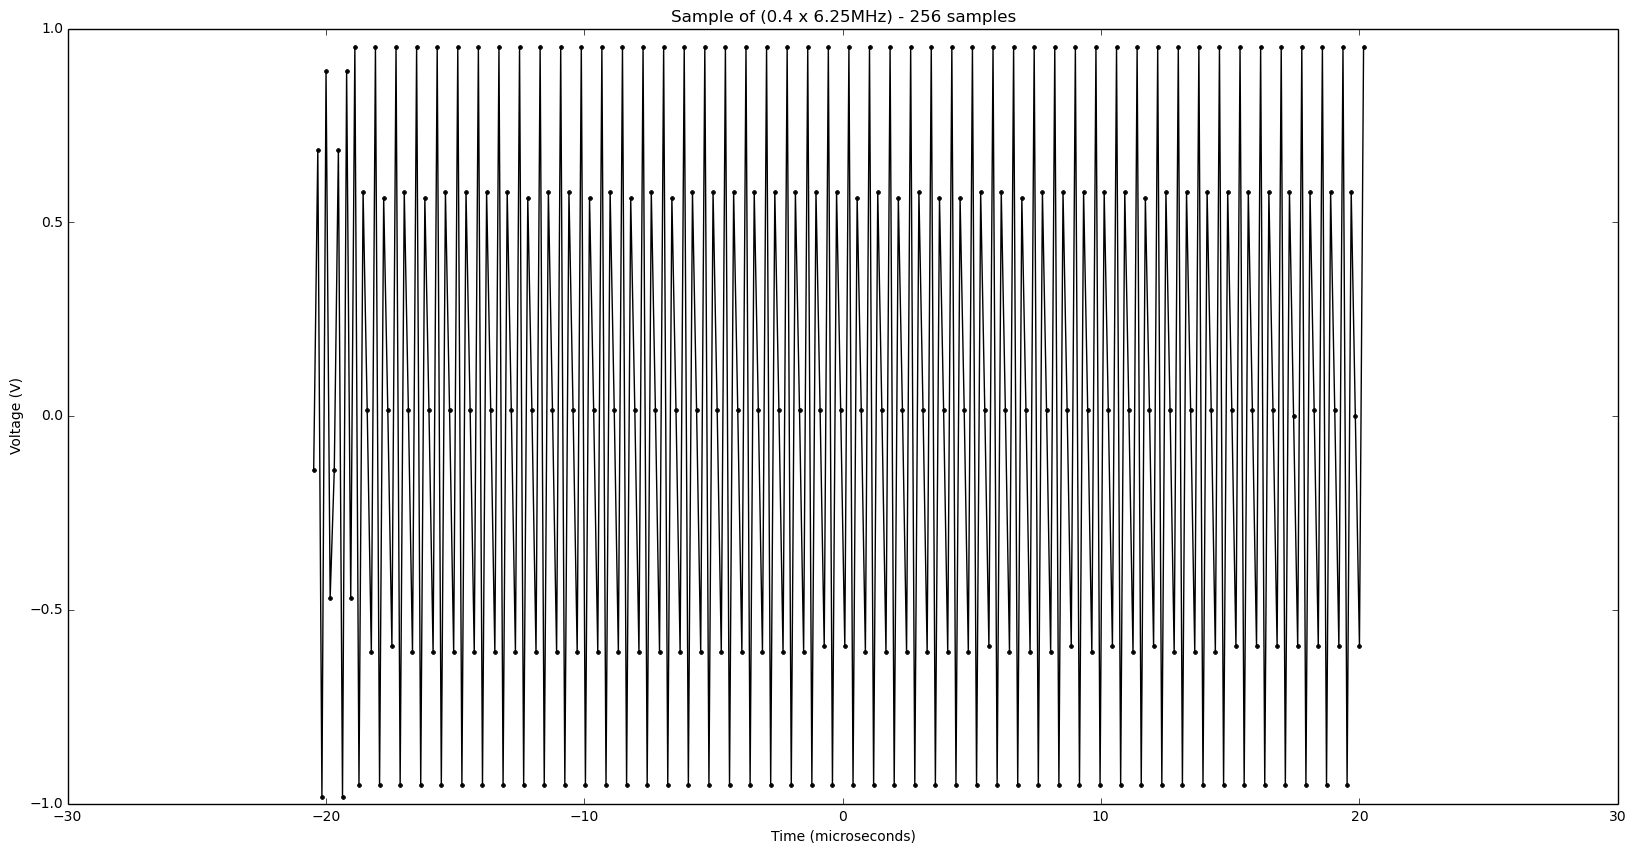

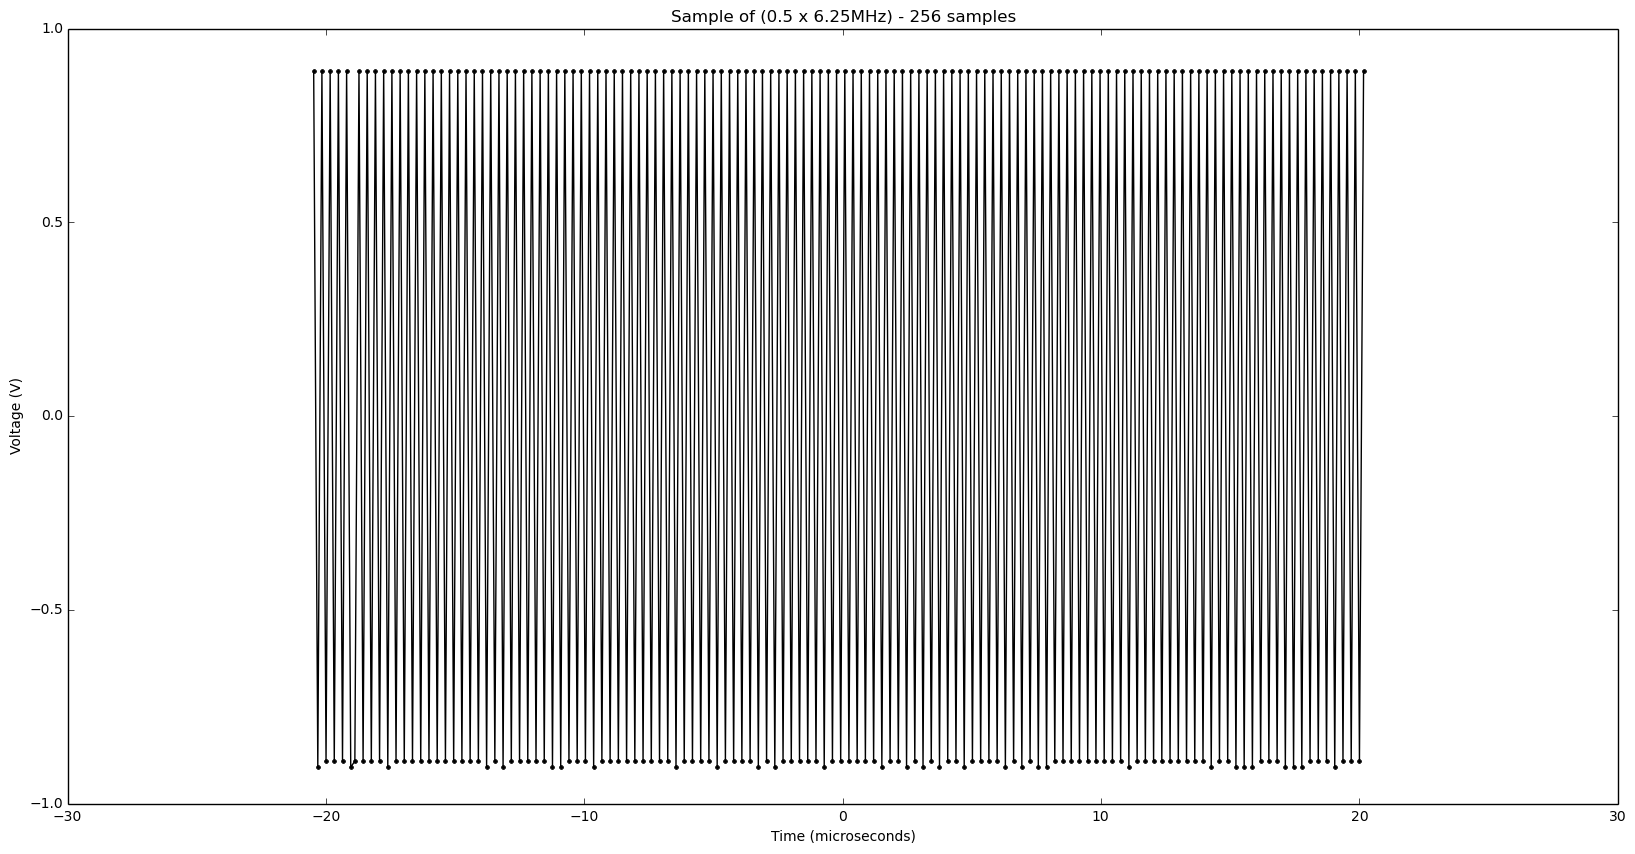

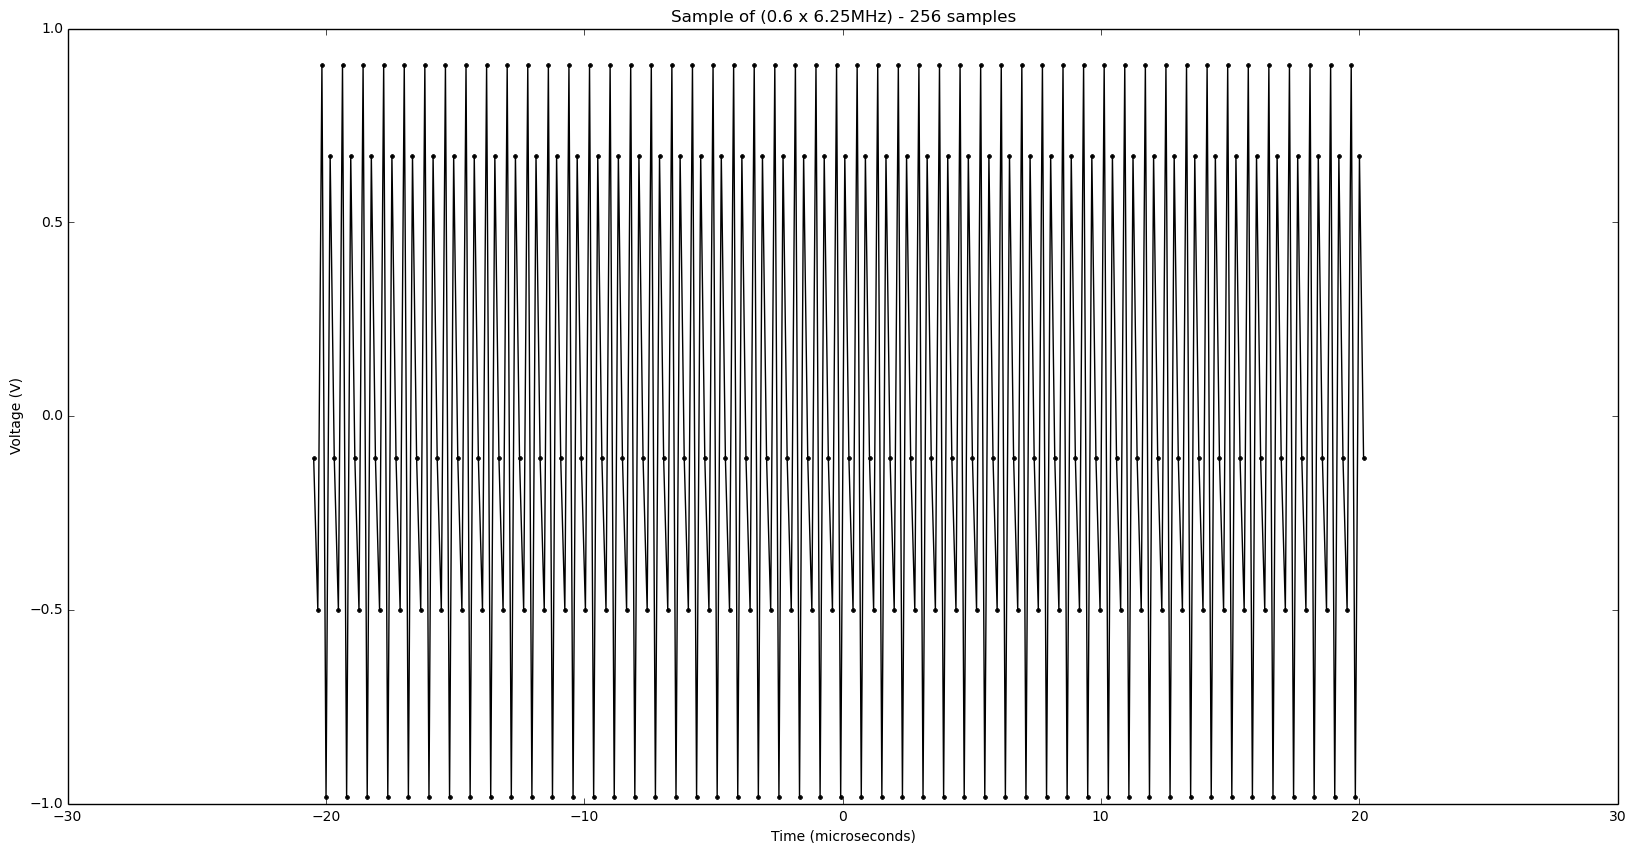

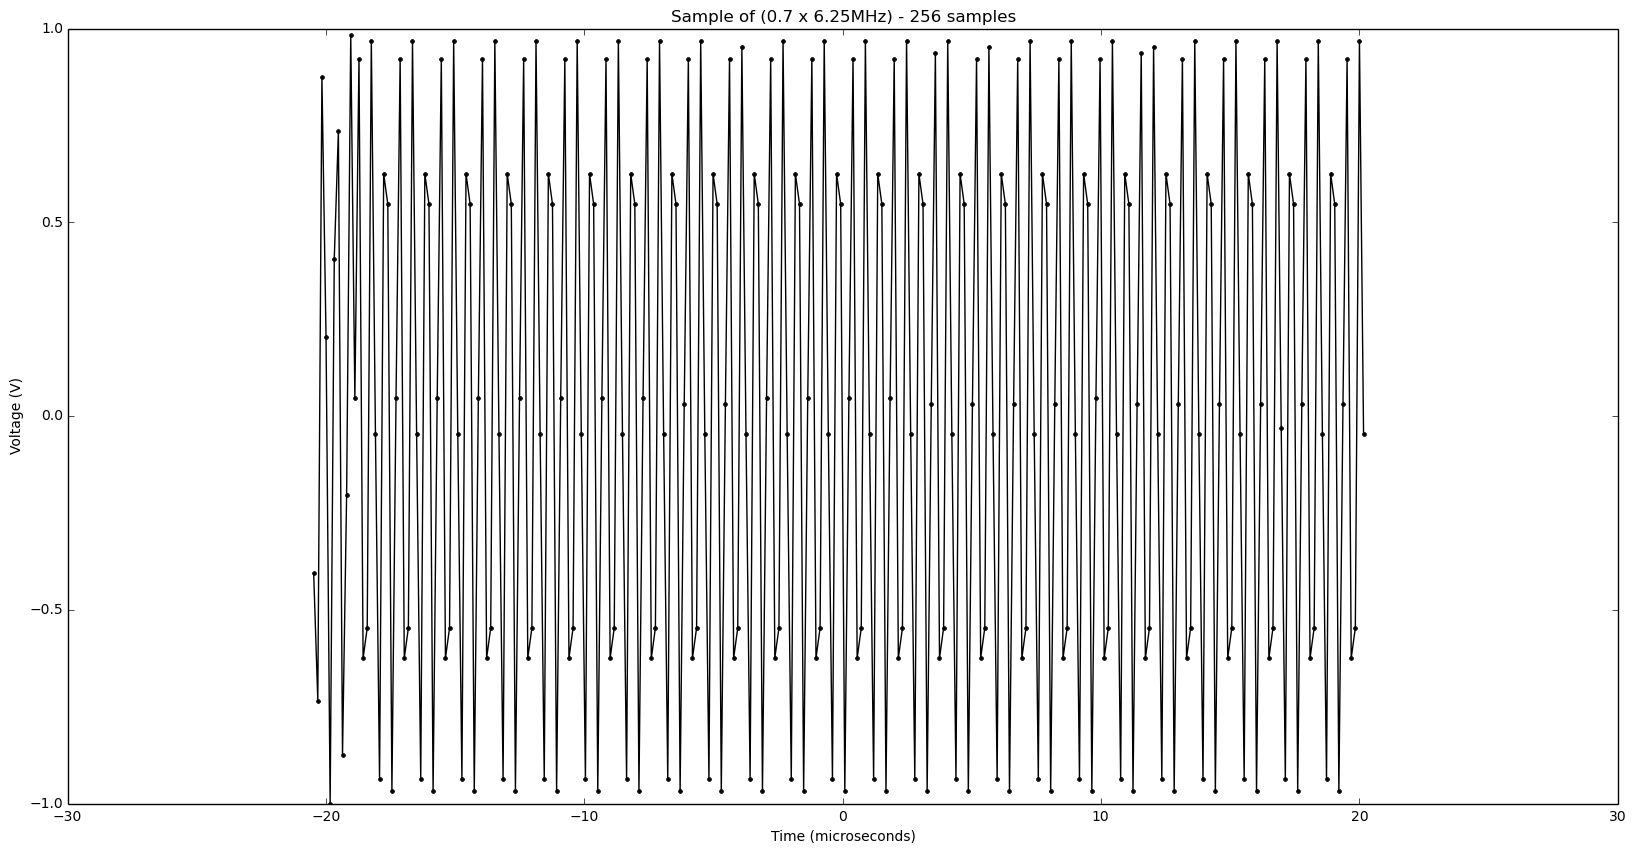

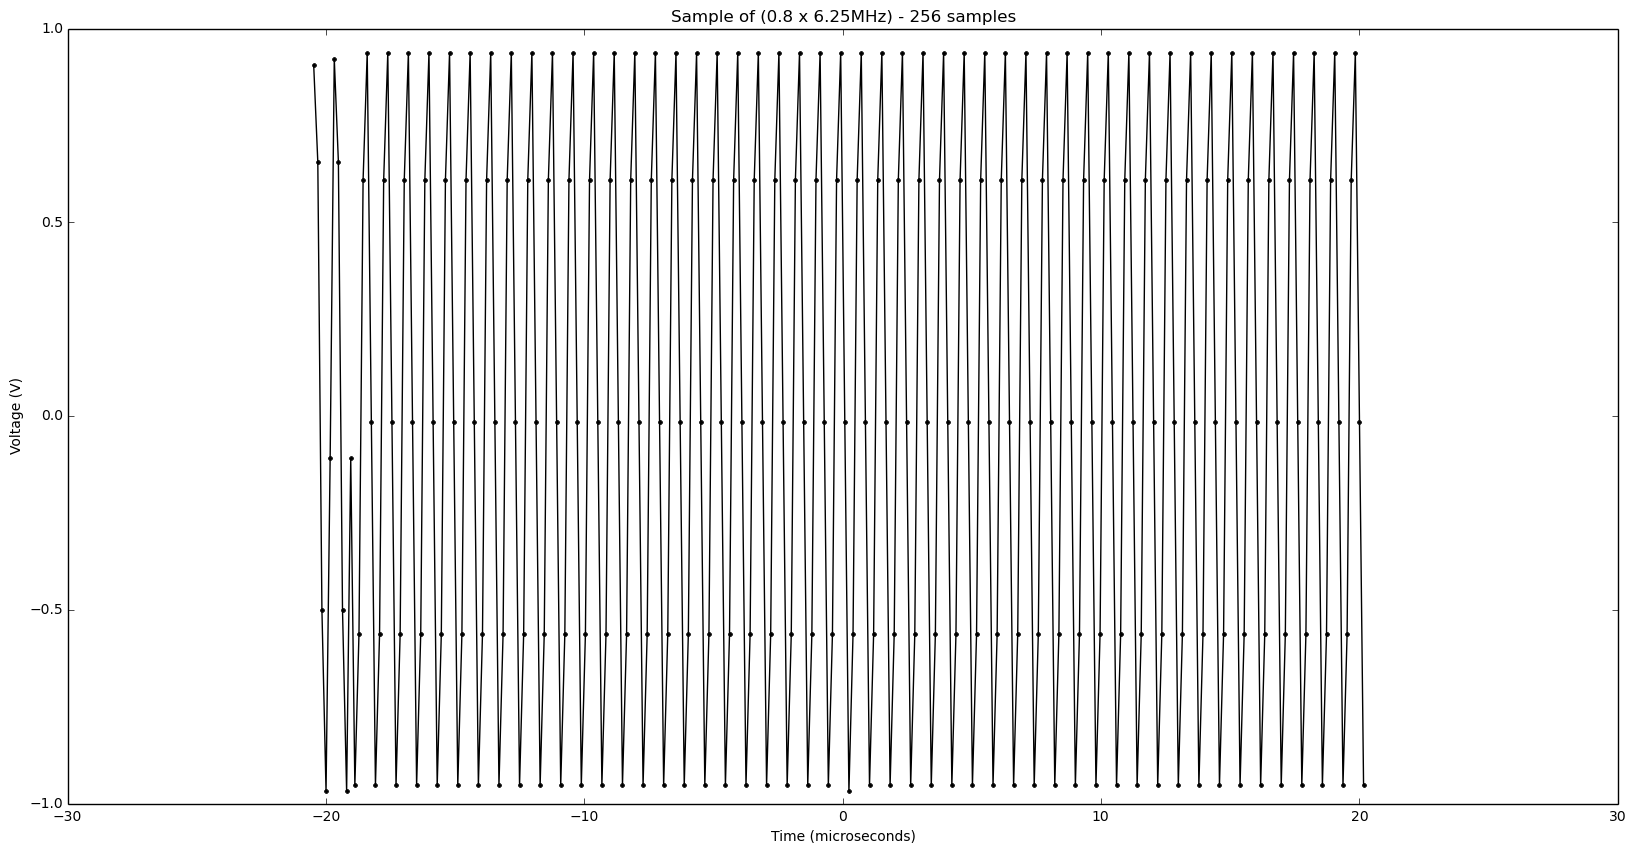

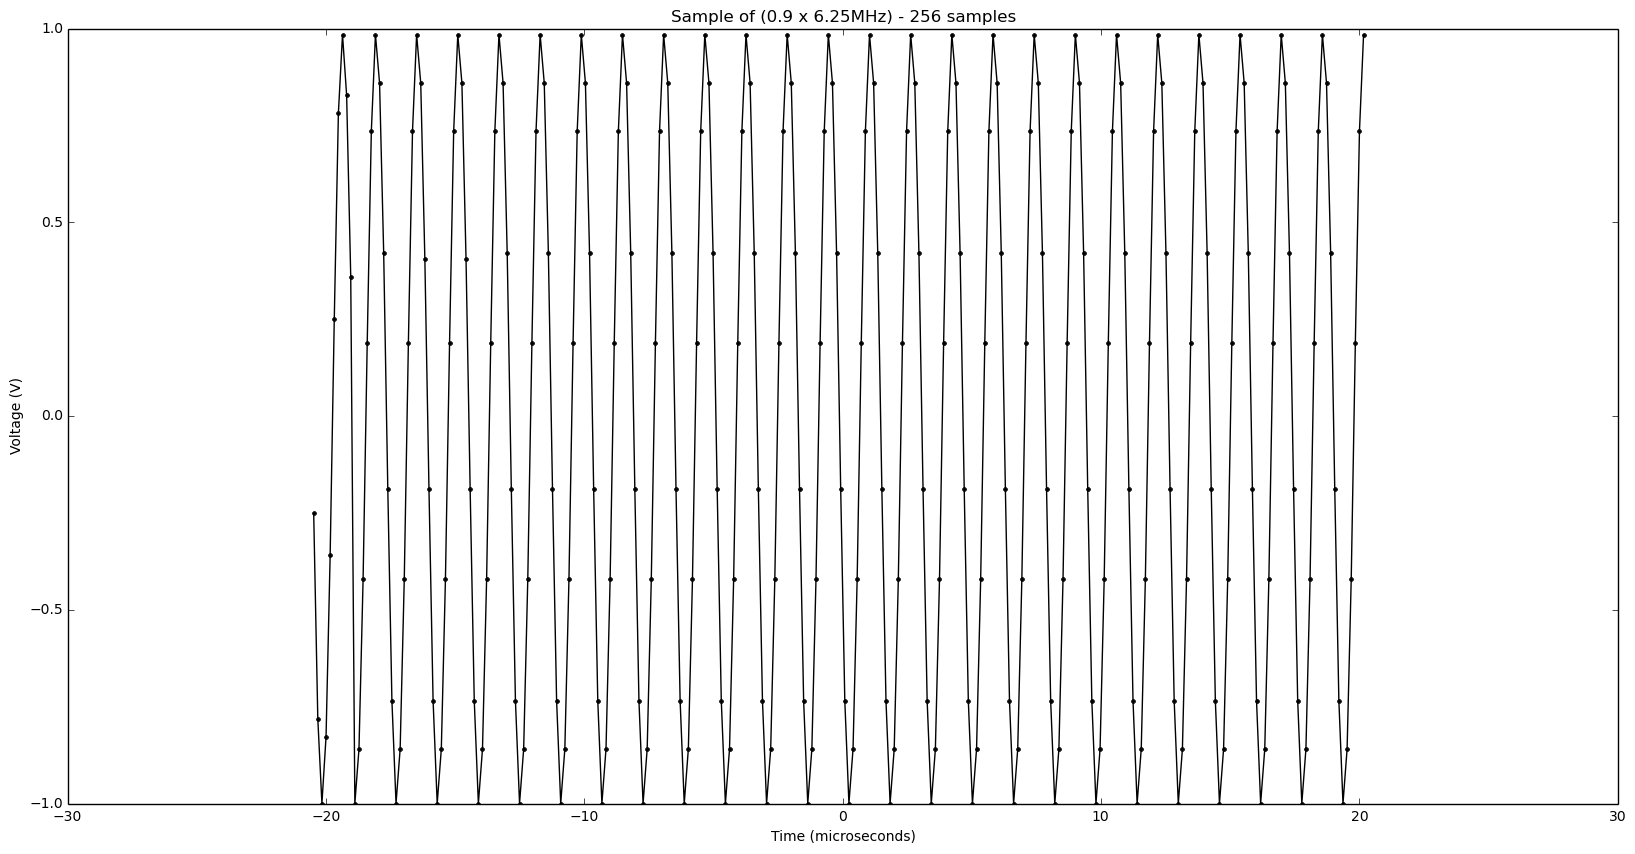

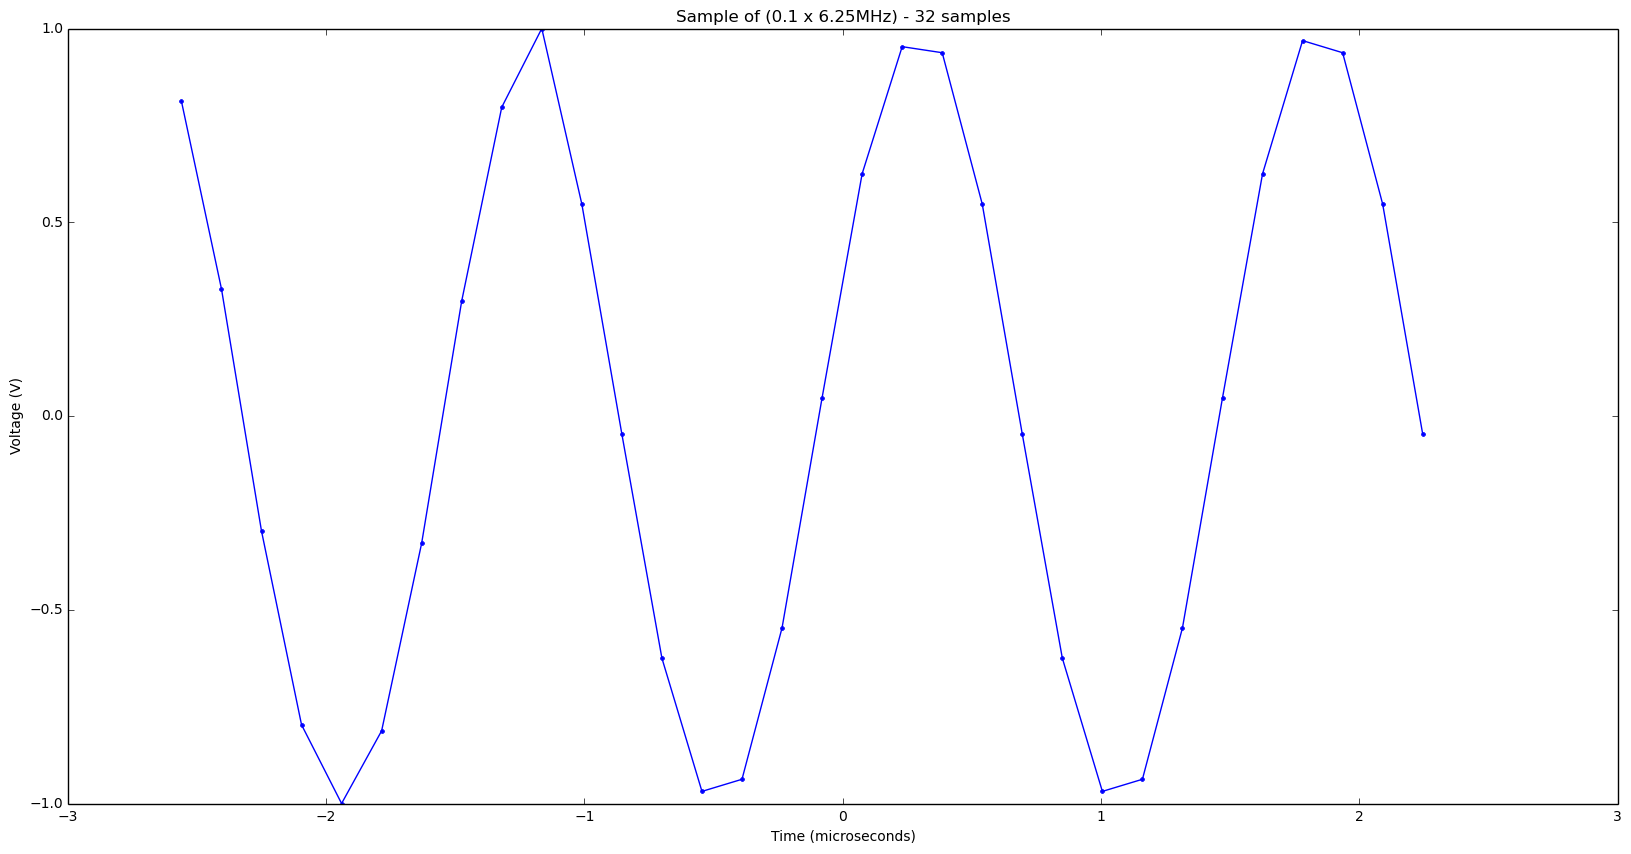

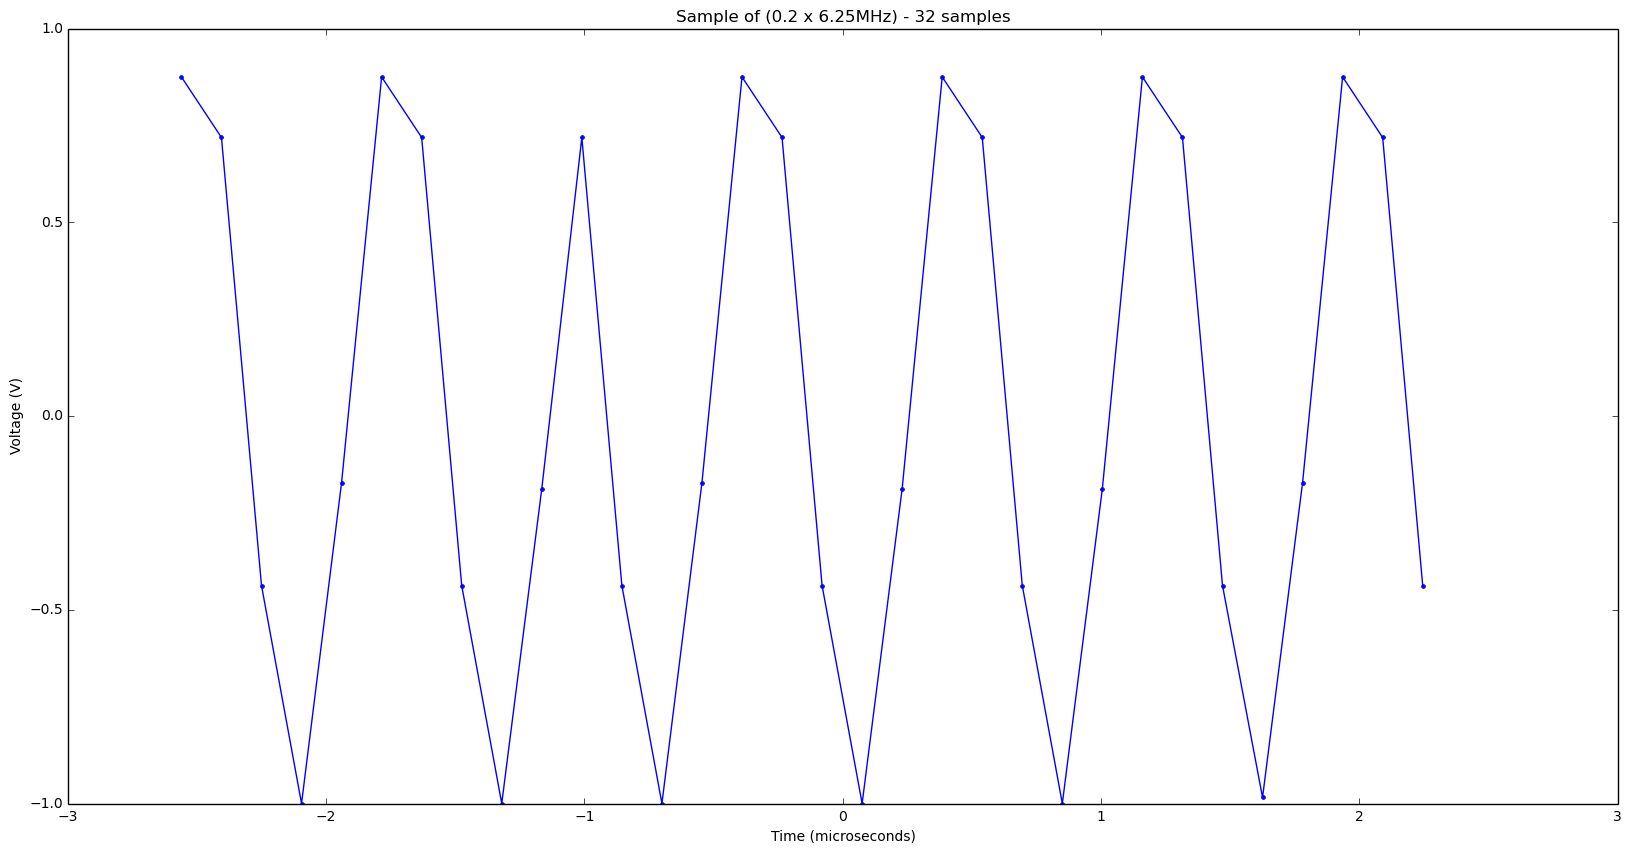

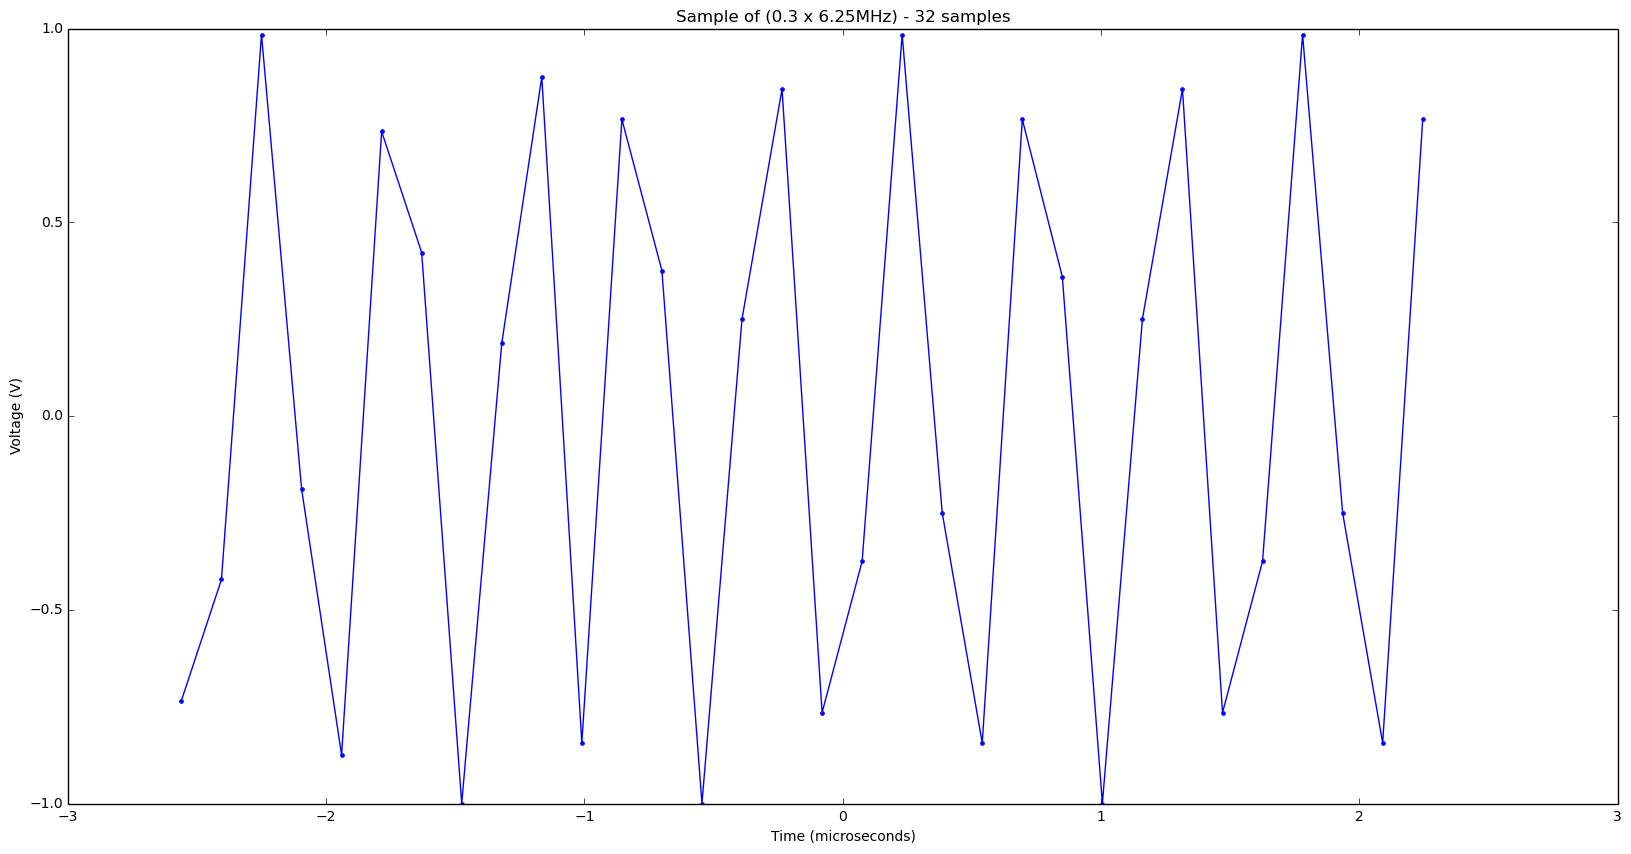

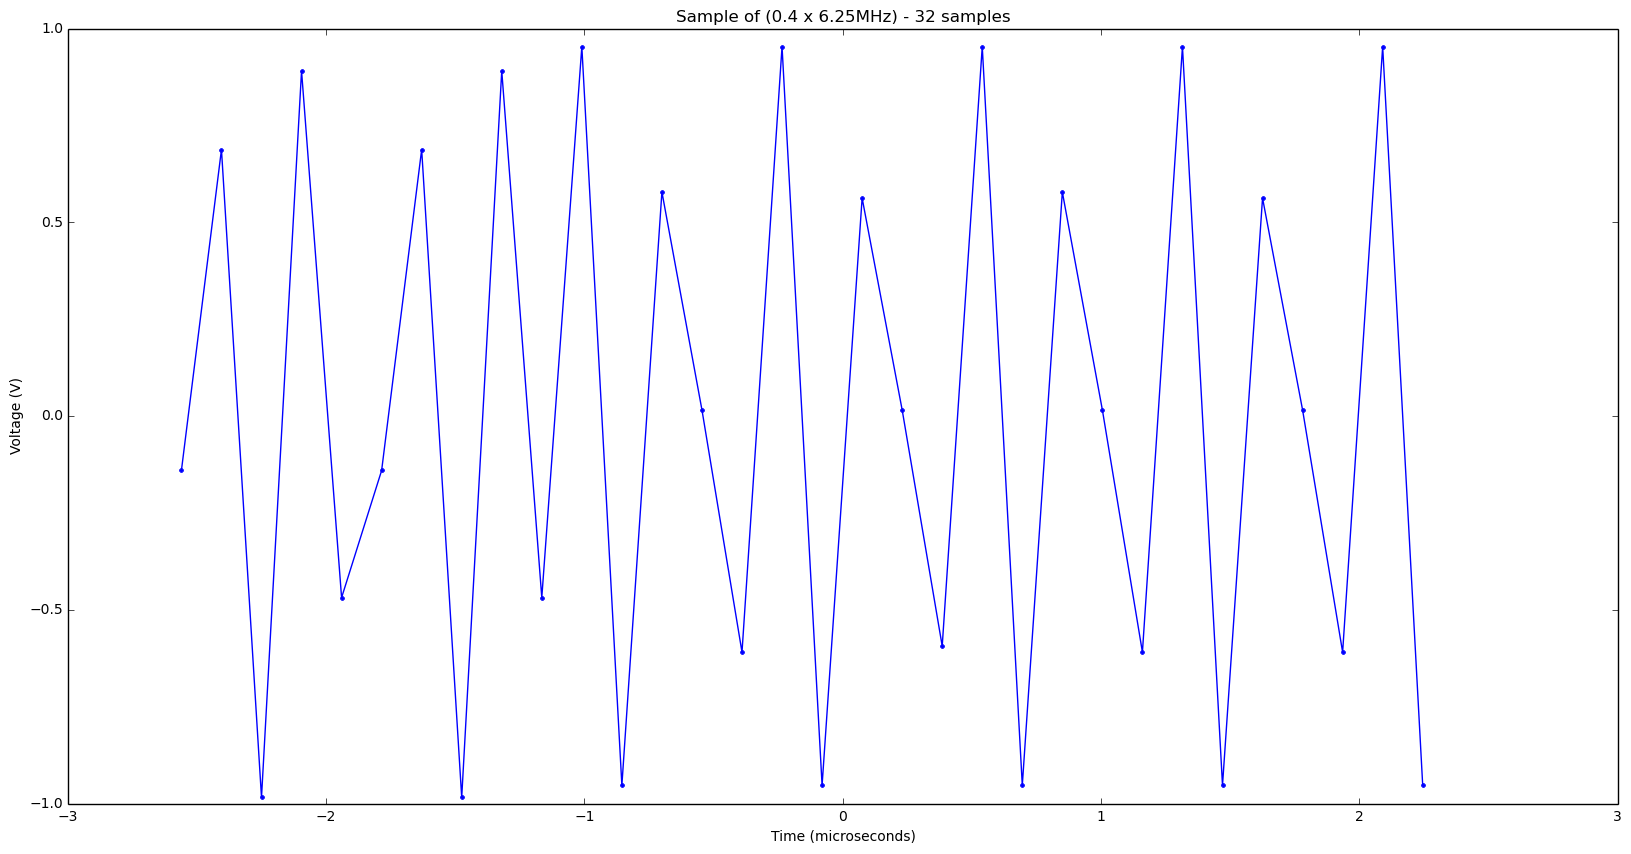

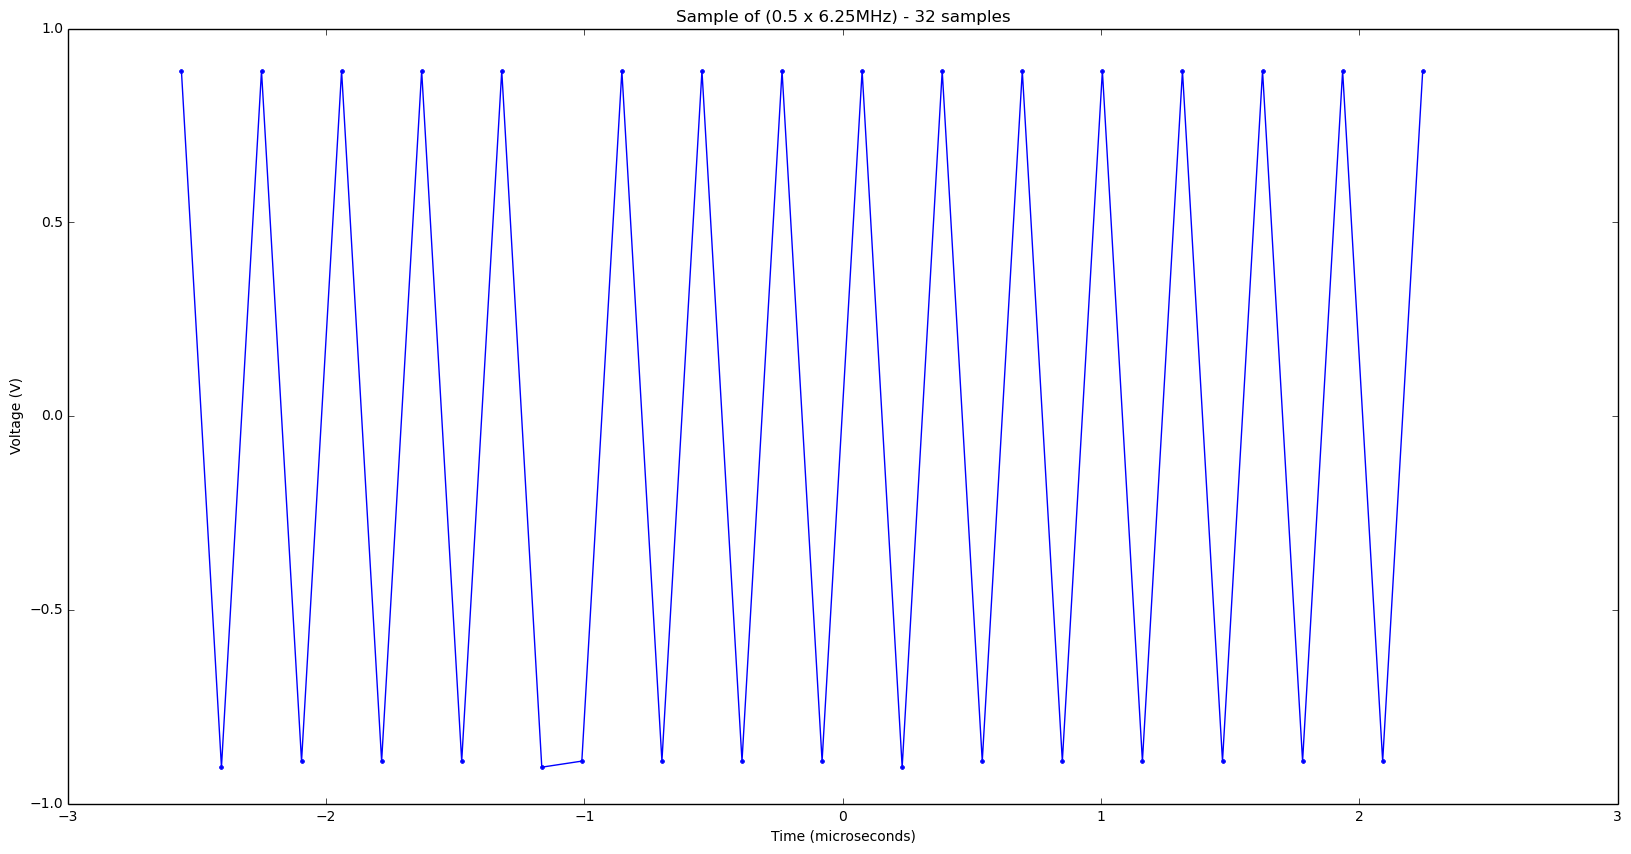

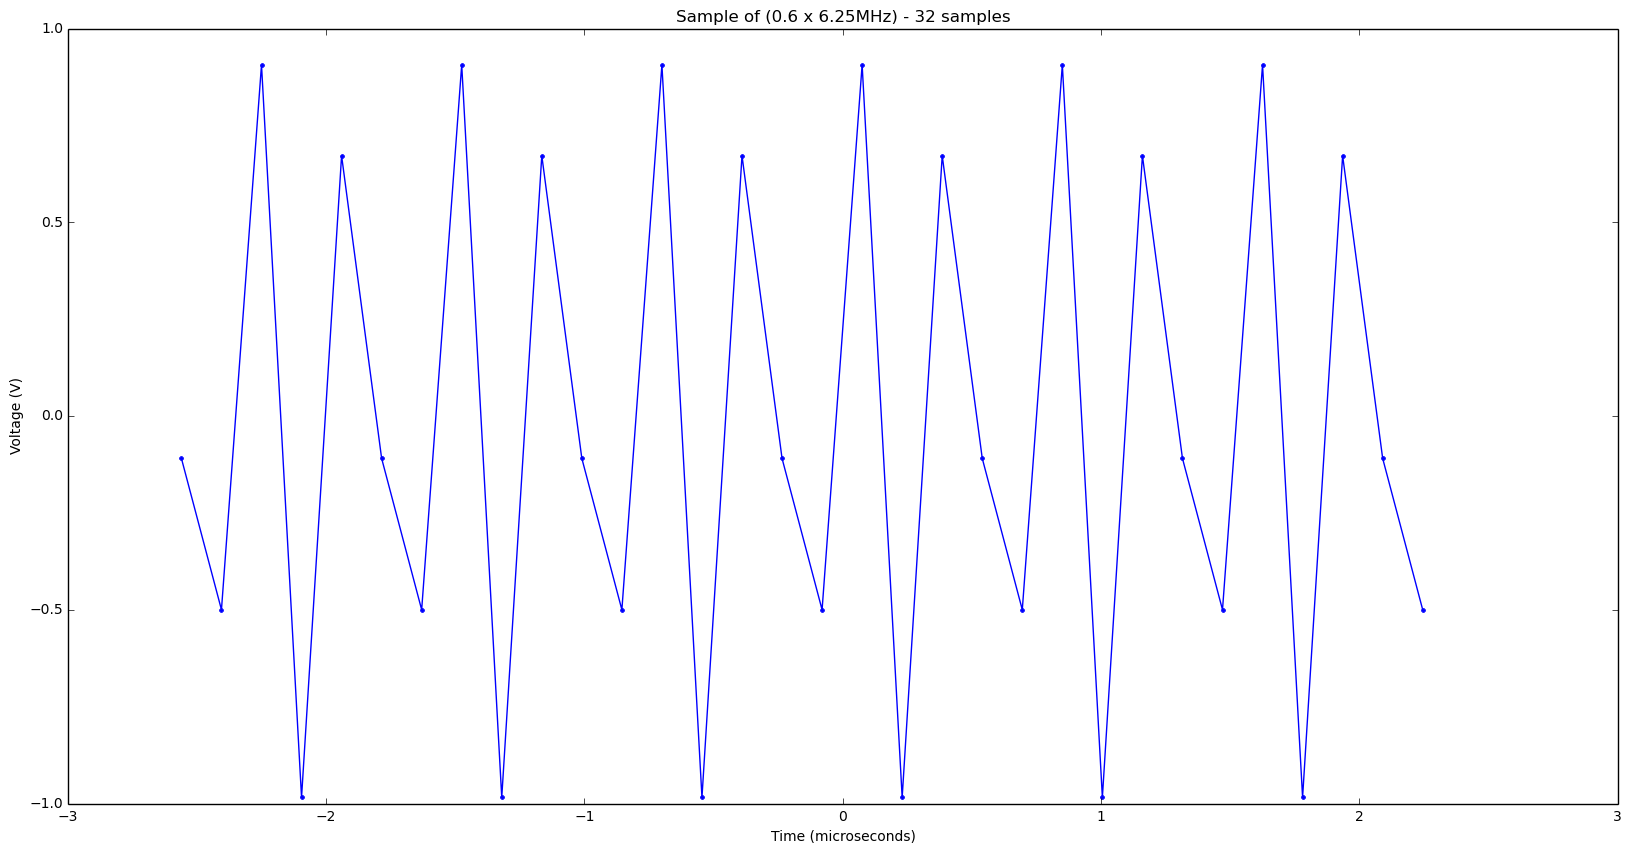

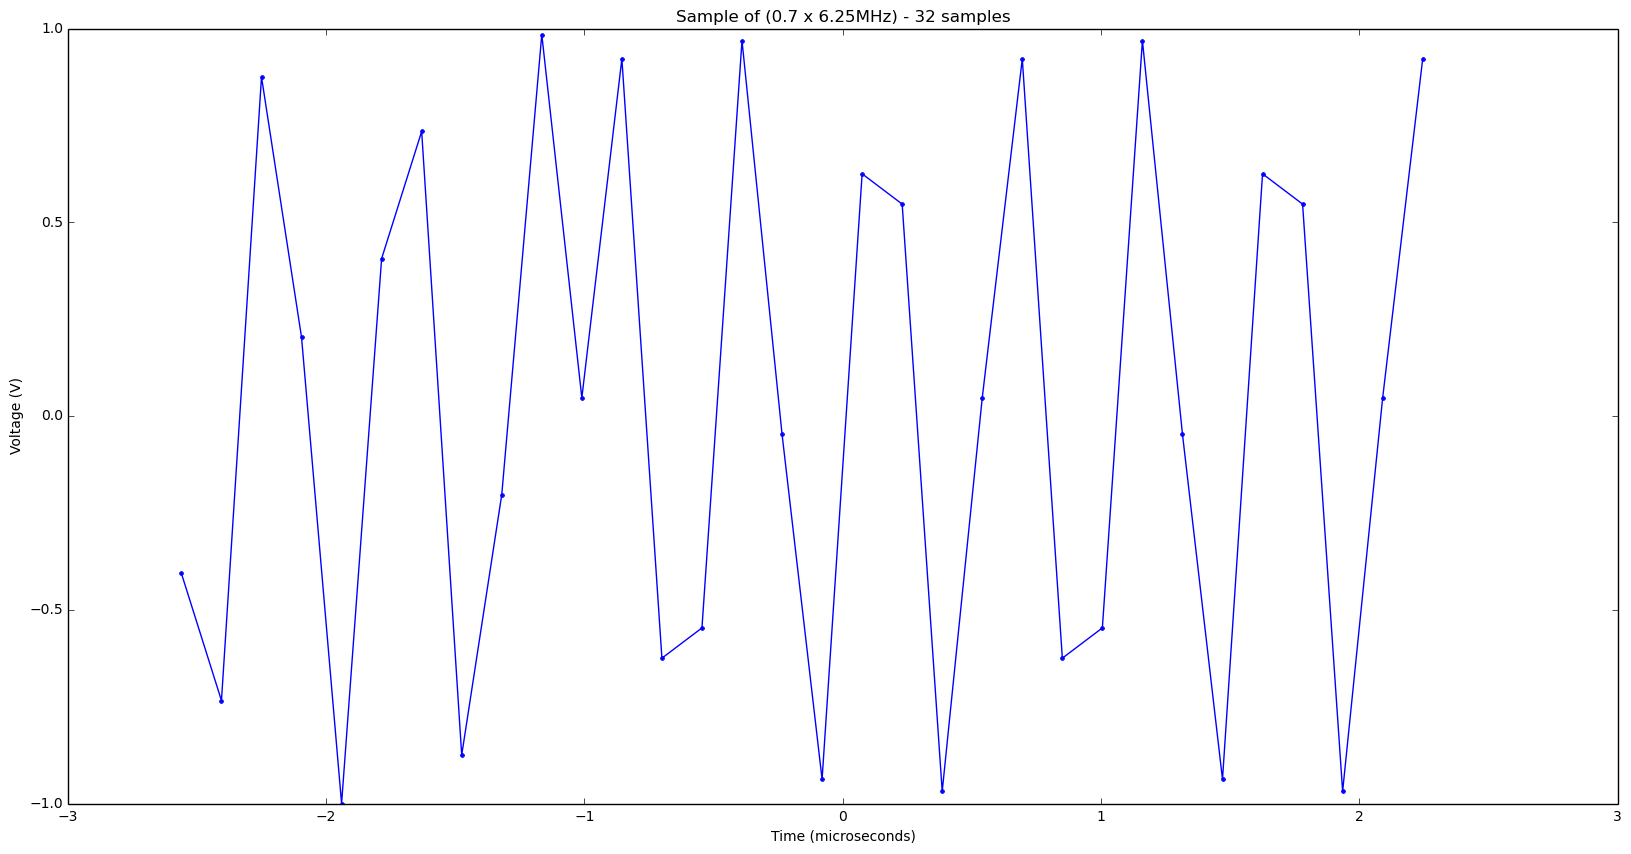

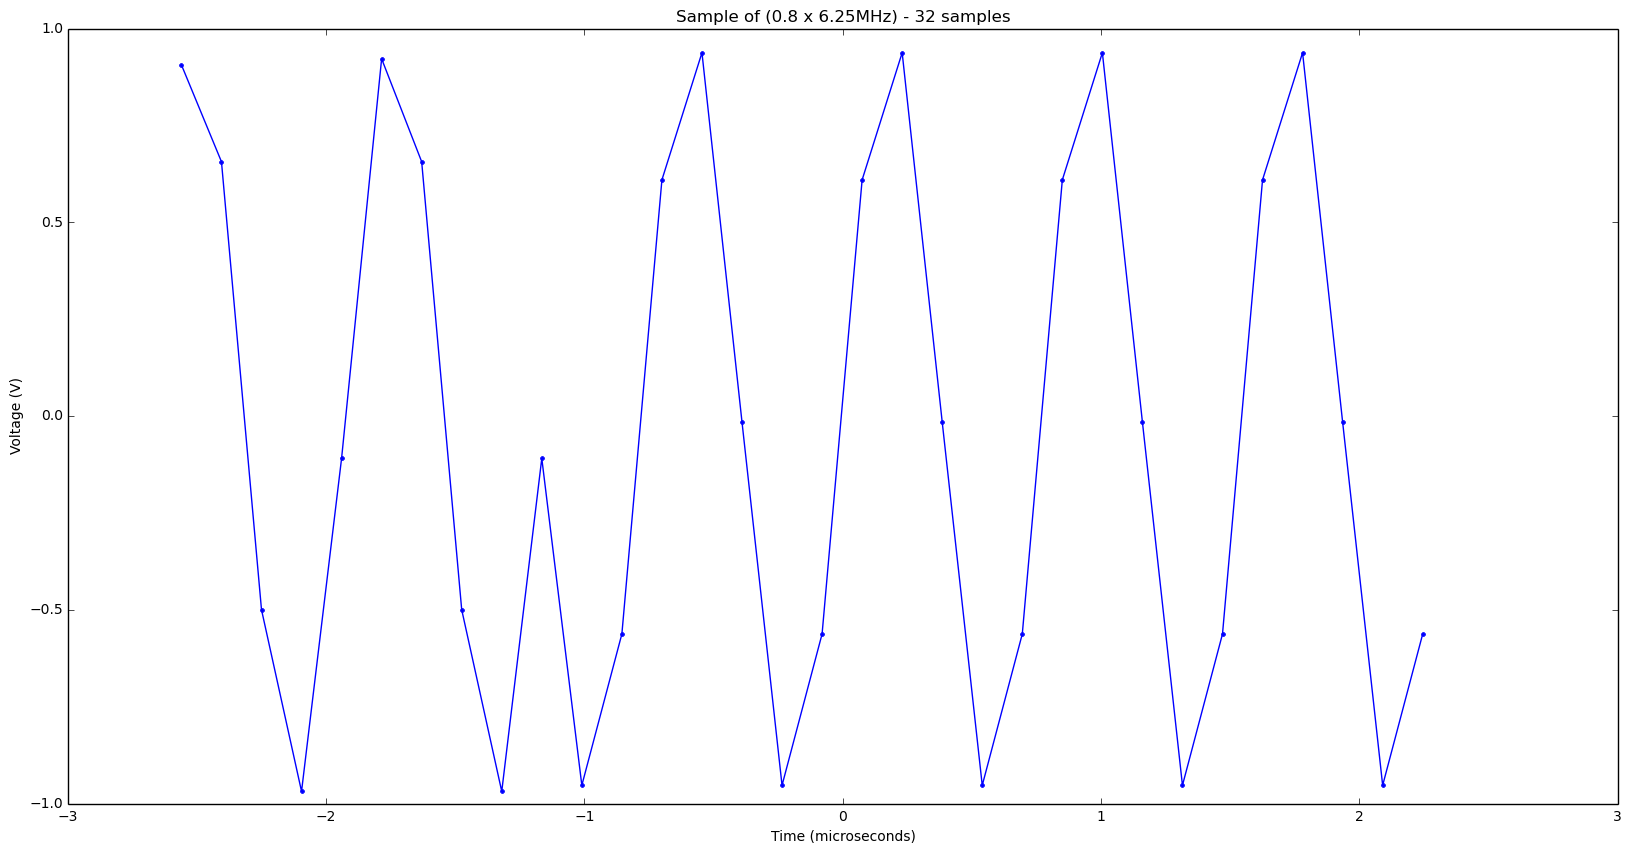

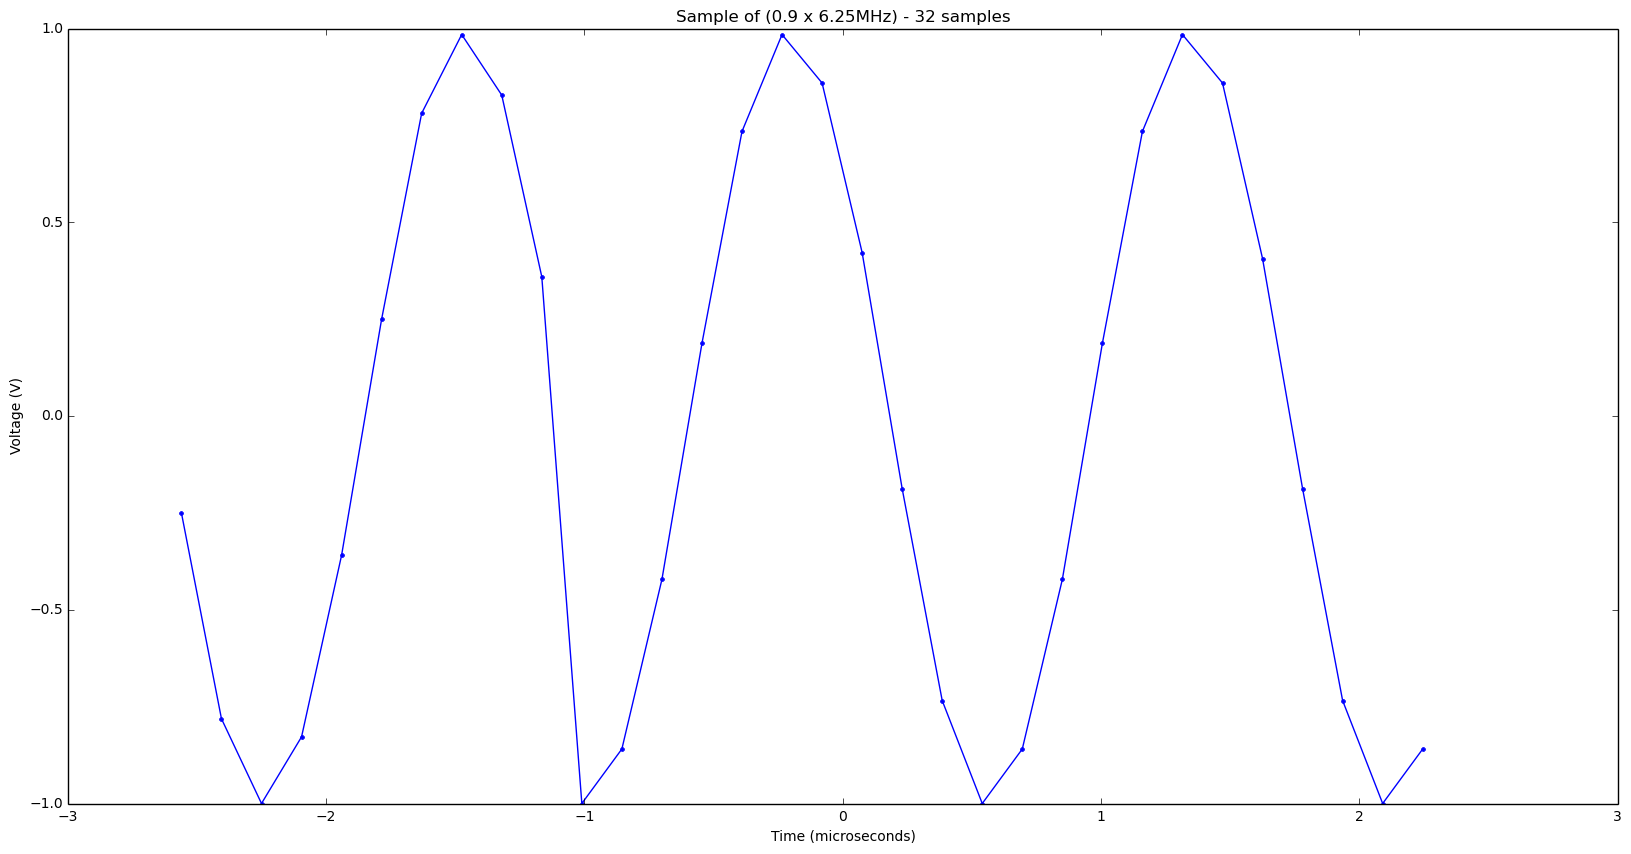

In [28]:
i = 1
N = 256
v_samp = 6.25 #MHz
for i in range(1, 10):
    filename = "sample_" + str(i) + ".npy"
    arr_plot = np.load(filename)
    arr_plot = np.divide(arr_plot, 16384.0)
    x_scale = np.linspace(-N/(2*v_samp), (N/2 - 1)/v_samp,num=N,endpoint=False)
    pl.figure(i, figsize=(20,10))
    pl.title("Sample of (0." + str(i) + " x " + str(v_samp) + "MHz) - " + str(N) + " samples")
    pl.ylabel('Voltage (V)')
    pl.xlabel('Time (microseconds)')
    pl.plot(x_scale, arr_plot[:N], 'k.-')
    
    x_scale_small = np.linspace(-(N/8)/(2*v_samp), ((N/8)/2 - 1)/v_samp, num = N/8, endpoint=False)
    pl.figure(i+9, figsize=(20,10))
    pl.title("Sample of (0." + str(i) + " x " + str(v_samp) + "MHz) - " + str(N/8) + " samples")
    pl.ylabel('Voltage (V)')
    pl.xlabel('Time (microseconds)')
    pl.plot(x_scale_small, arr_plot[:(N/8)], 'b.-')

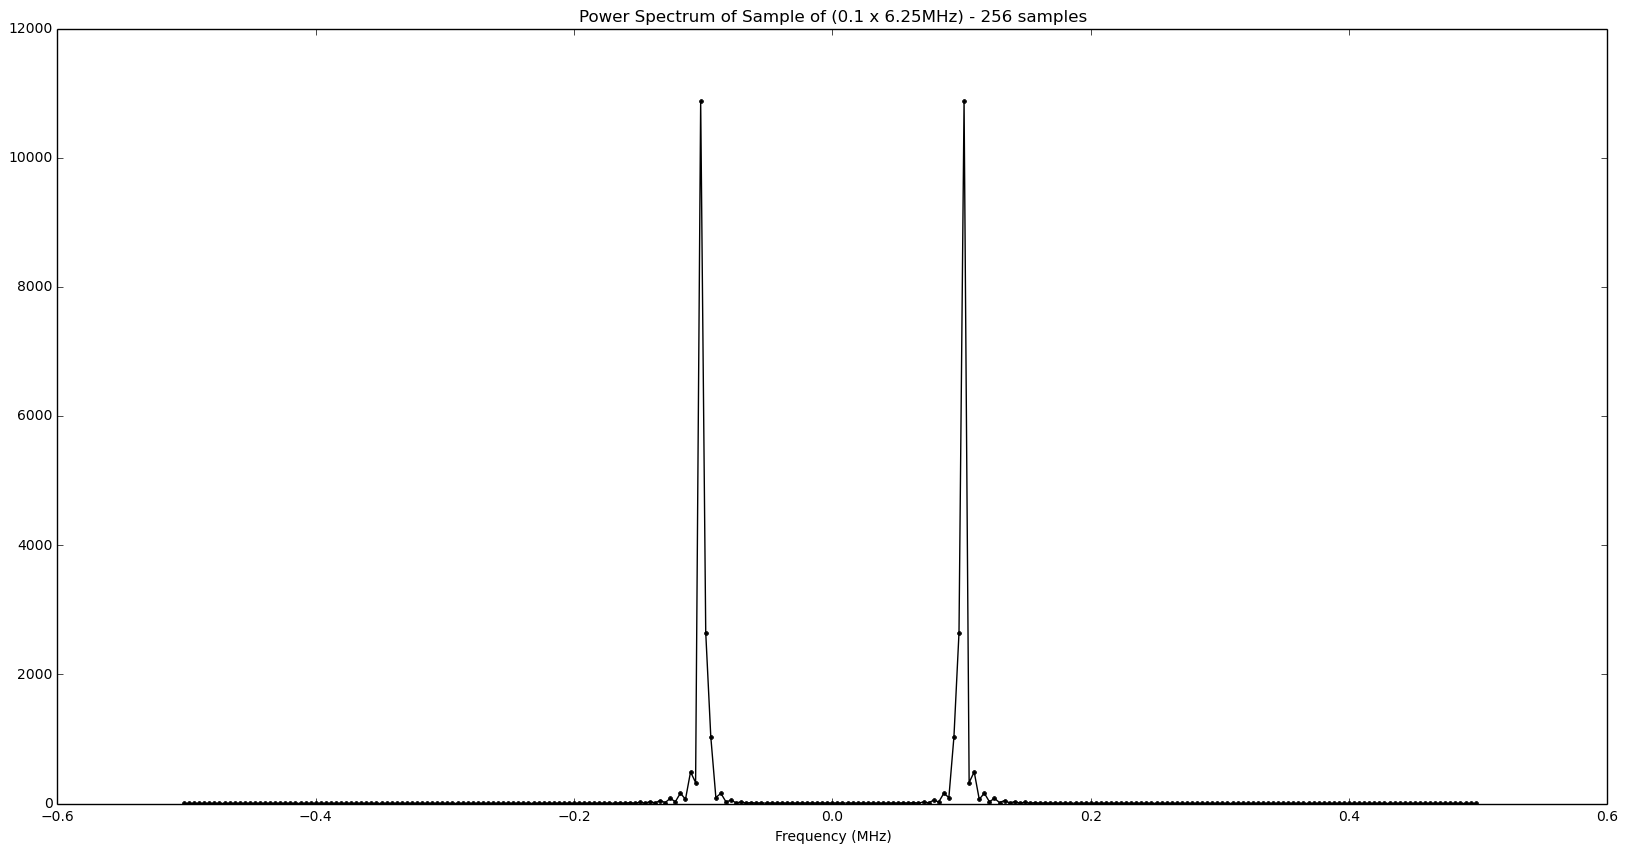

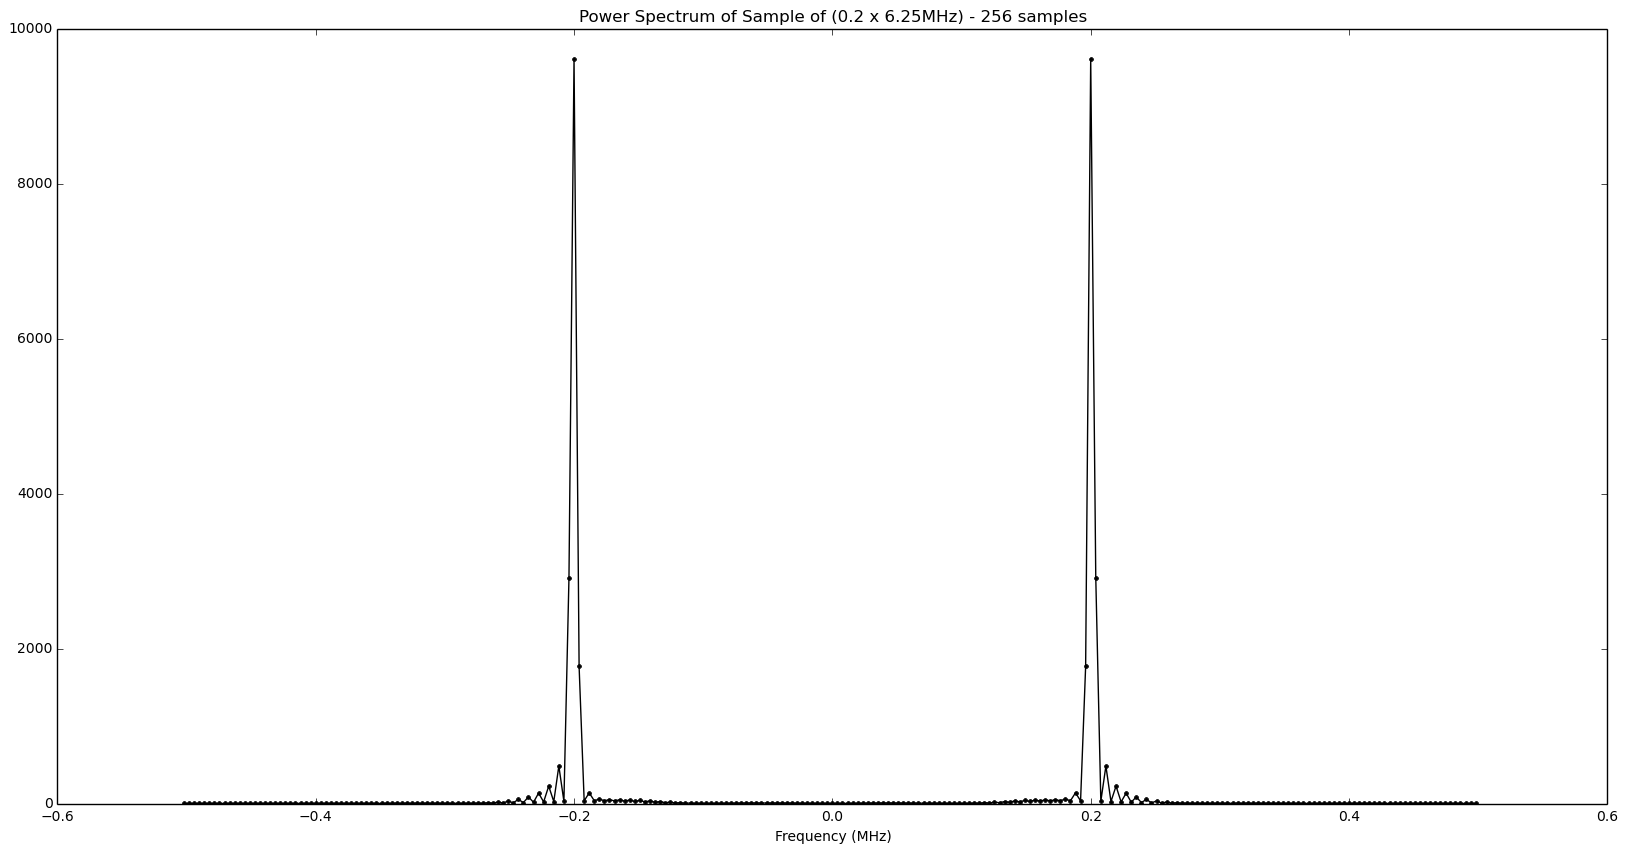

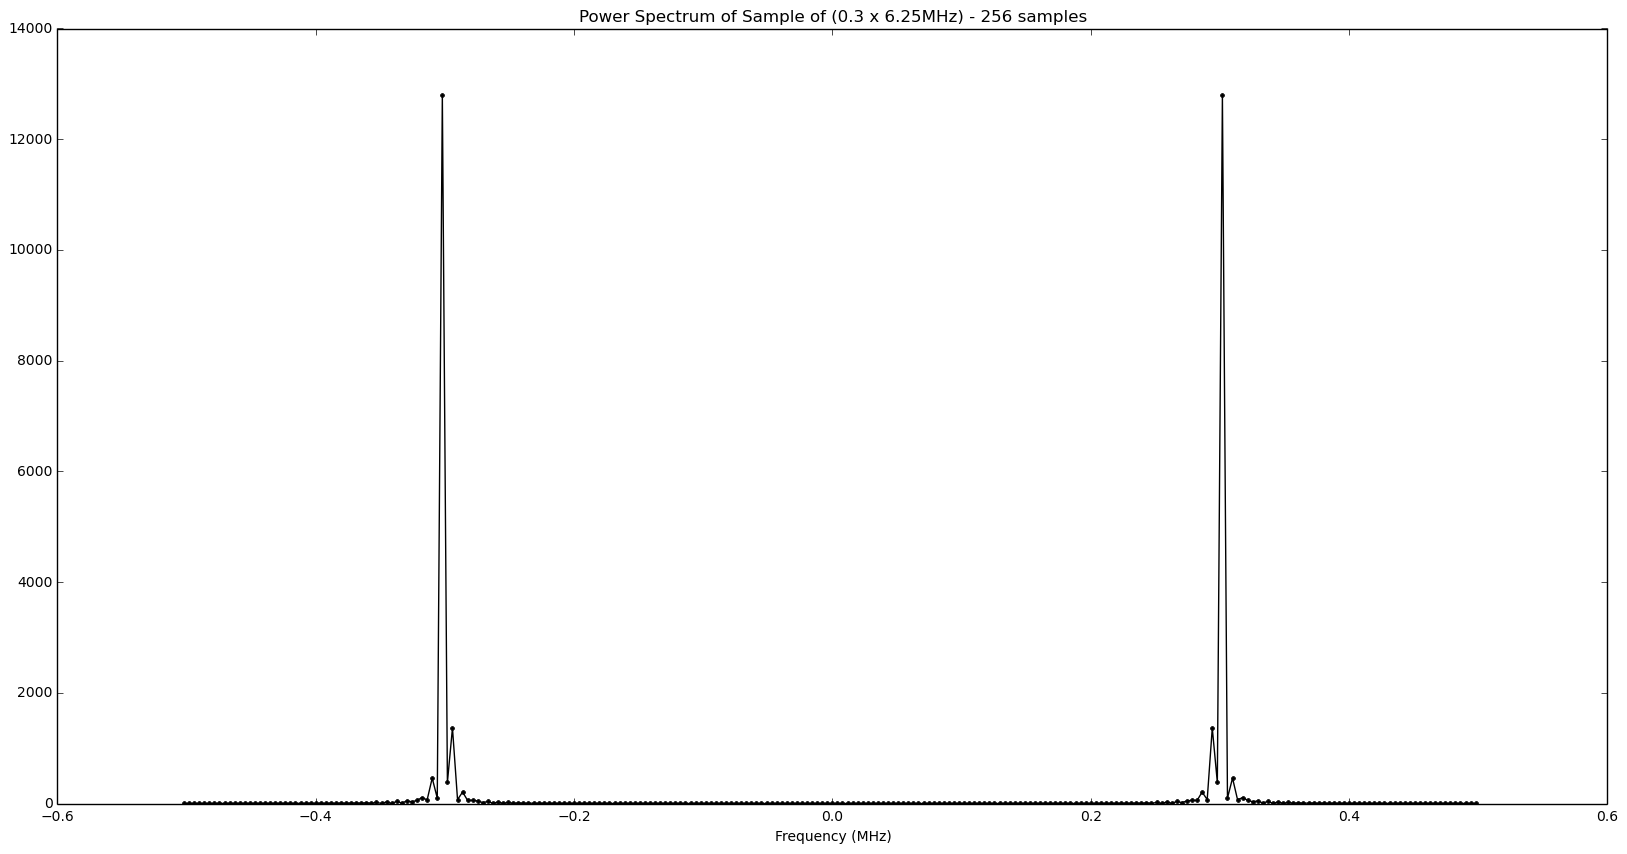

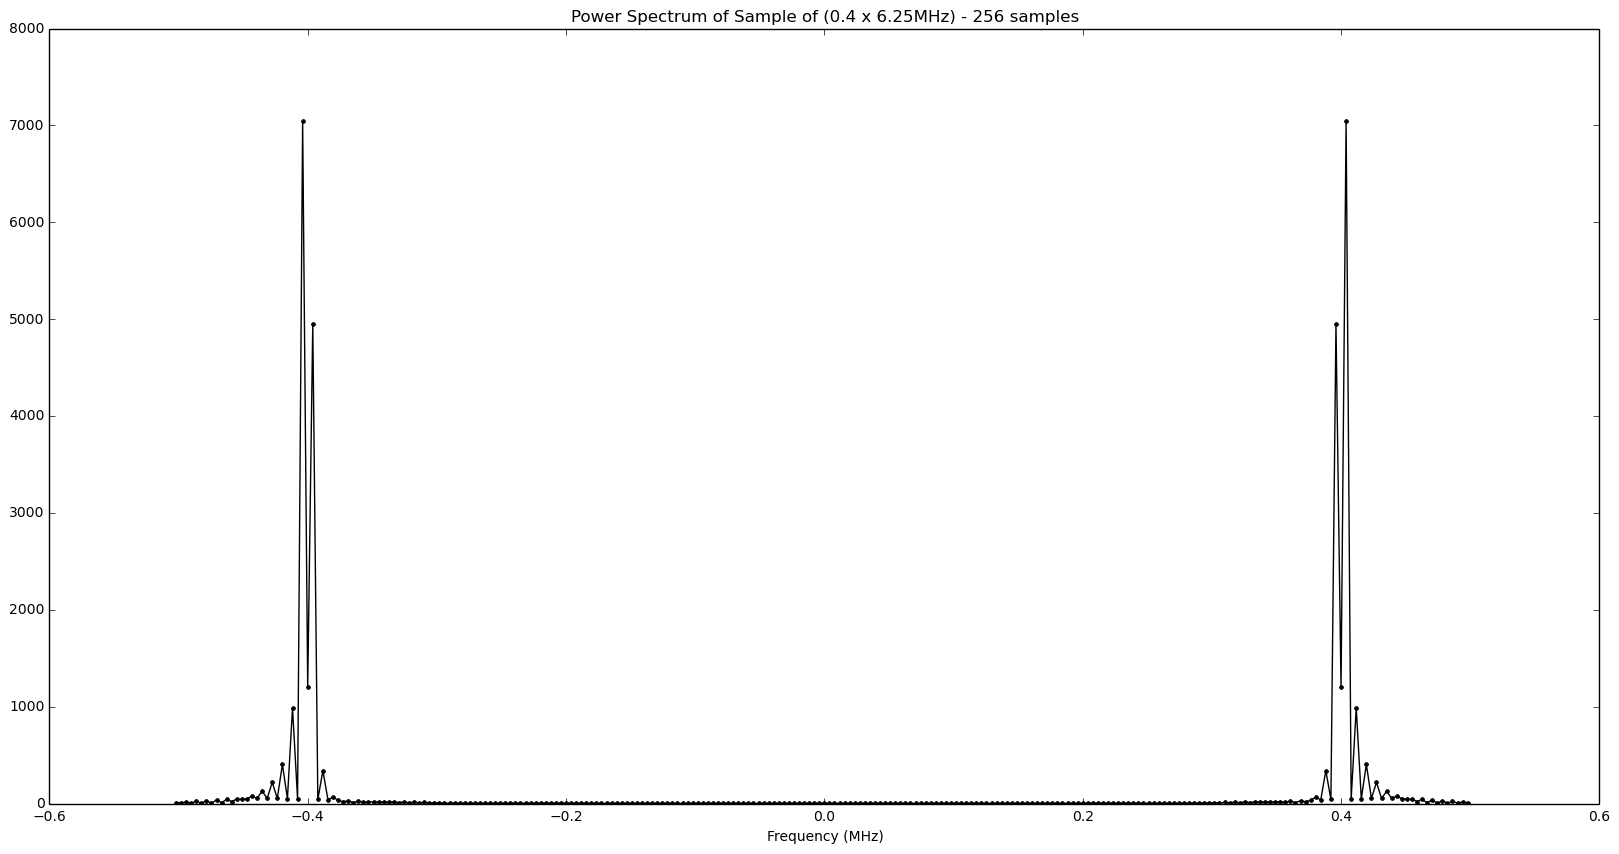

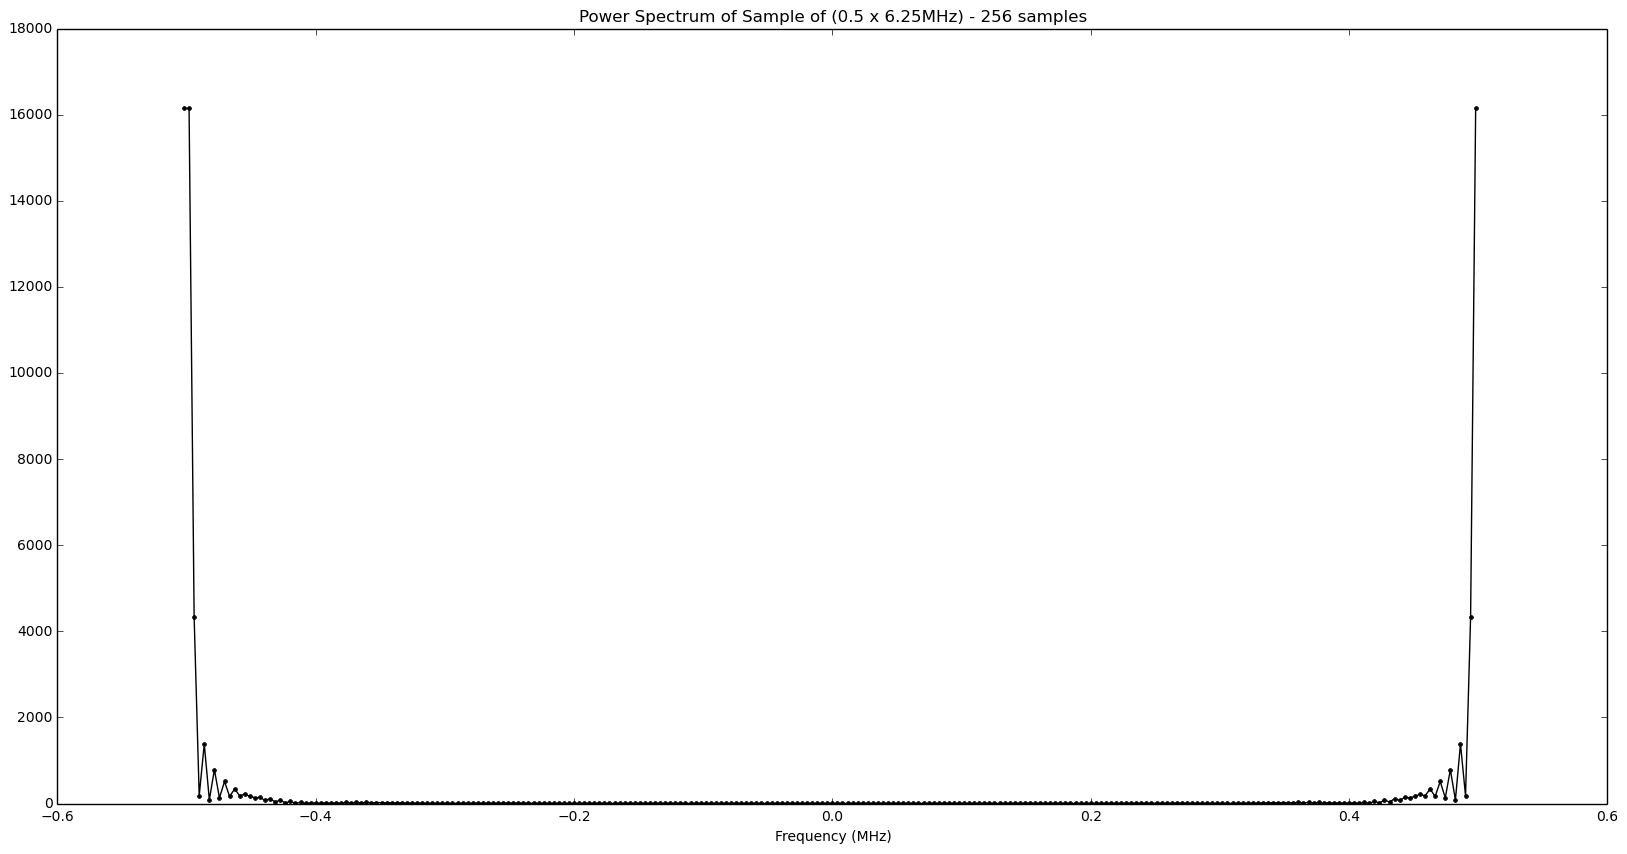

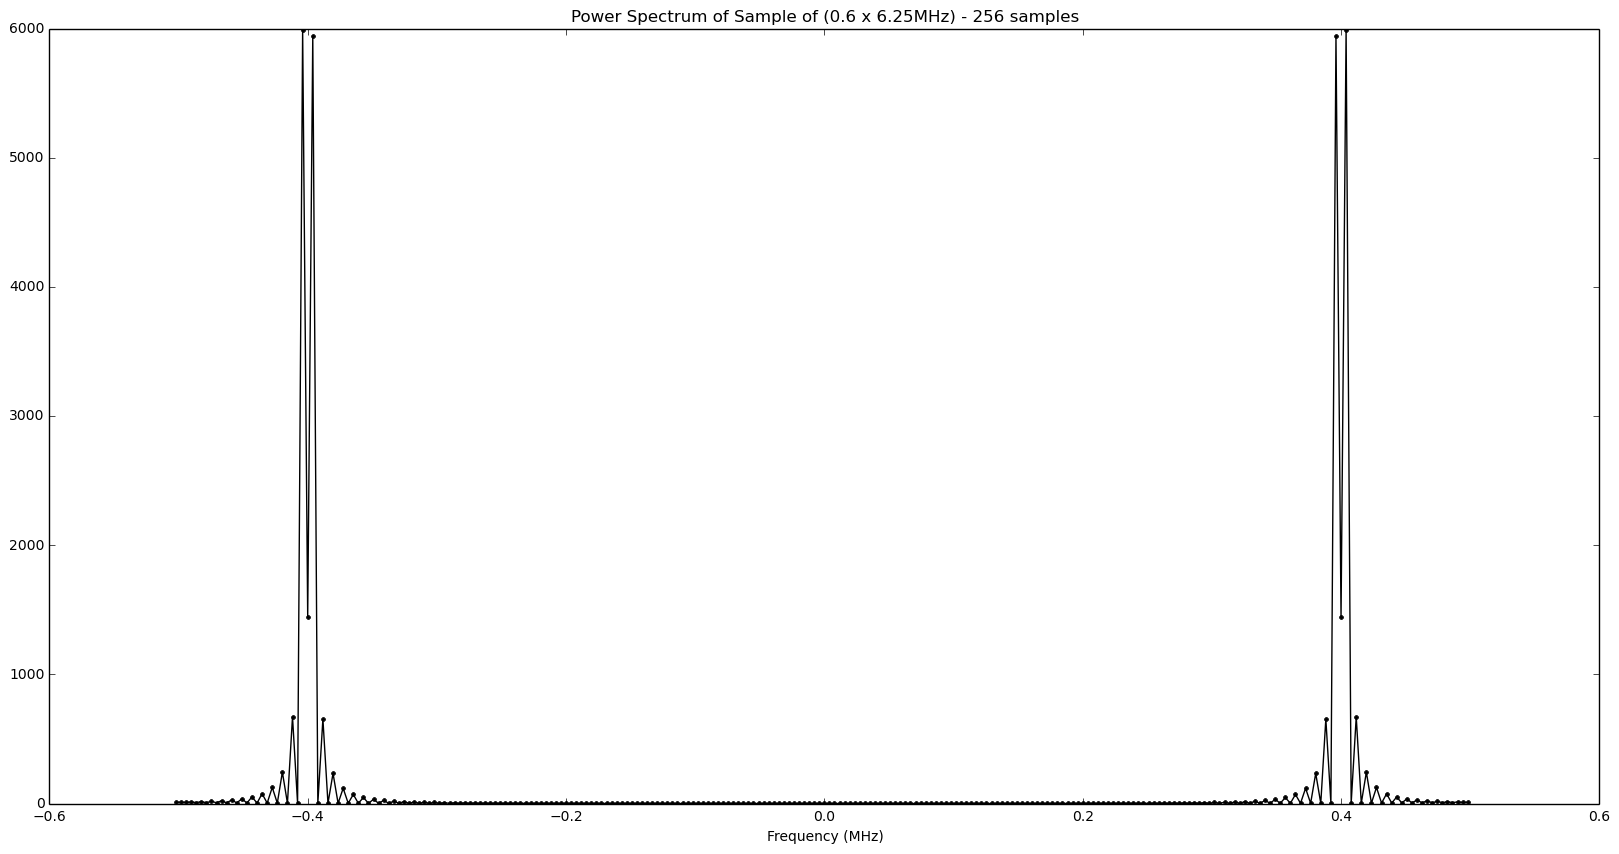

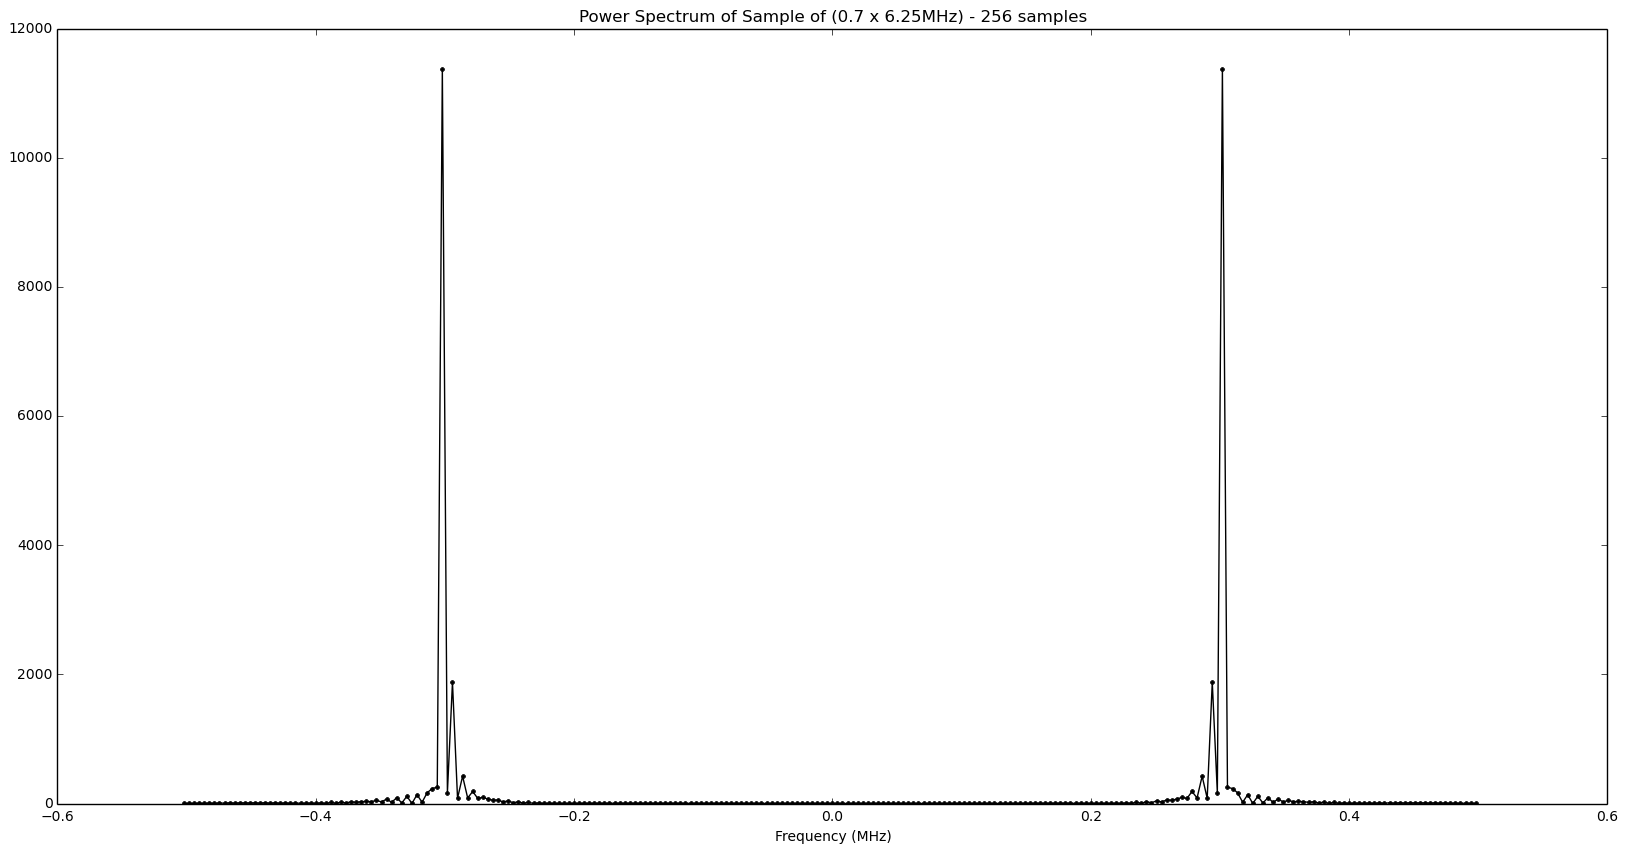

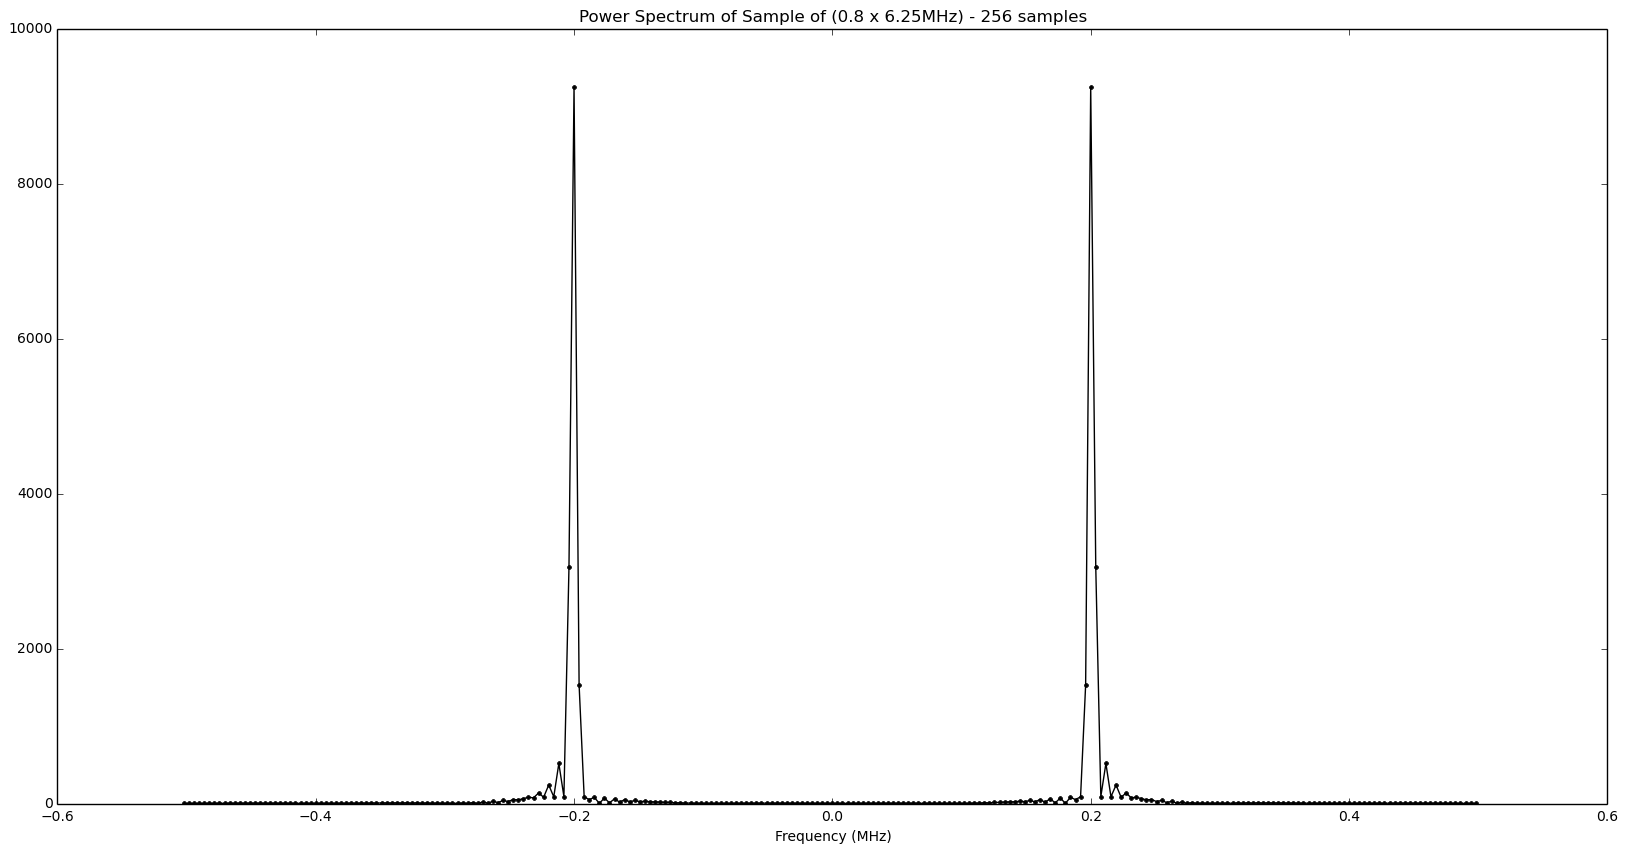

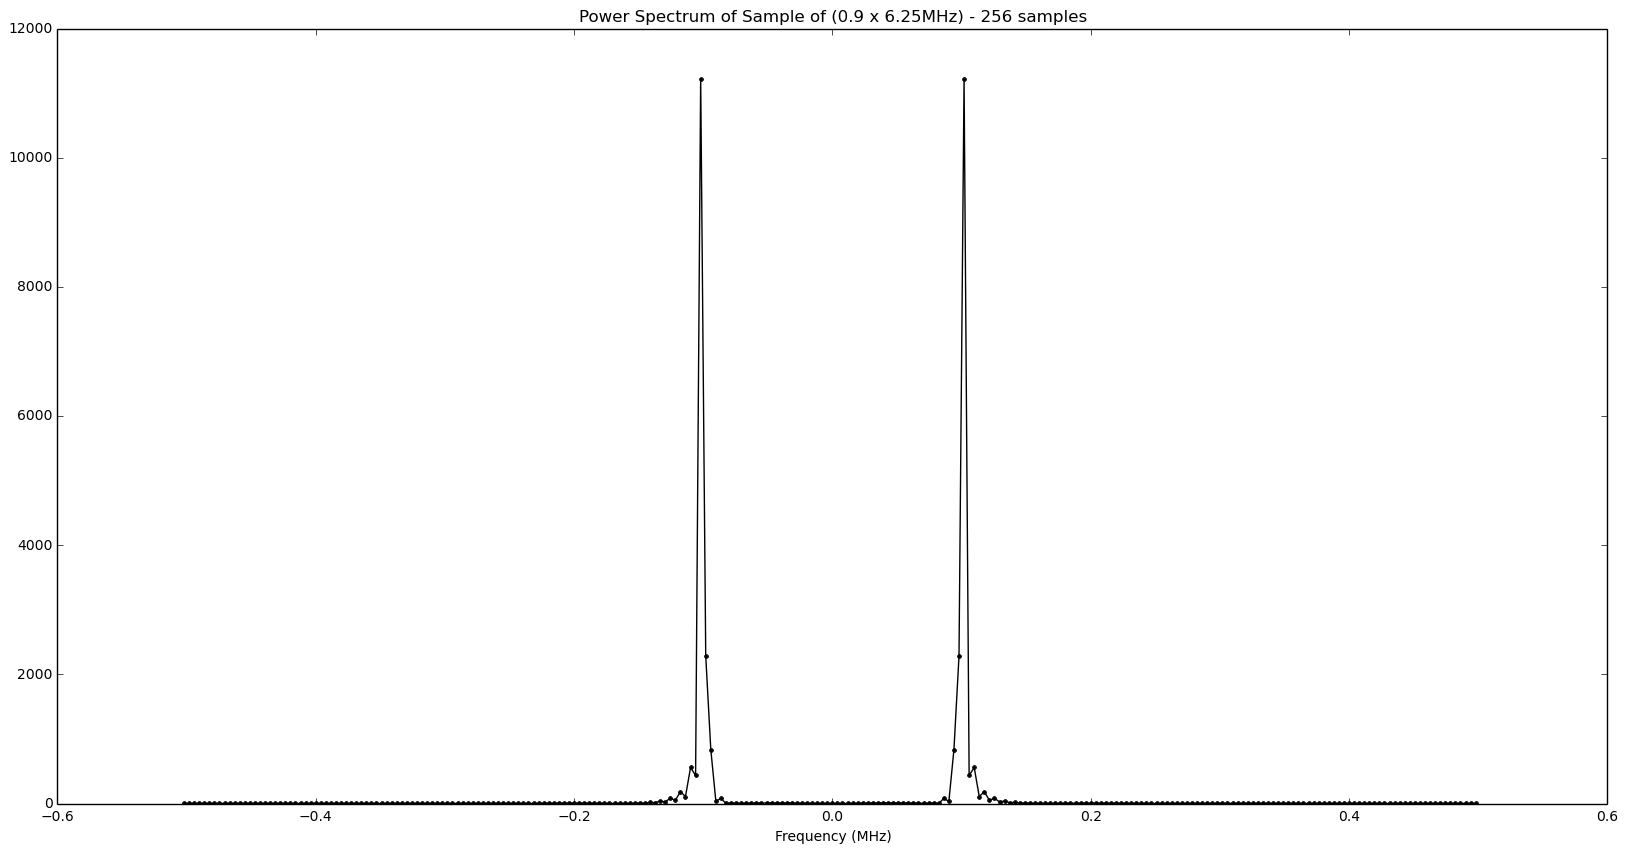

In [30]:
N = 256
freq = np.linspace((-6.25/2),(1 - 2/N) * (6.25/2),num=N,endpoint=False)
for i in range(1, 10):
    filename = "sample_" + str(i) + ".npy"
    arr_plot = np.load(filename)
    arr_plot = np.divide(arr_plot, 16384.0)
    pl.figure(i, figsize=(20,10))
    freq_new, fourier_test = ugradio.dft.dft(arr_plot[:N])
    fourier_test = np.abs(fourier_test)**2
    pl.title("Power Spectrum of Sample of (0." + str(i) + " x " + str(v_samp) + "MHz) - " + str(N) + " samples")
    pl.xlabel("Frequency (MHz)")
    pl.plot(freq_new, fourier_test, 'k.-')

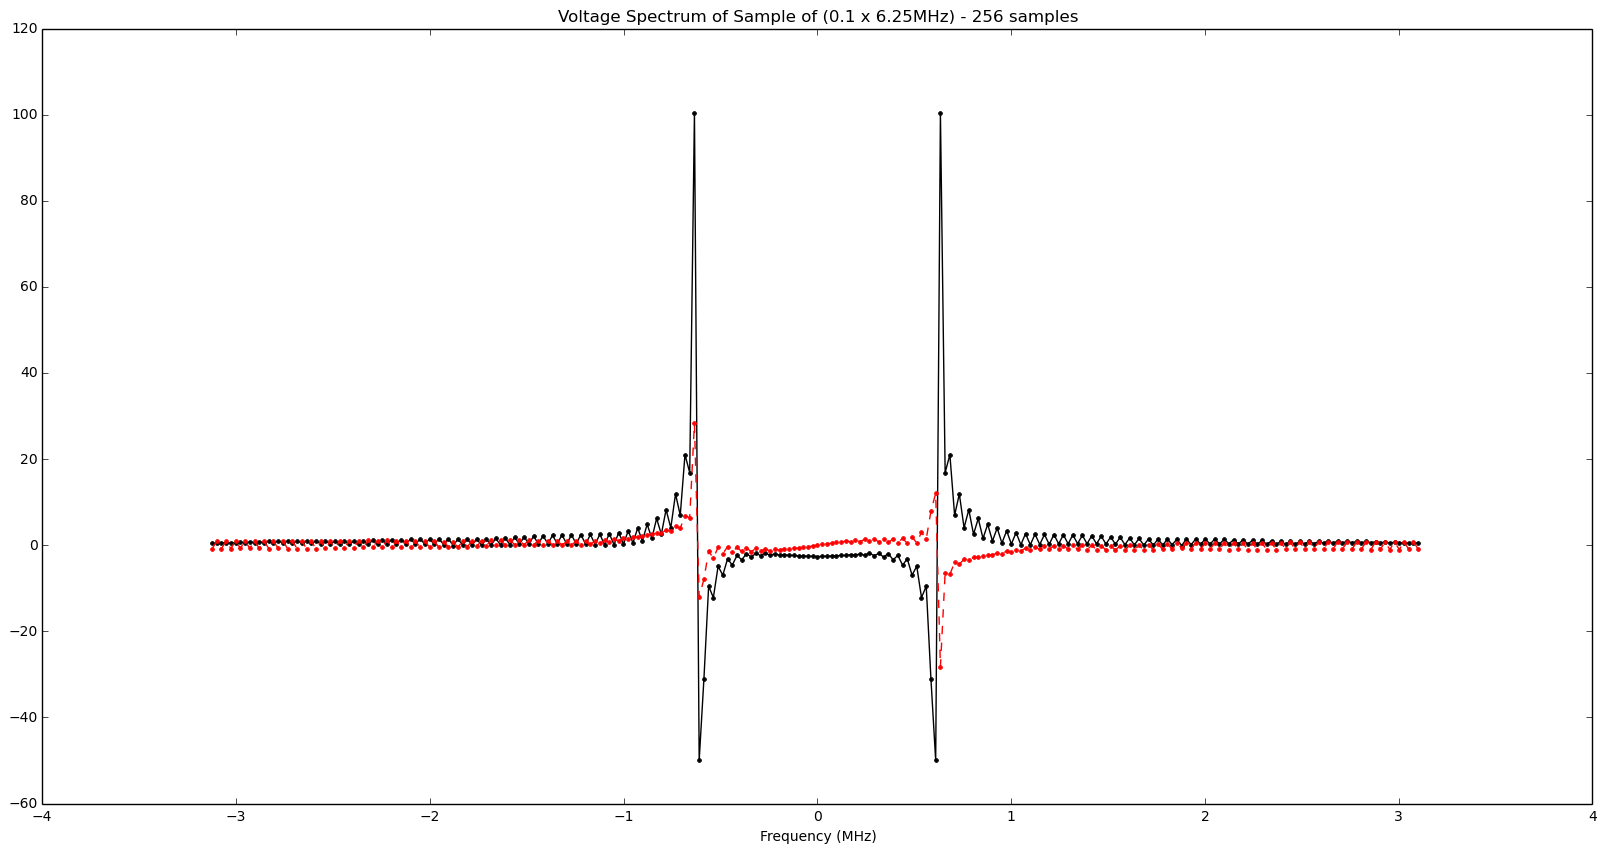

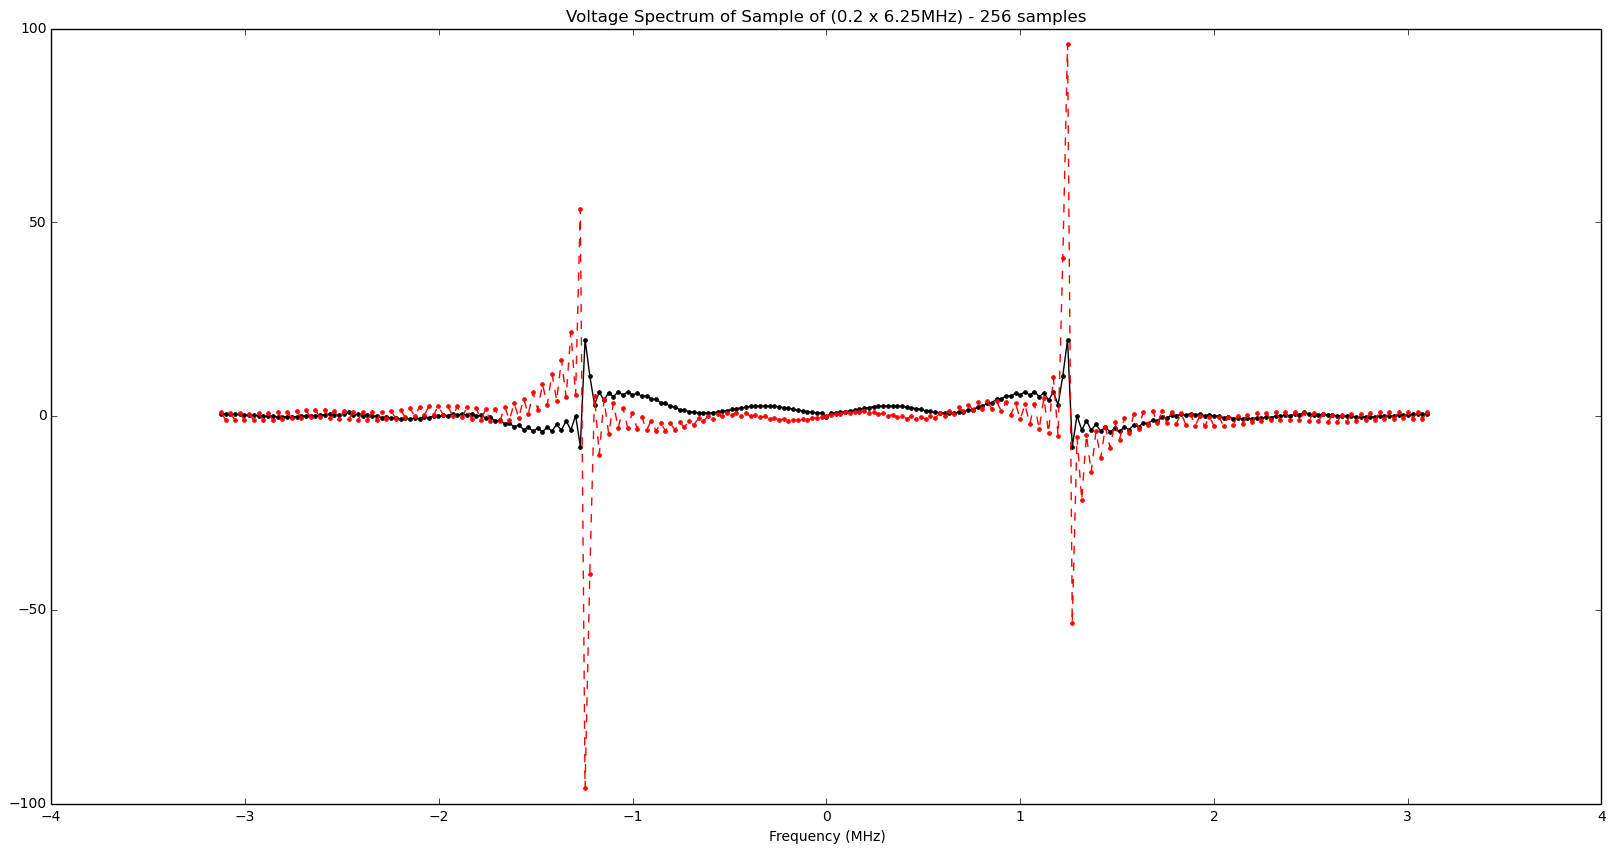

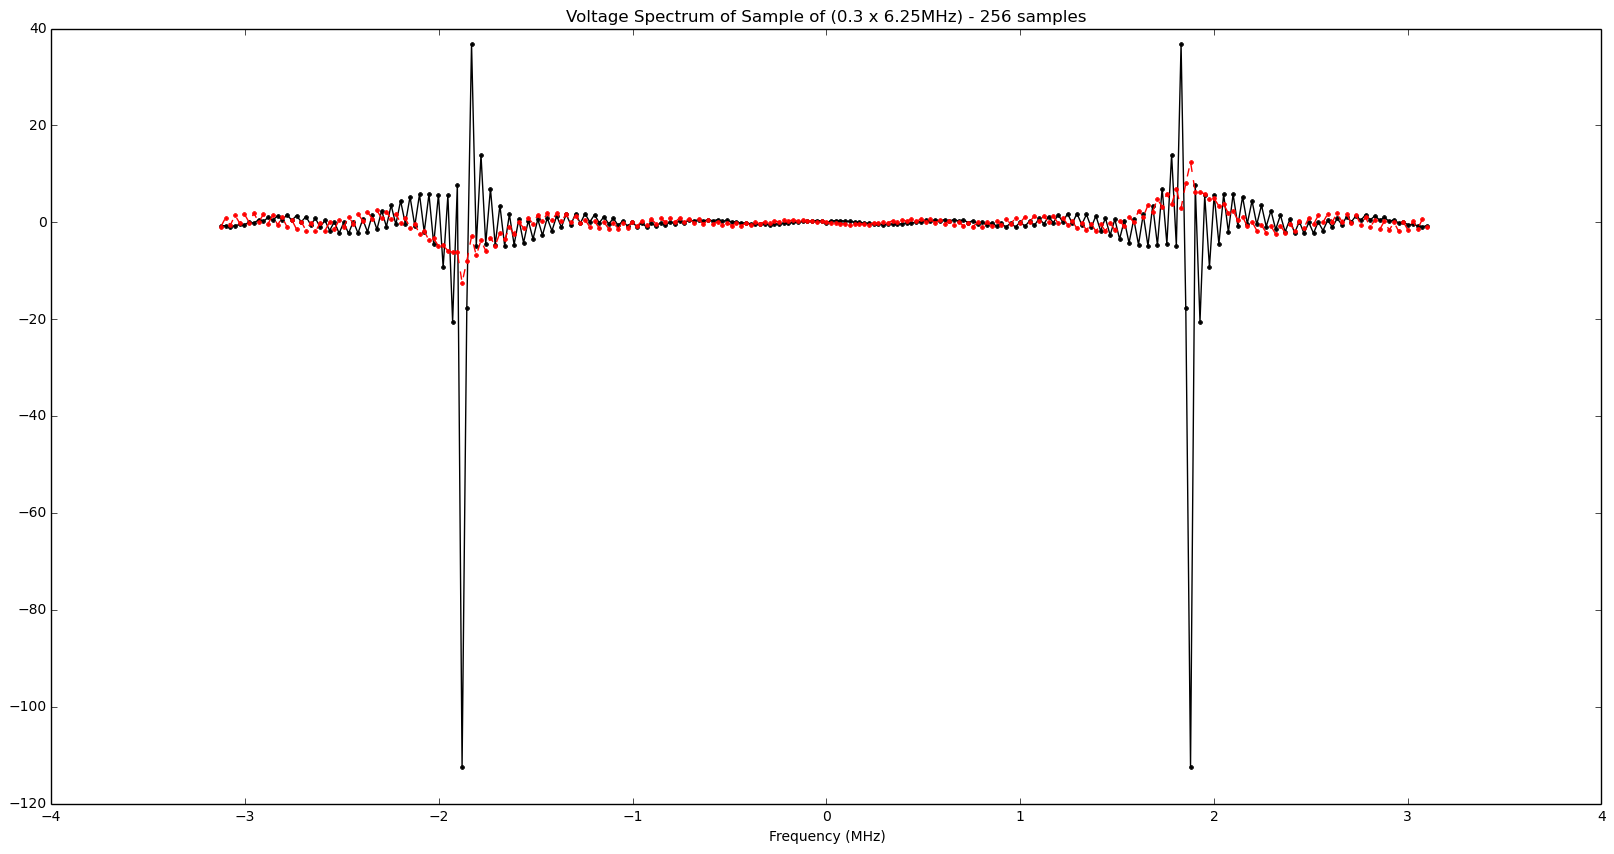

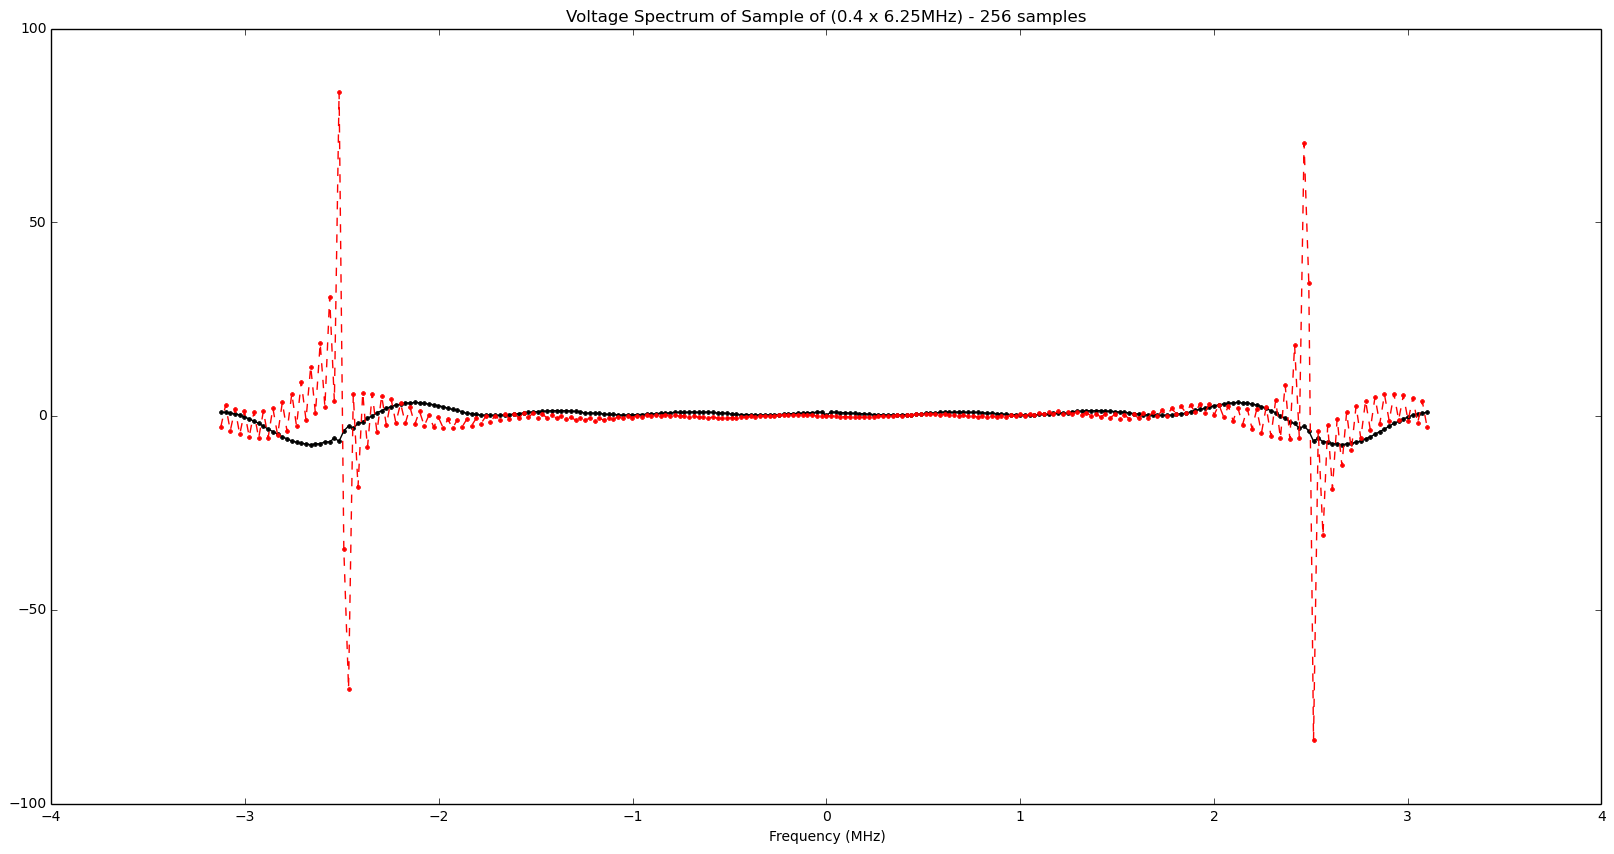

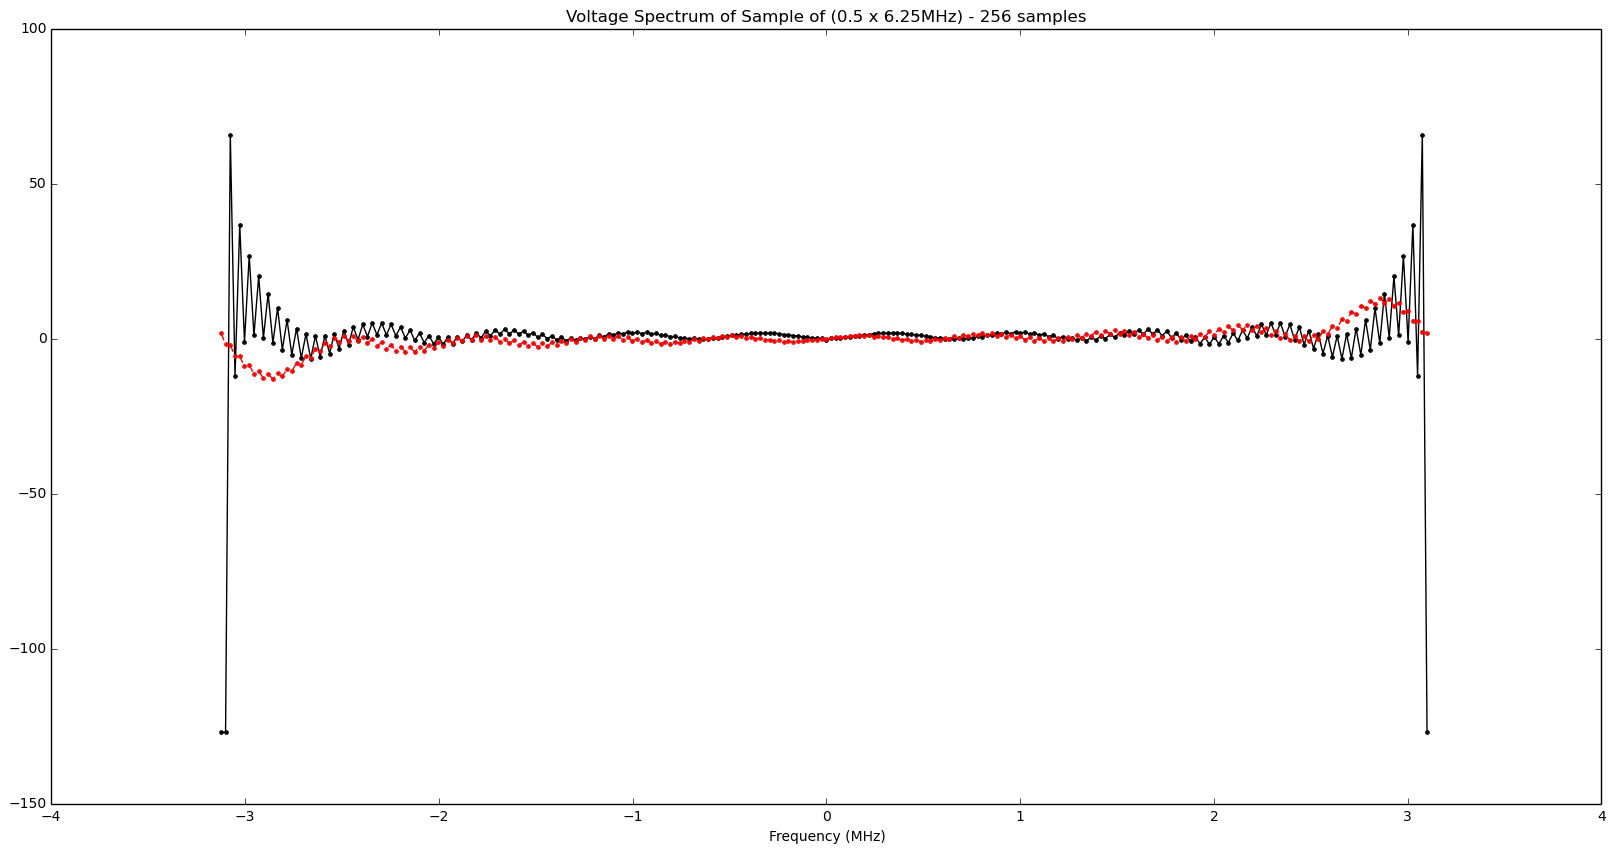

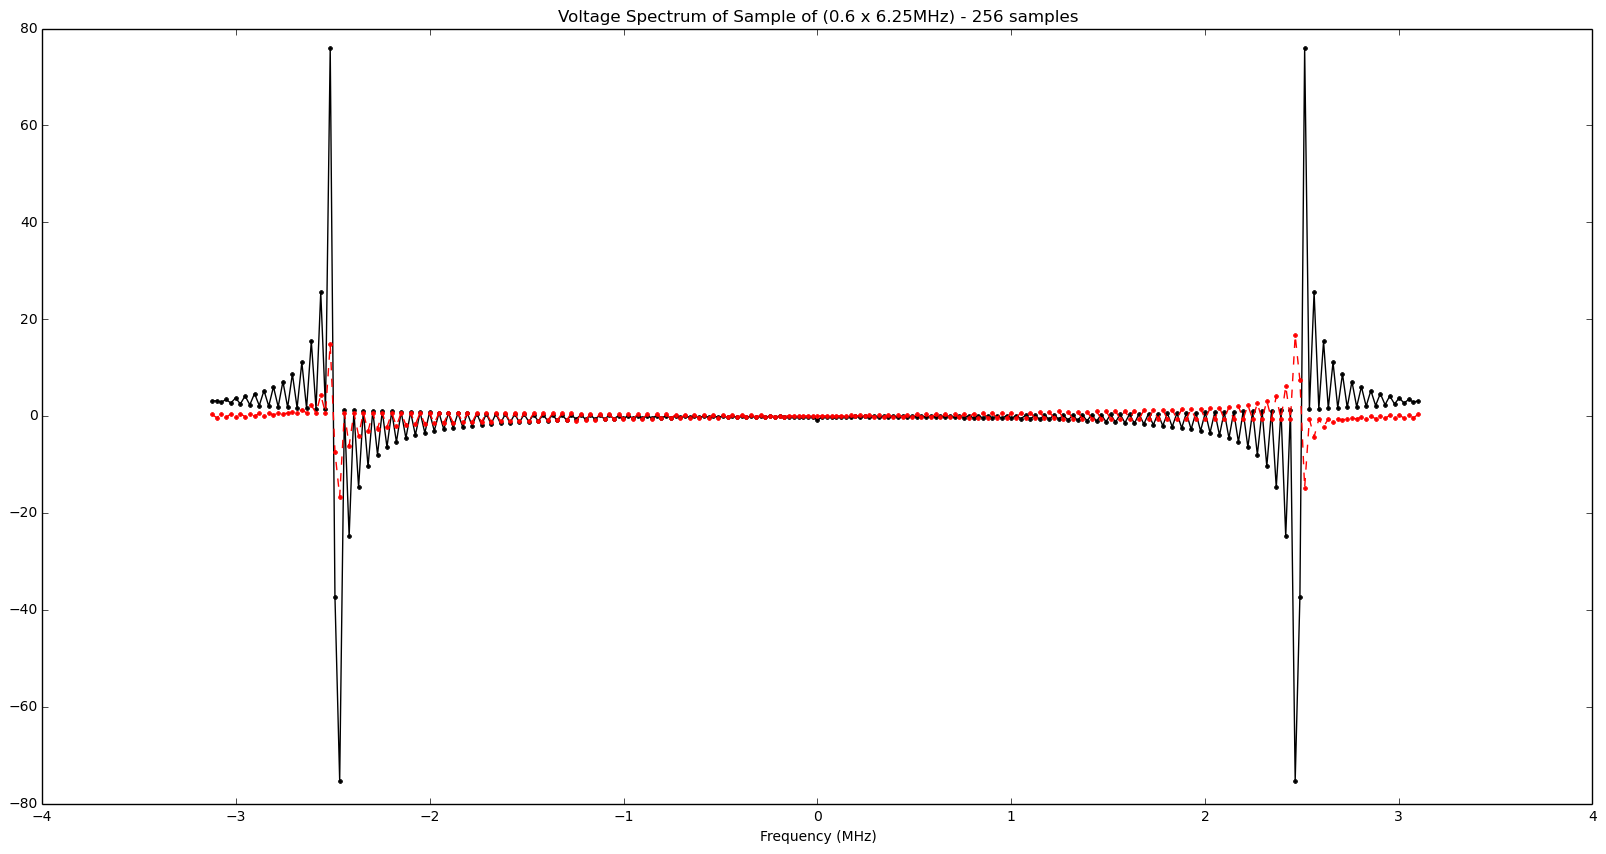

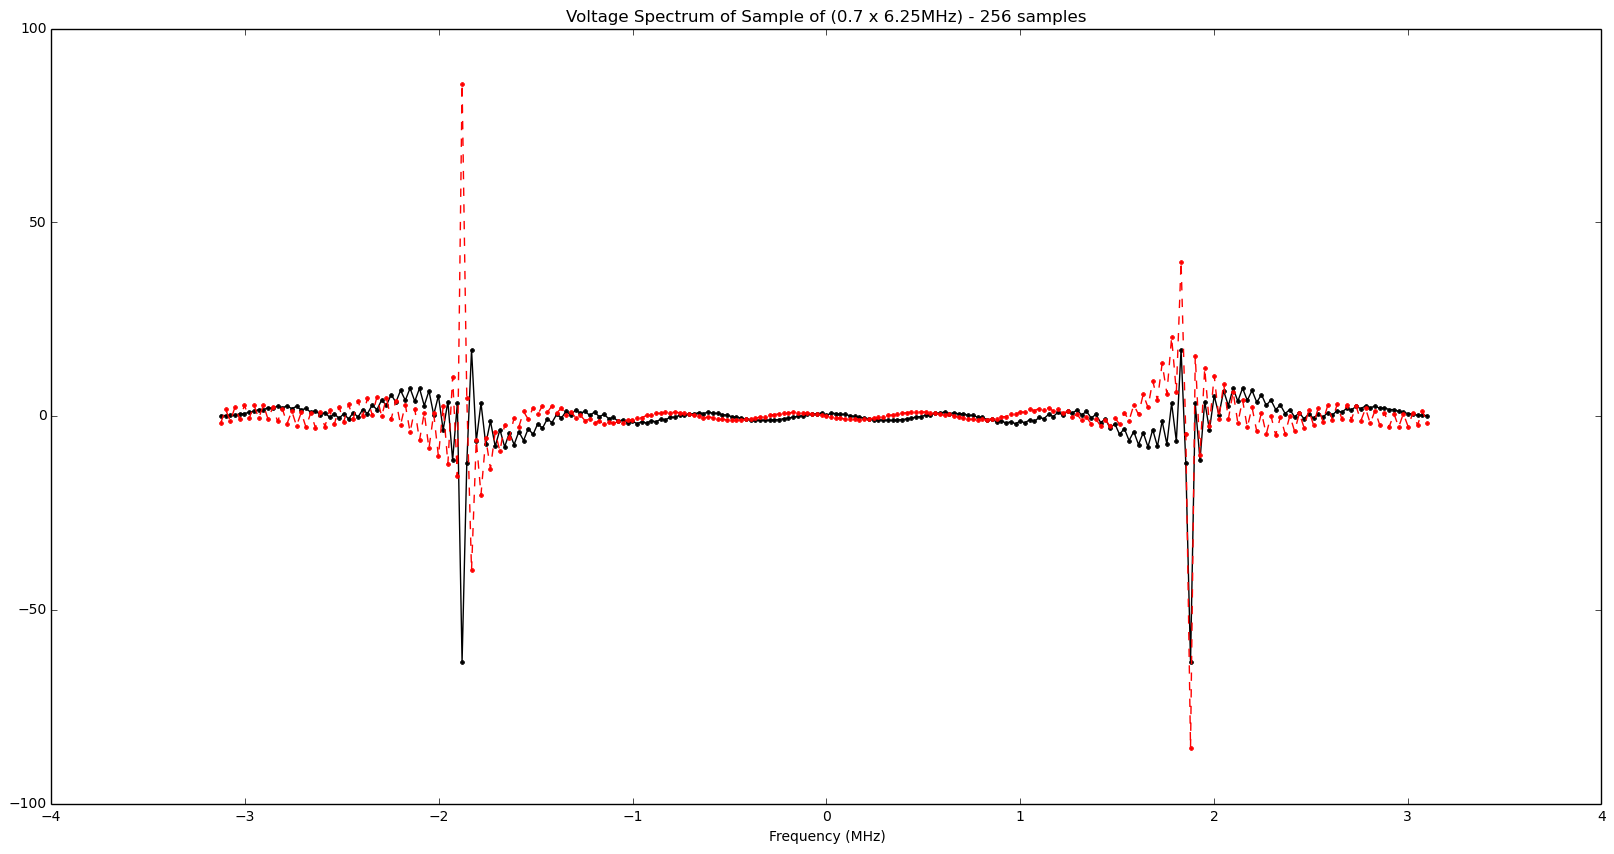

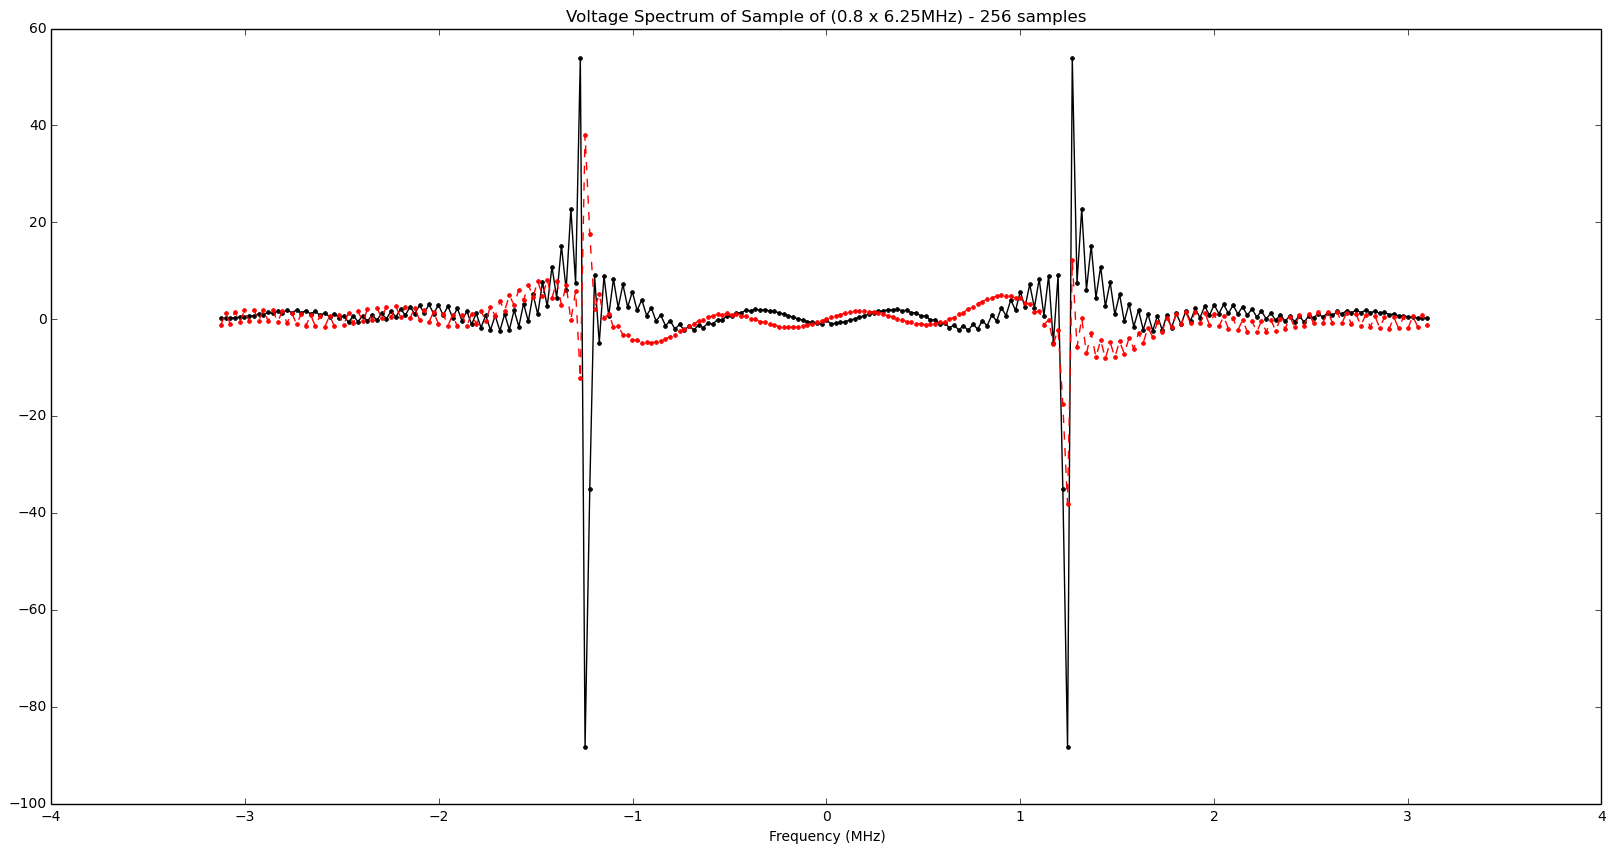

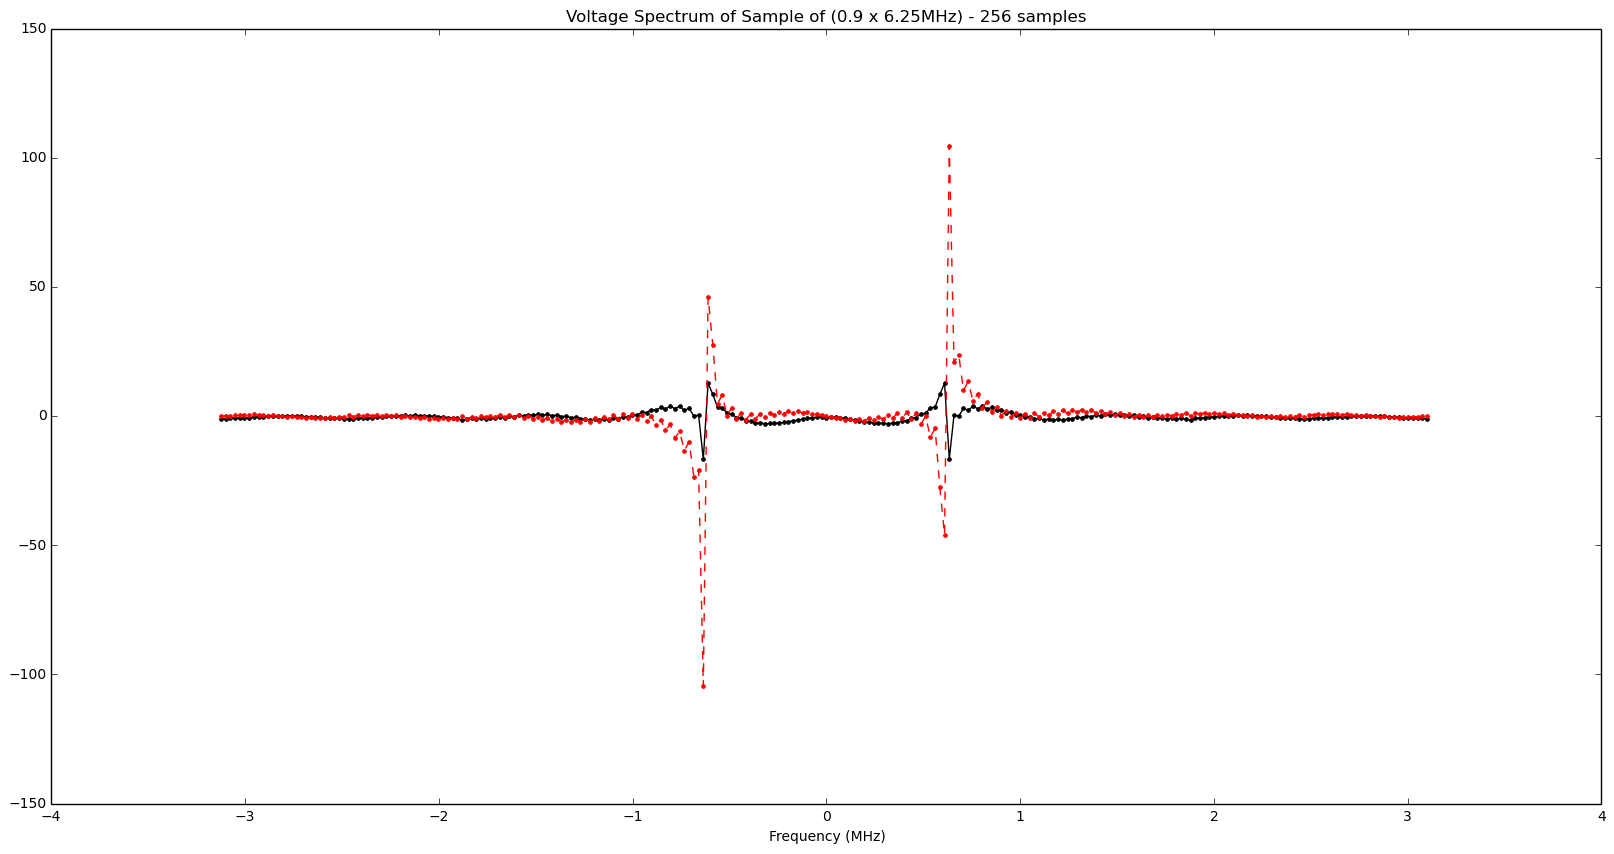

In [29]:
N = 256
chan = np.linspace((-6.25/2),(1 - 2/N) * (6.25/2),num=N,endpoint=False)
for i in range(1, 10):
    filename = "sample_" + str(i) + ".npy"
    arr_plot = np.load(filename)
    arr_plot = np.divide(arr_plot, 16384.0)
    pl.figure(i, figsize=(20,10))
    voltage_test = ugradio.dft.dft(arr_plot[:N])[1]
    real = np.real(voltage_test)
    imag = np.imag(voltage_test)
    pl.title("Voltage Spectrum of Sample of (0." + str(i) + " x " + str(v_samp) + "MHz) - " + str(N) + " samples")
    pl.xlabel("Frequency (MHz)")
    pl.plot(chan, real, 'k.-')
    pl.plot(chan, imag, 'r.--')

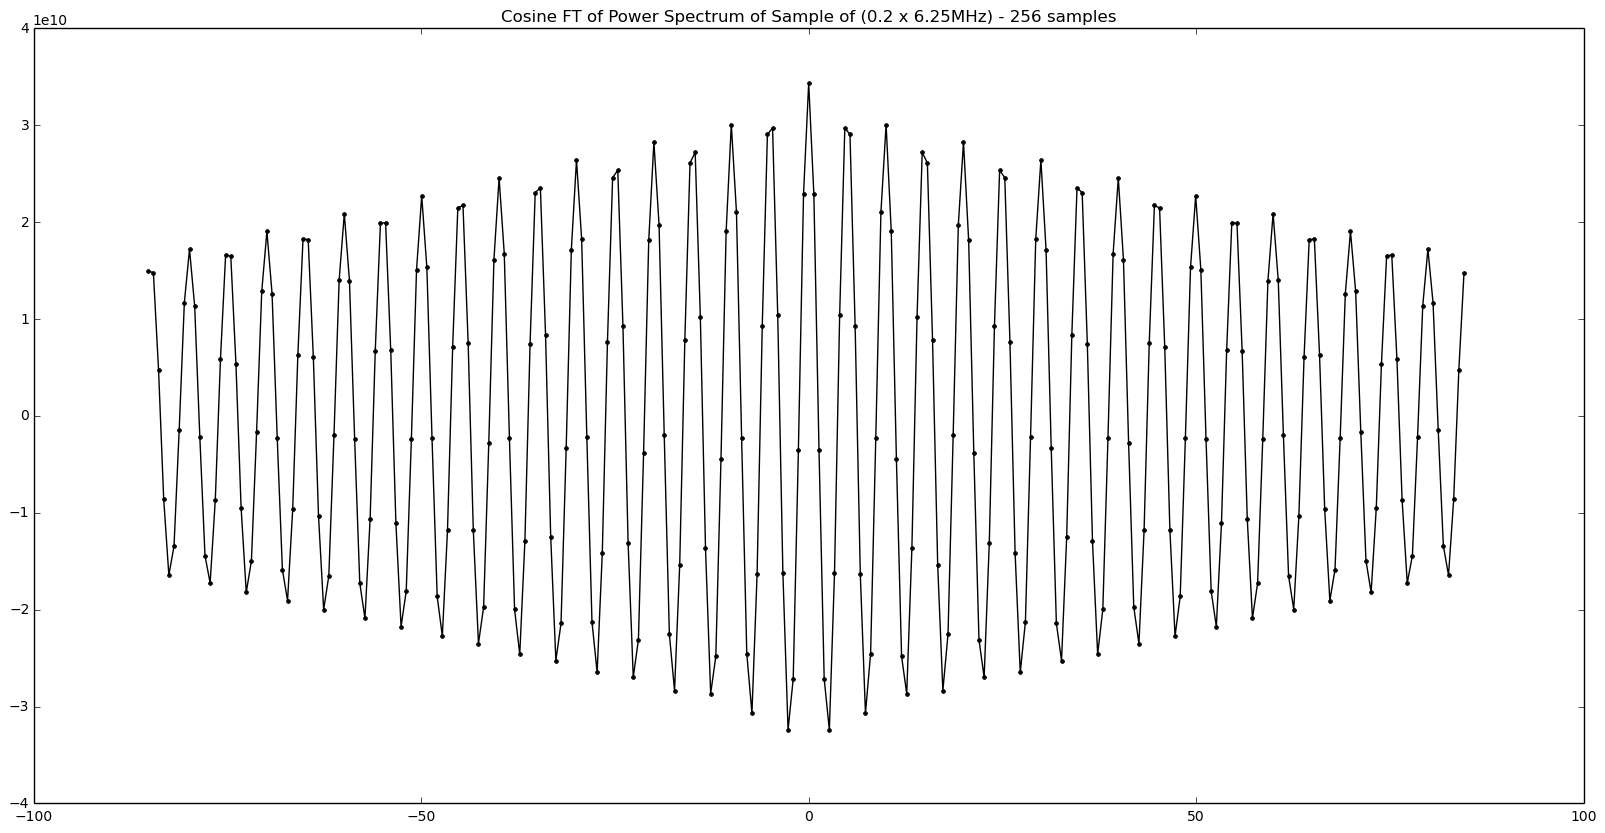

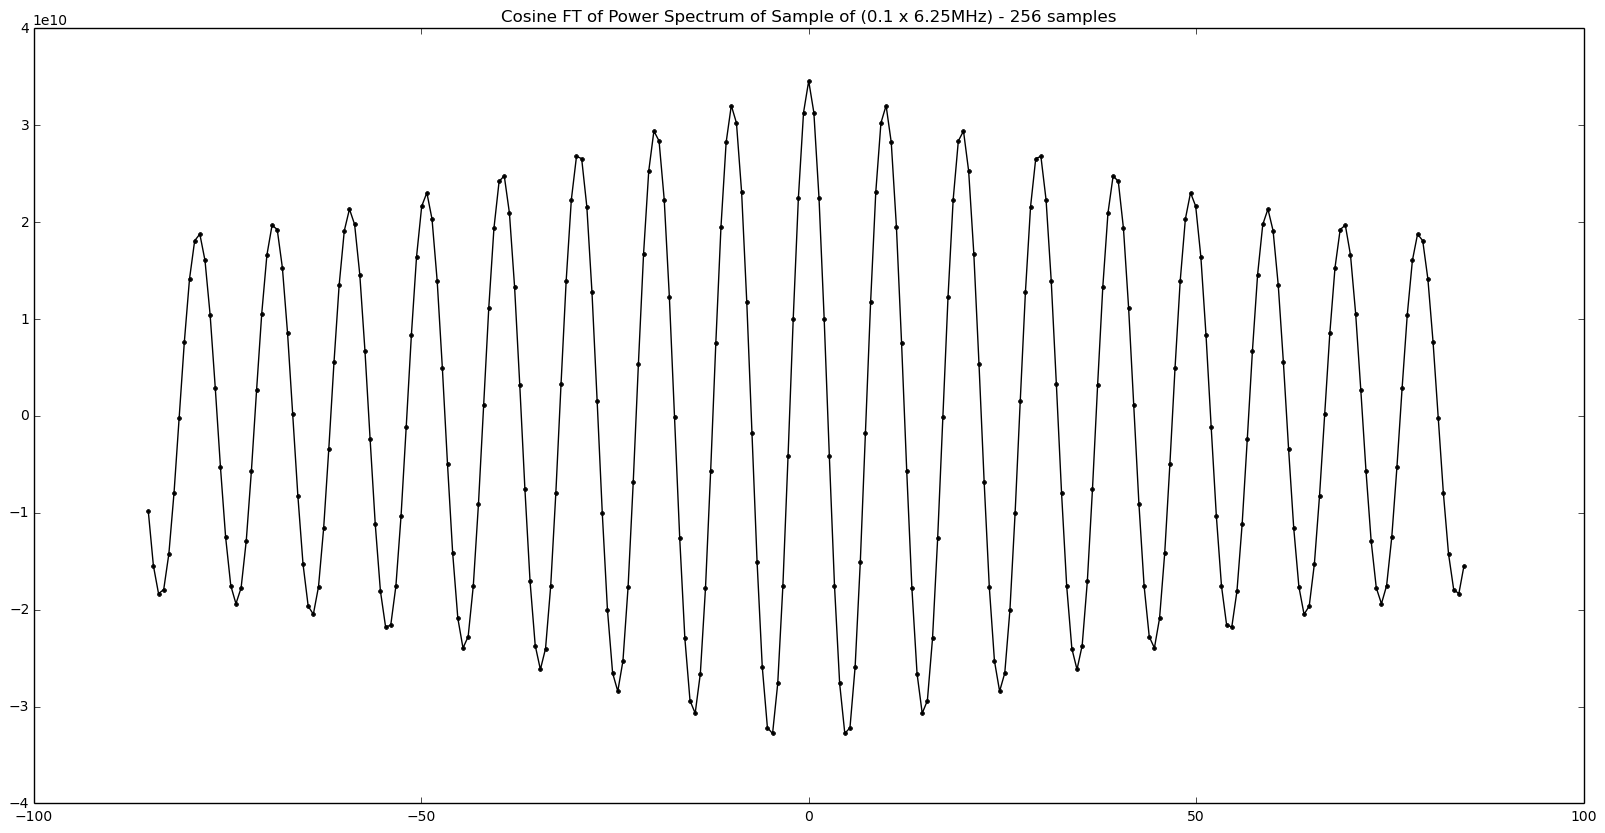

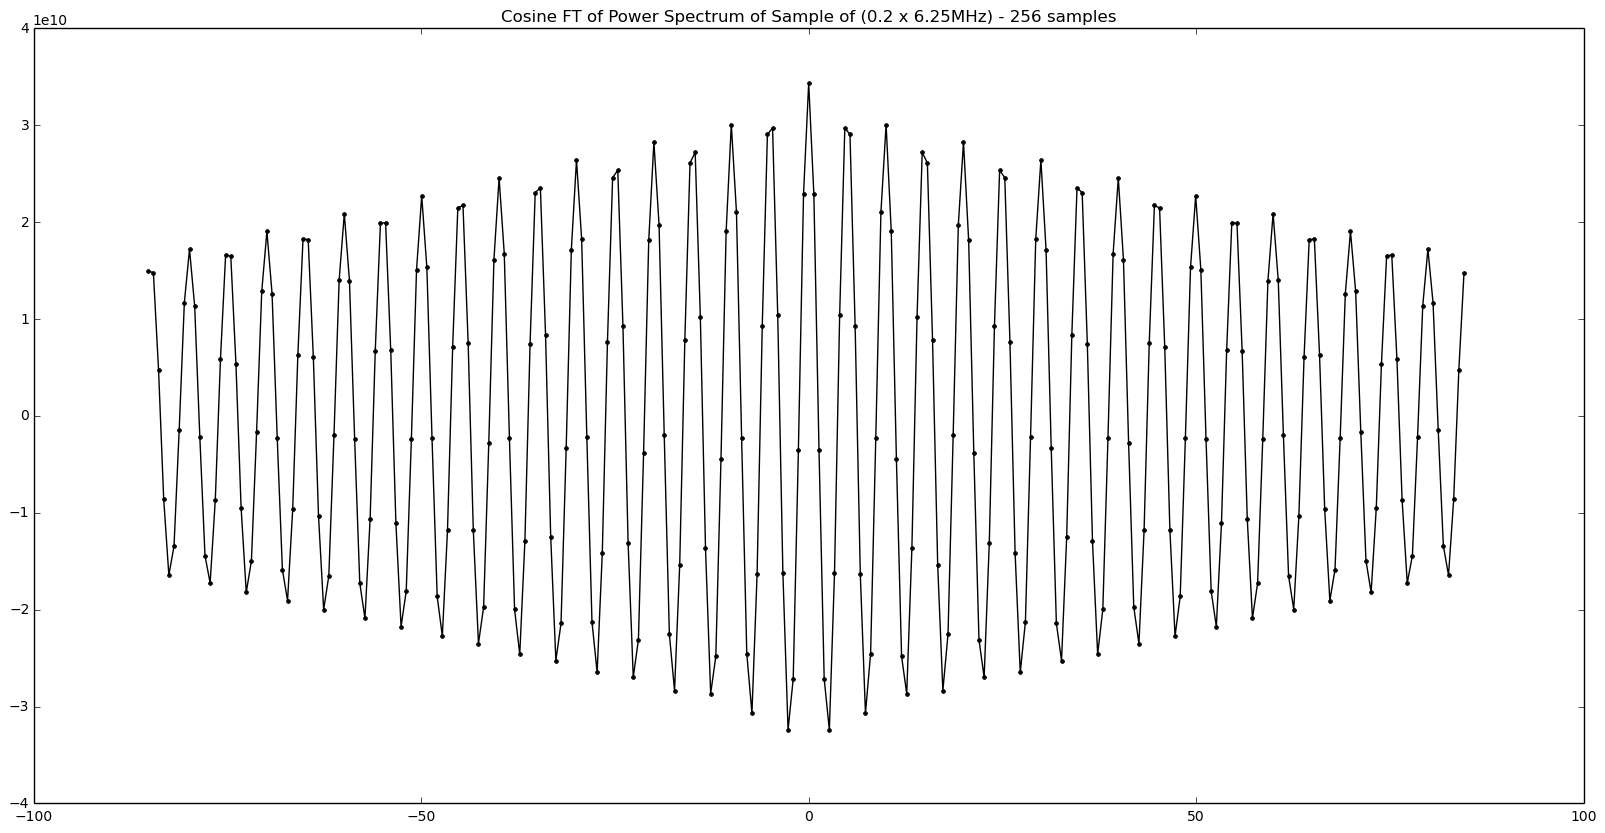

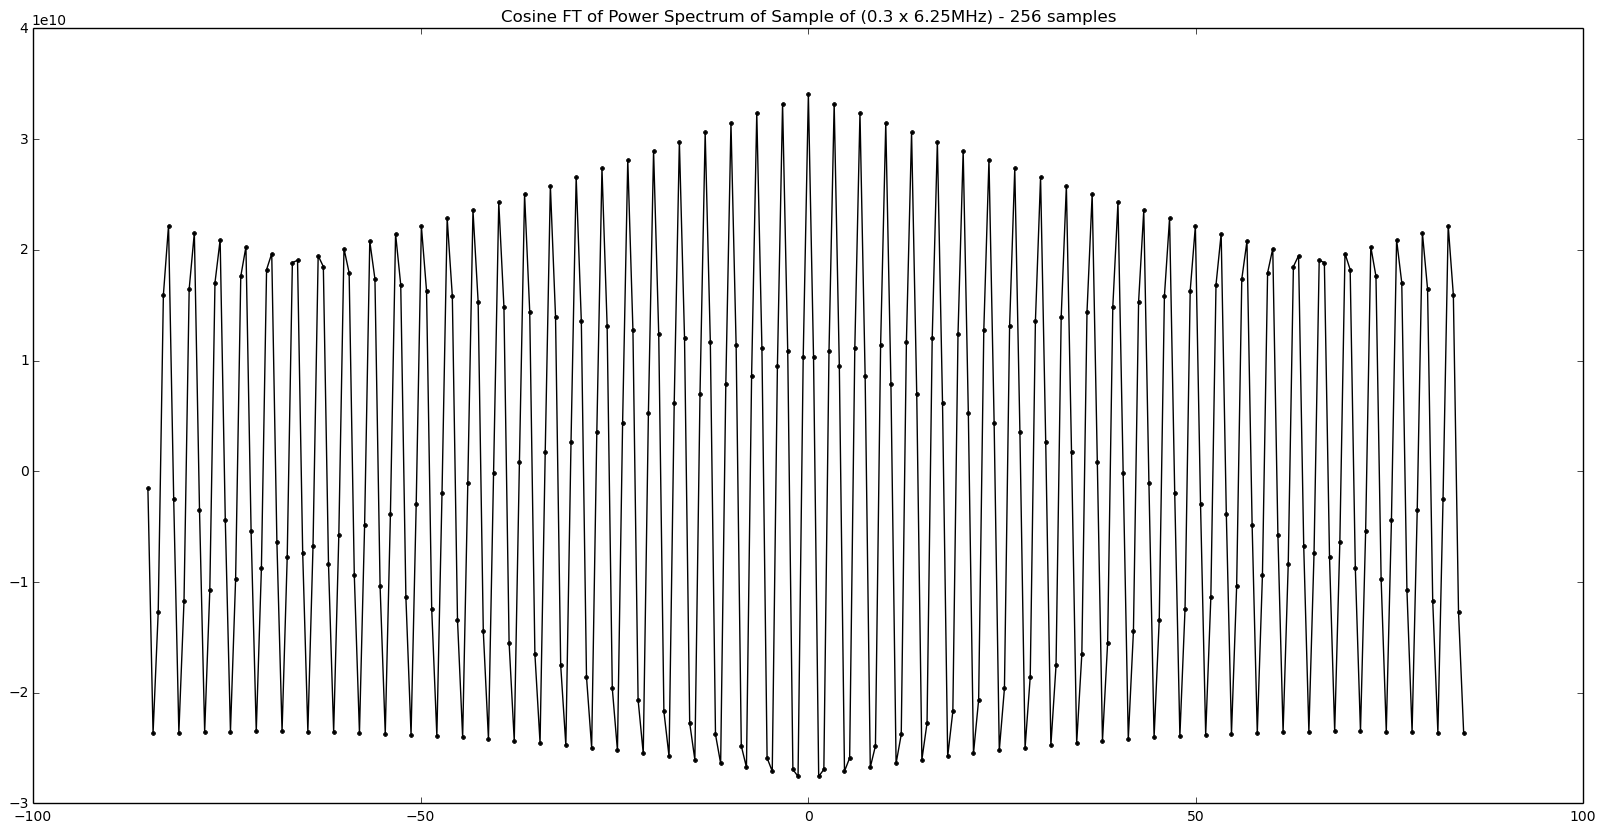

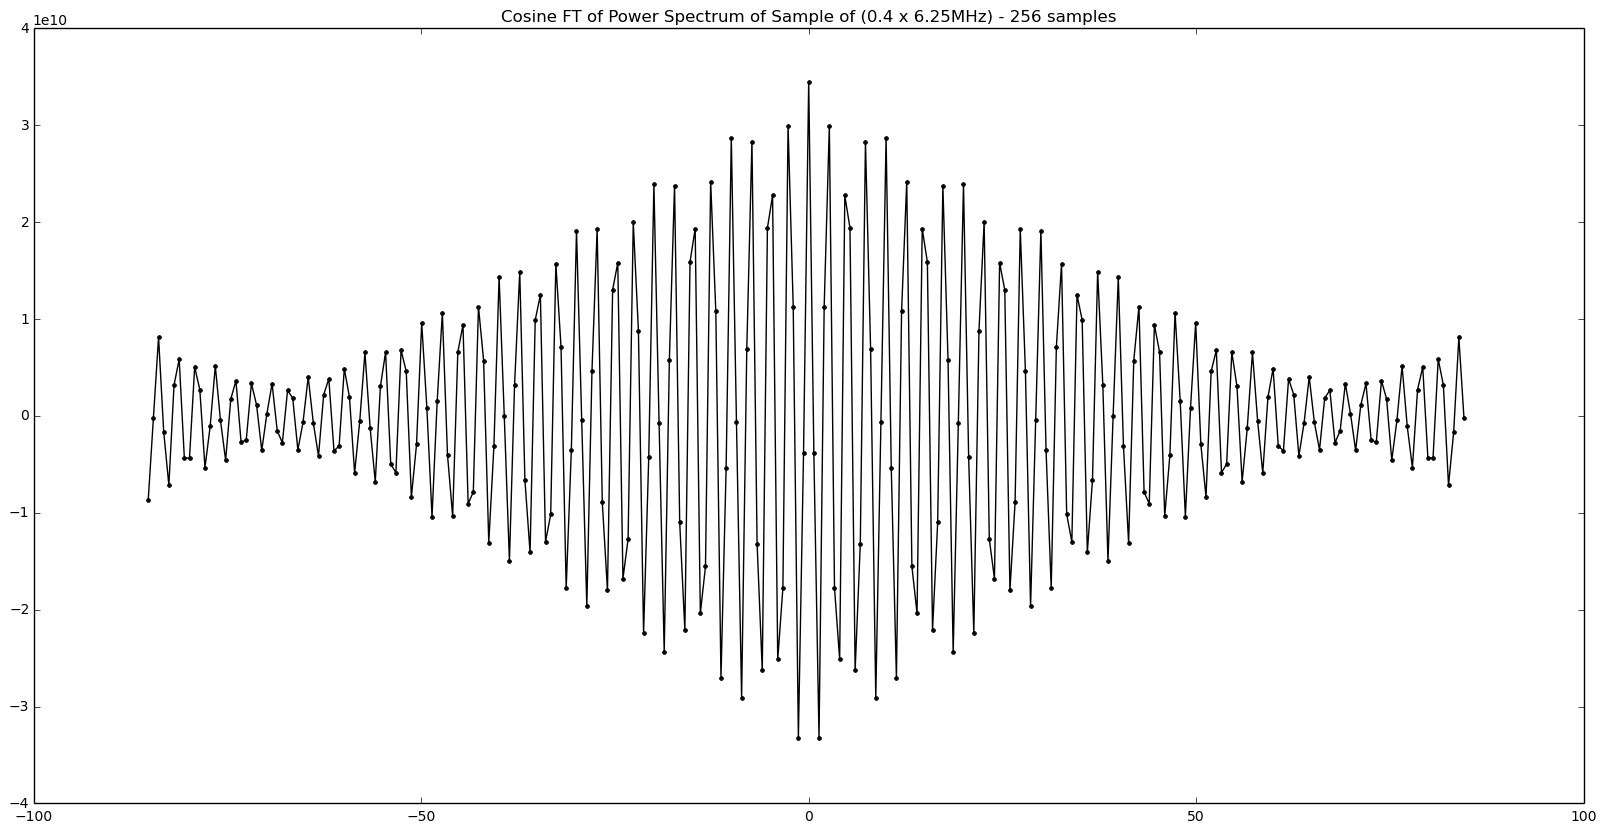

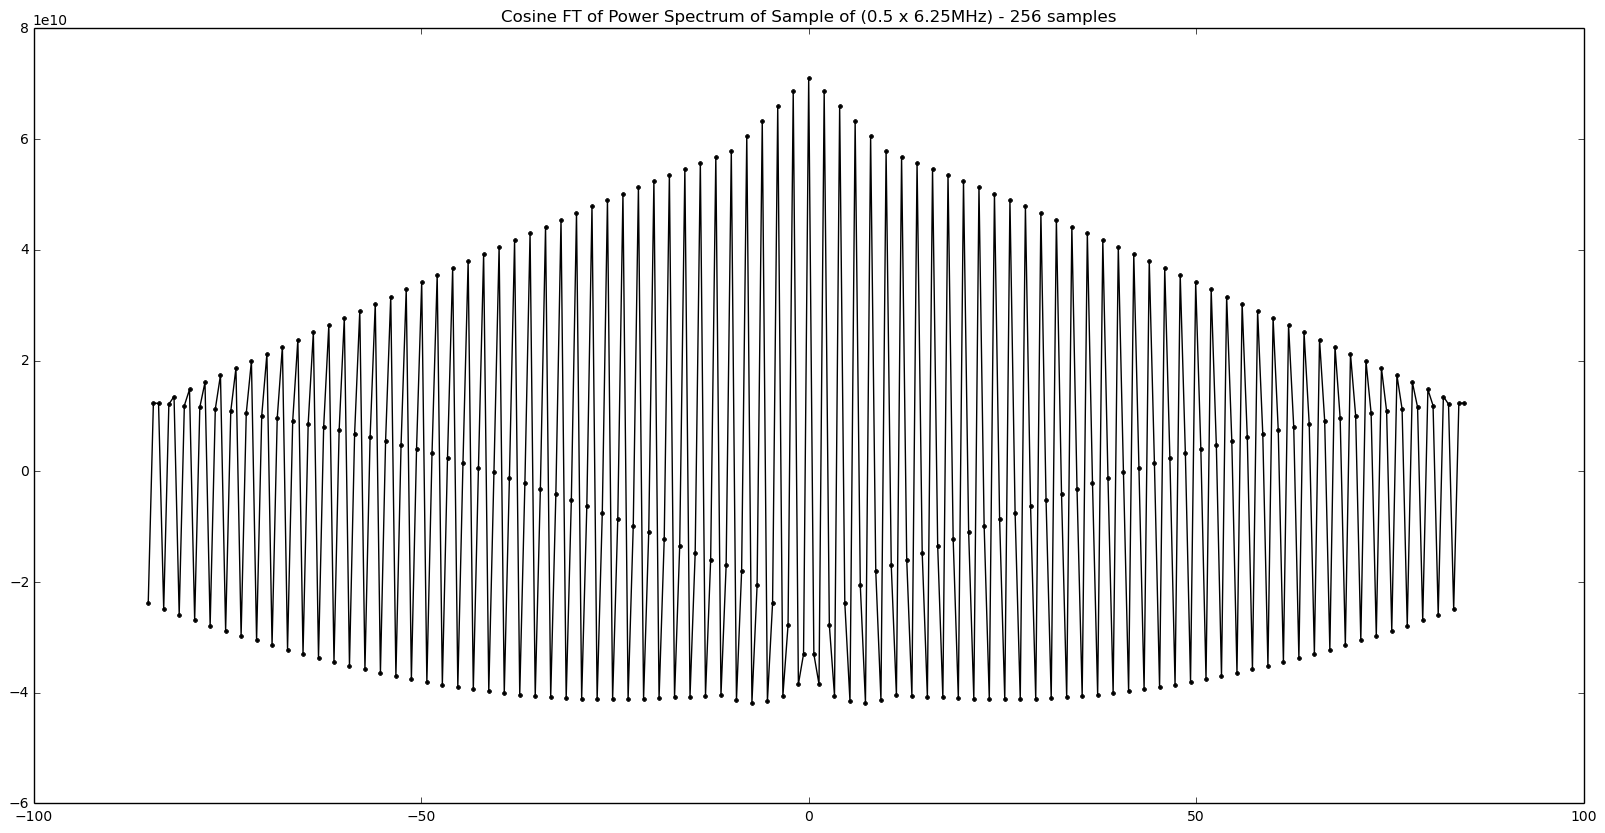

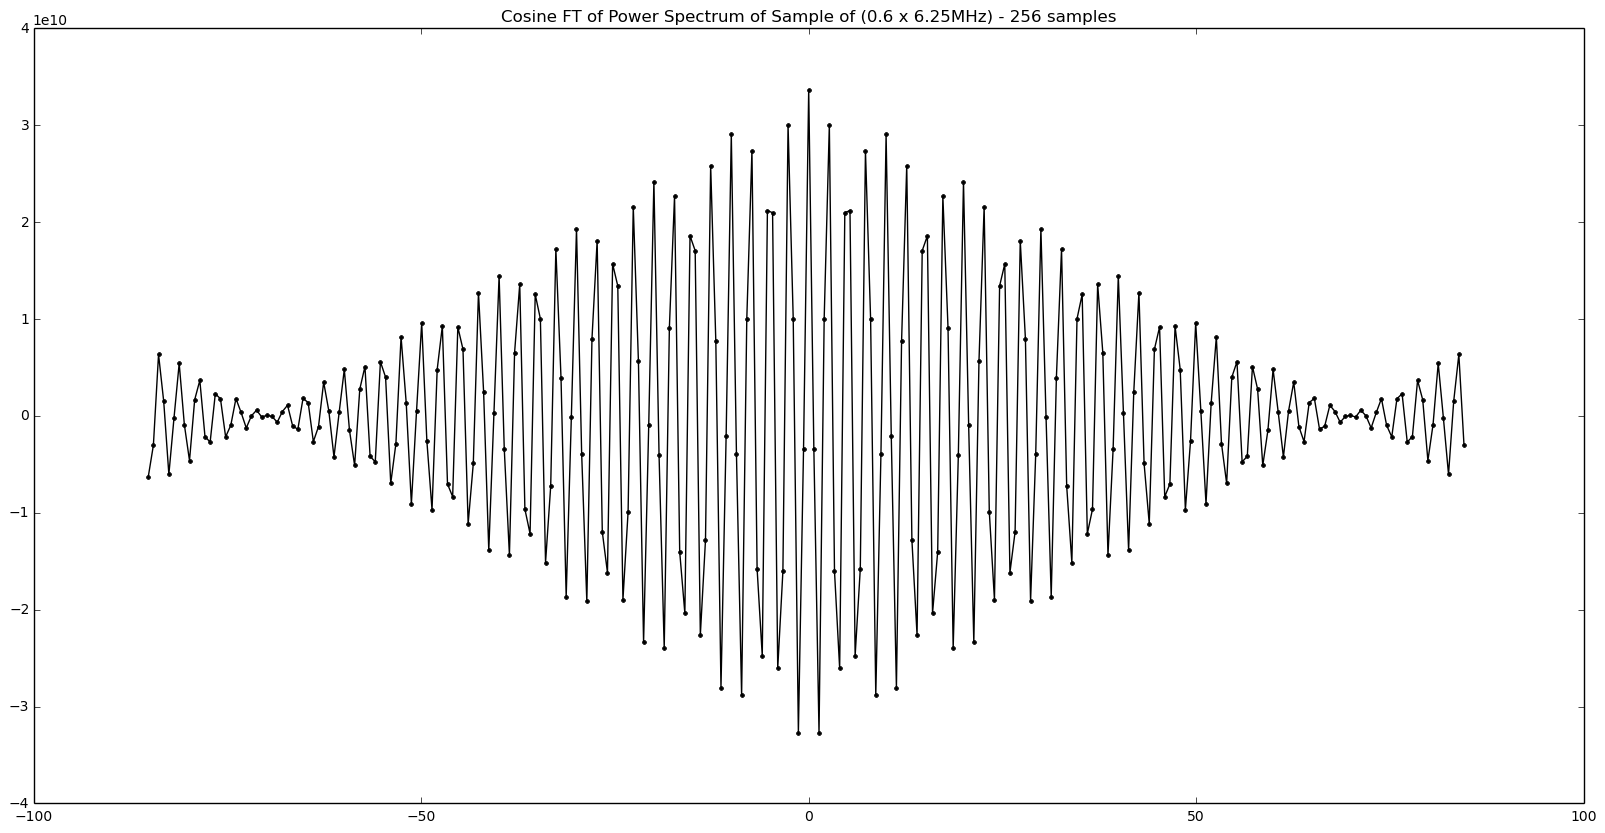

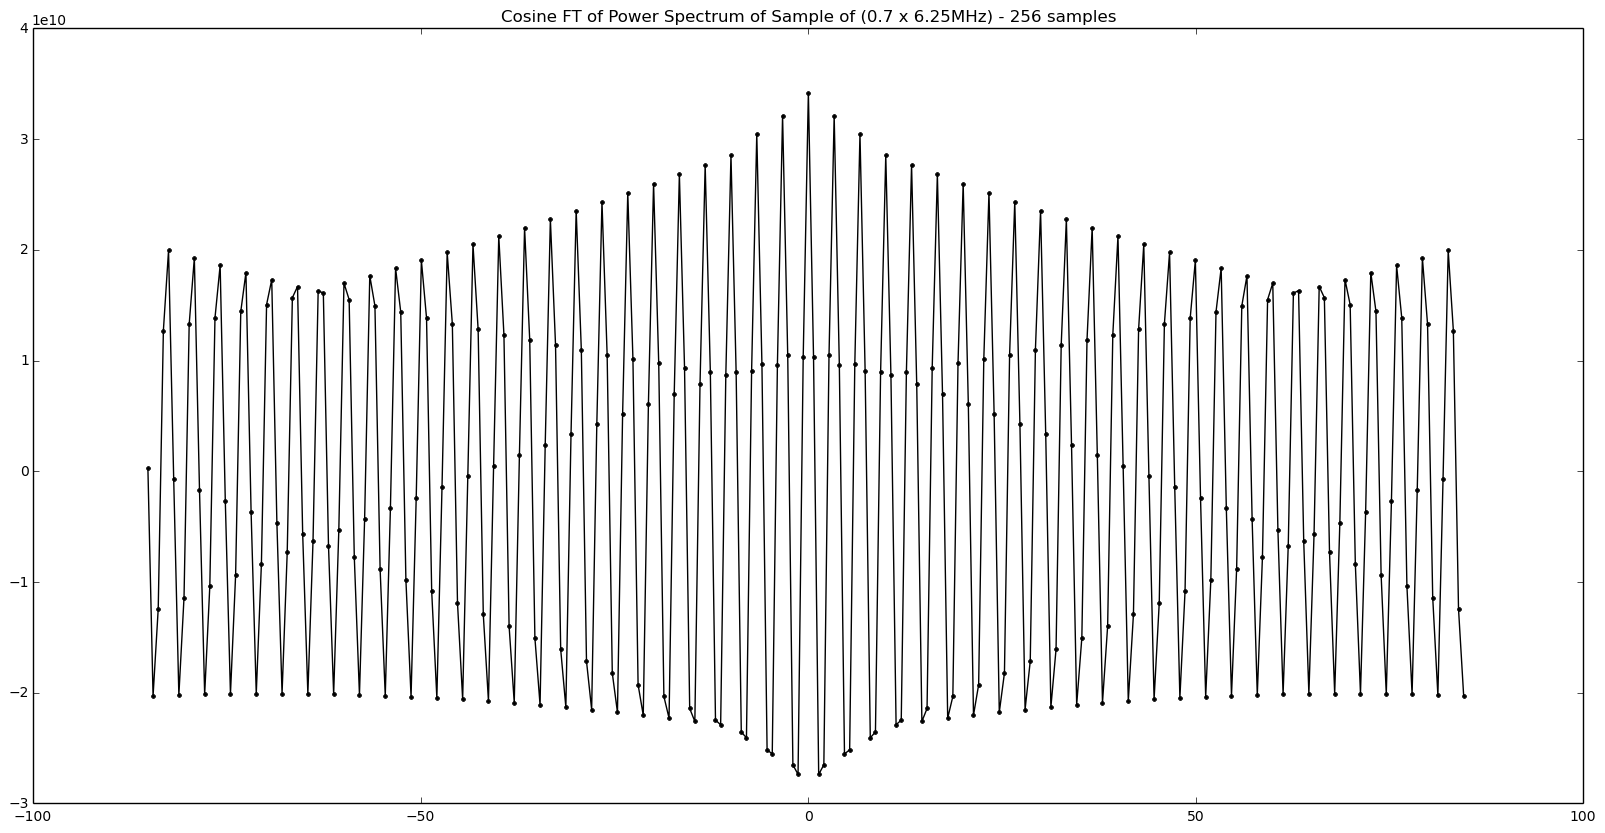

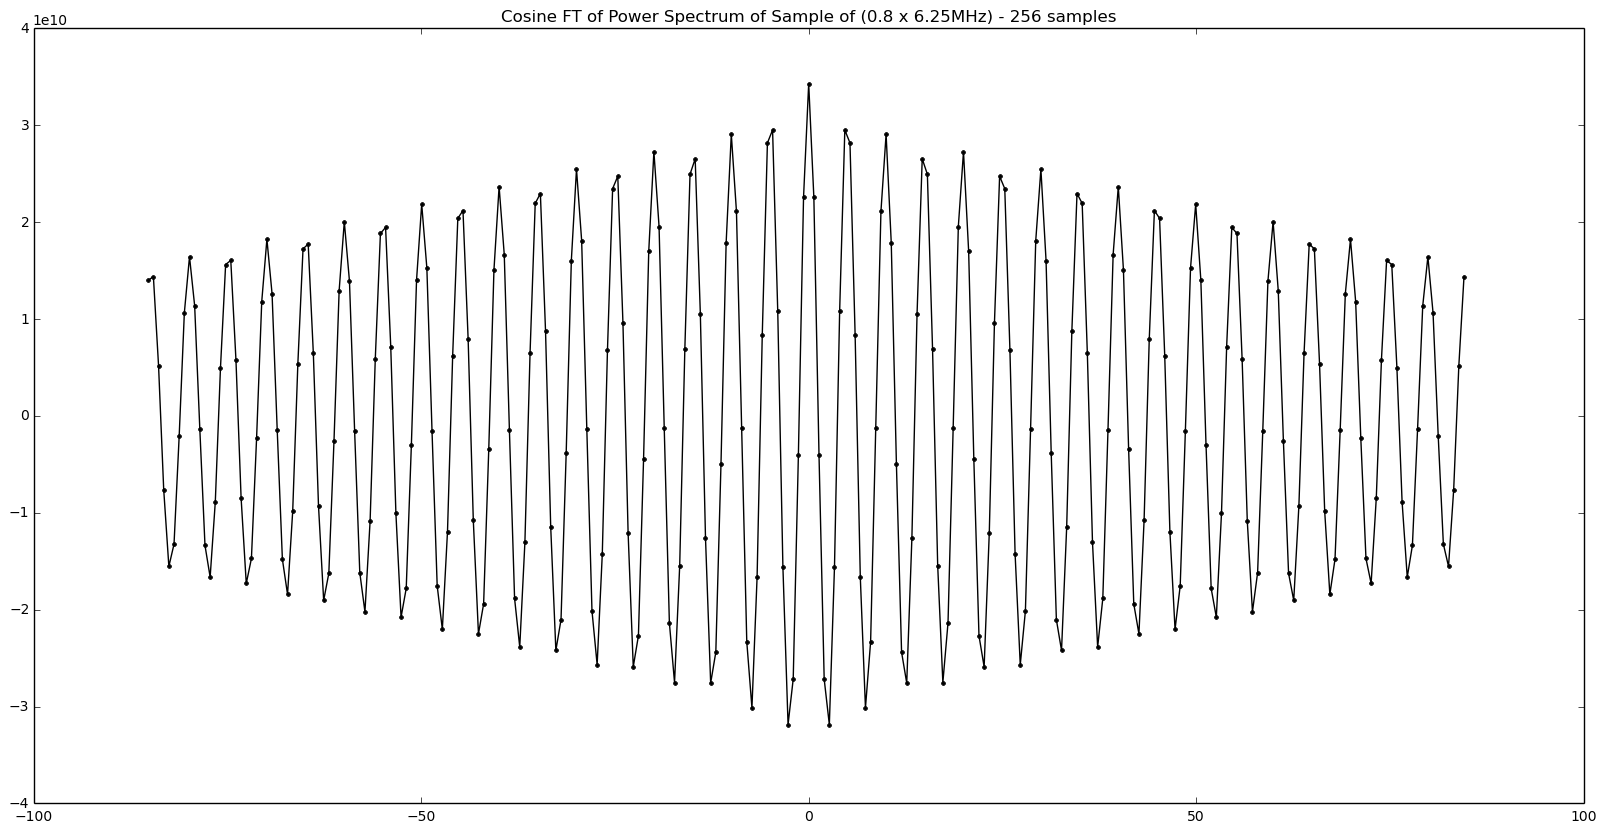

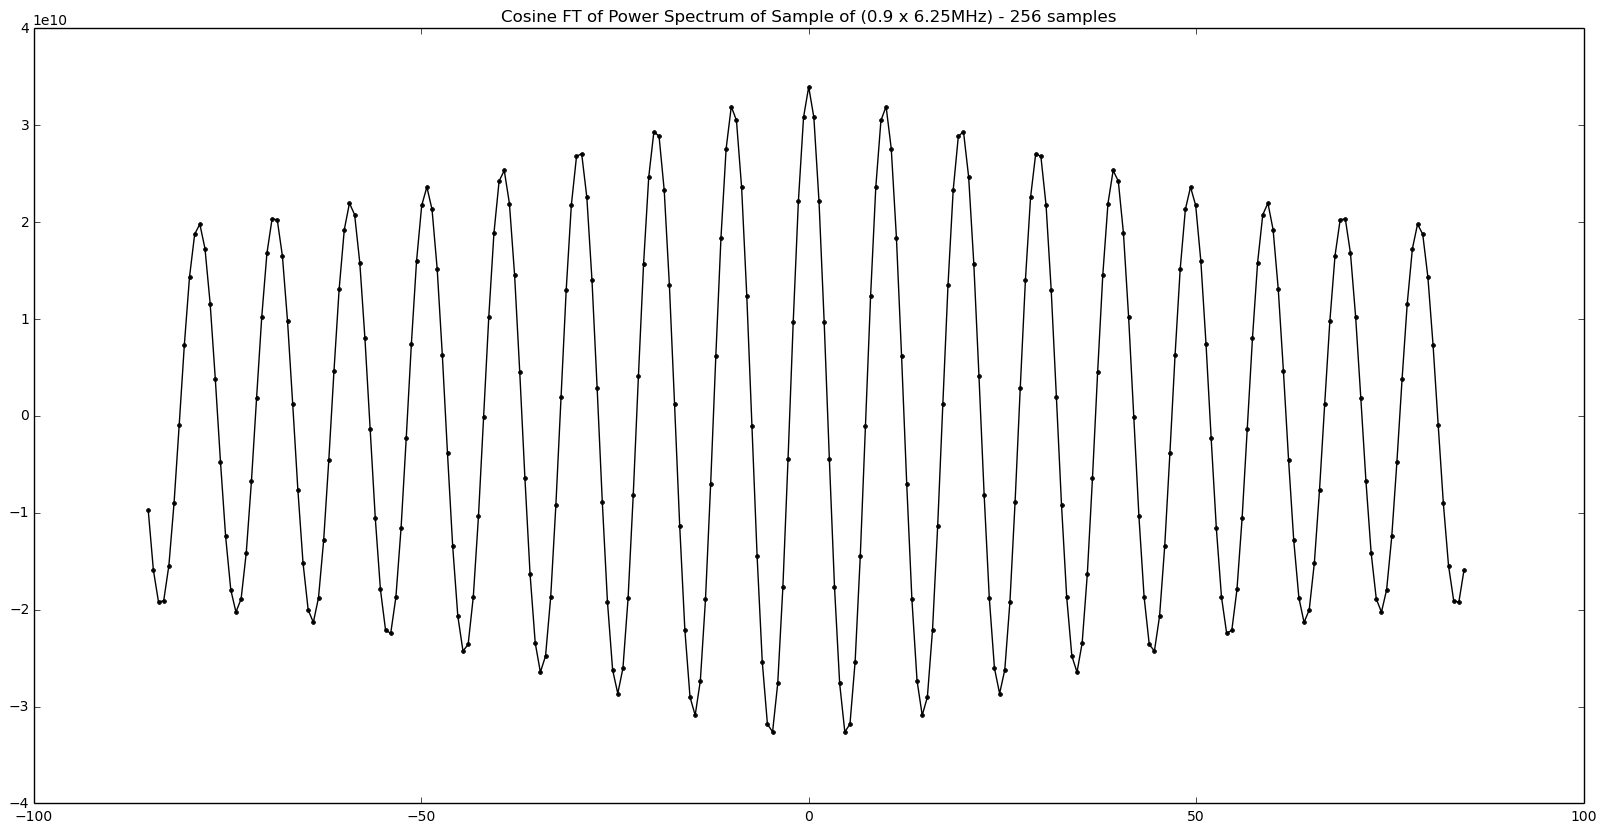

In [33]:
N = 256

chan = np.linspace((-6.25/2),(1 - 2/N) * (6.25/2),num=N,endpoint=False)
for i in range(1,10):
    arr_plot = np.load("sample_" + str(i) +".npy")
    pl.figure(i, figsize=(20,10))
    freq_new, voltage = ugradio.dft.dft(arr_plot[:N])
    #voltage = np.fft.fft(arr_plot[:N])
    power = np.abs(voltage)**2
    chan_new, inv_fourier = ugradio.dft.idft(power, f=freq_new)
    #inv_fourier = np.fft.ifft(power)
    pl.title("Cosine FT of Power Spectrum of Sample of (0." + str(i) + " x " + str(v_samp) + "MHz) - " + str(N) + " samples")
    pl.xlabel(Time )
    pl.plot(chan_new, inv_fourier, 'k.-')

ACF = np.correlate(voltage, voltage, mode="full")
ACF_times, FT_ACF = ugradio.dft.dft(ACF)
pl.figure(2, figsize=(20,10))
#pl.plot(ACF_times, FT_ACF, 'k.-')

In [ ]:
#3.4 - Leakage Power


256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256


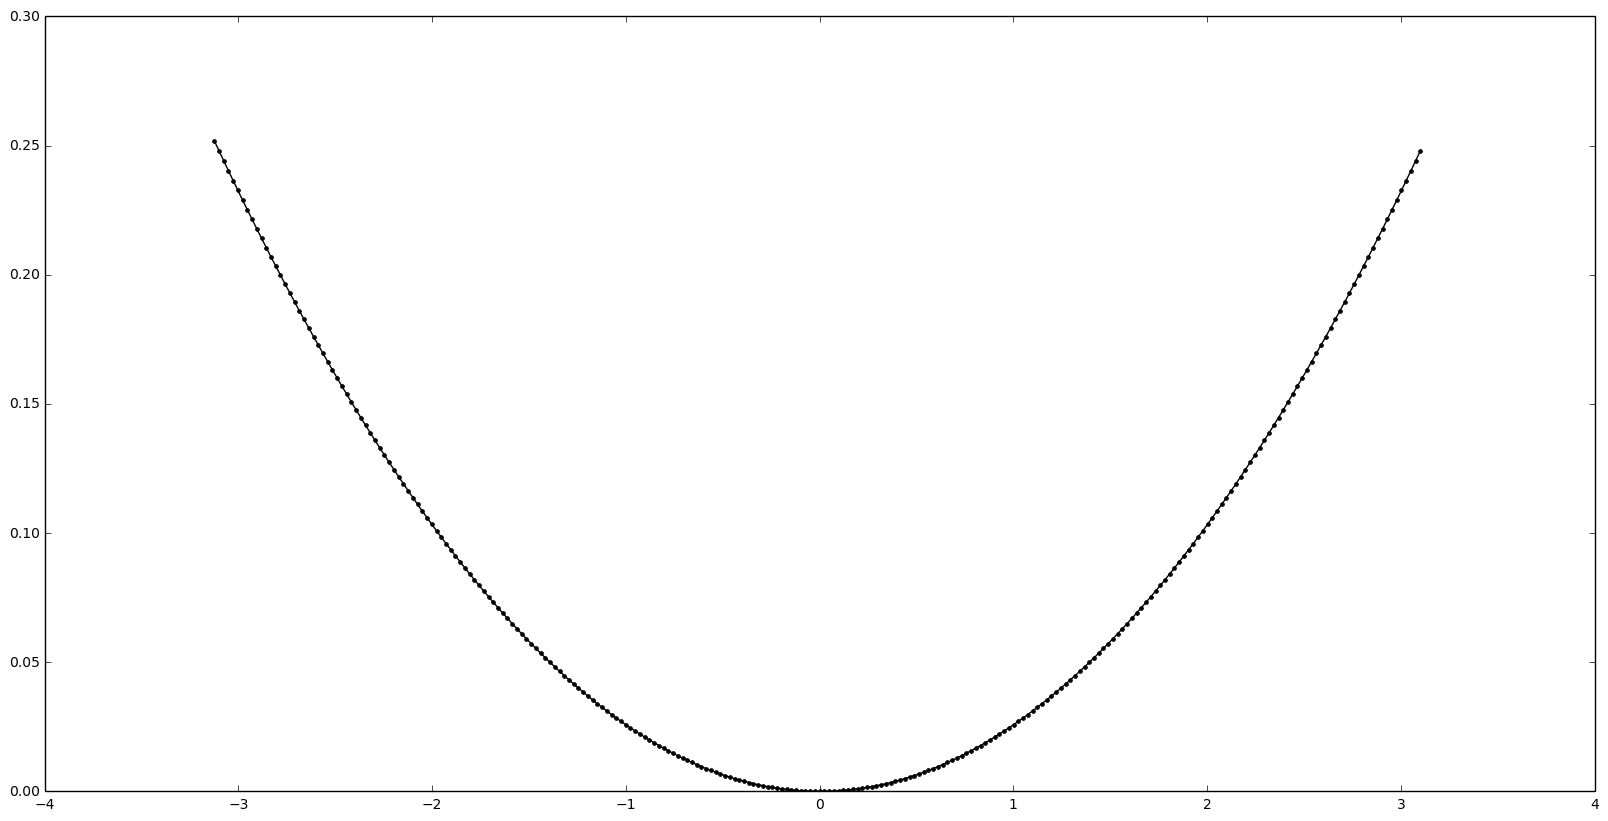

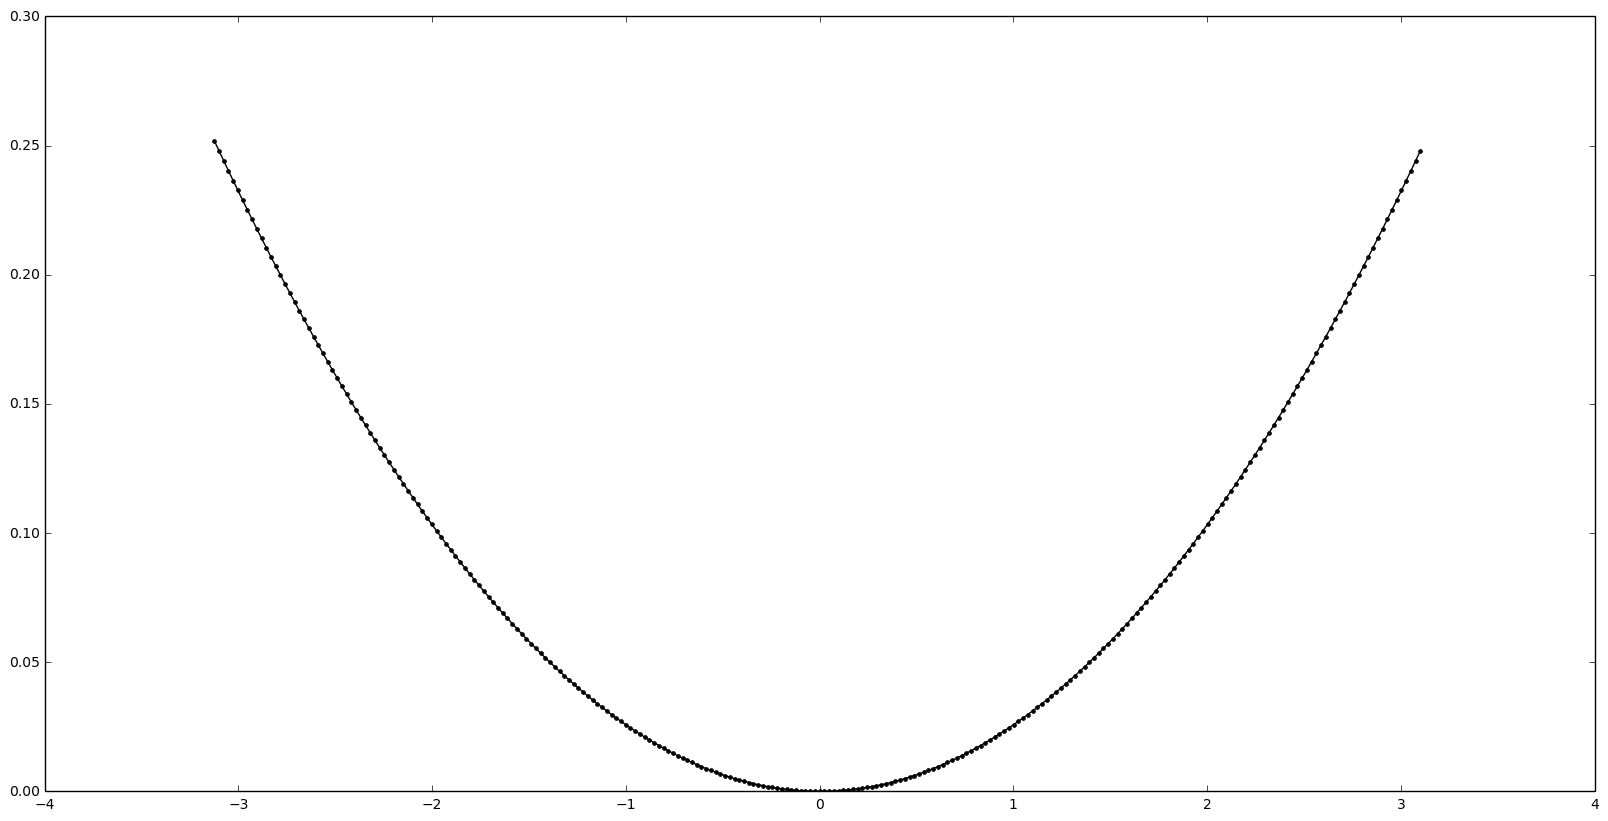

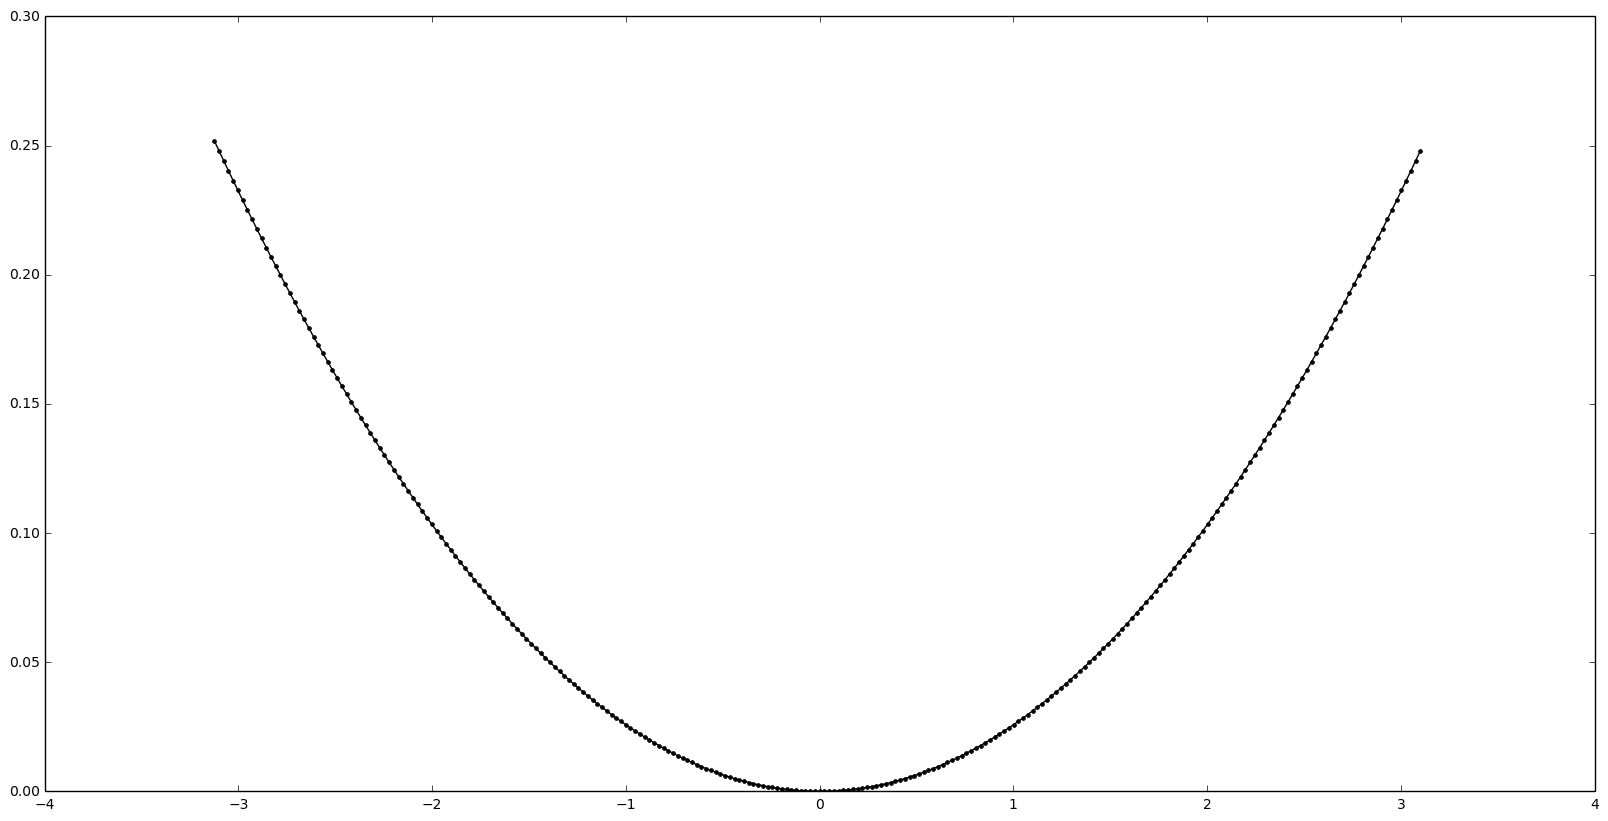

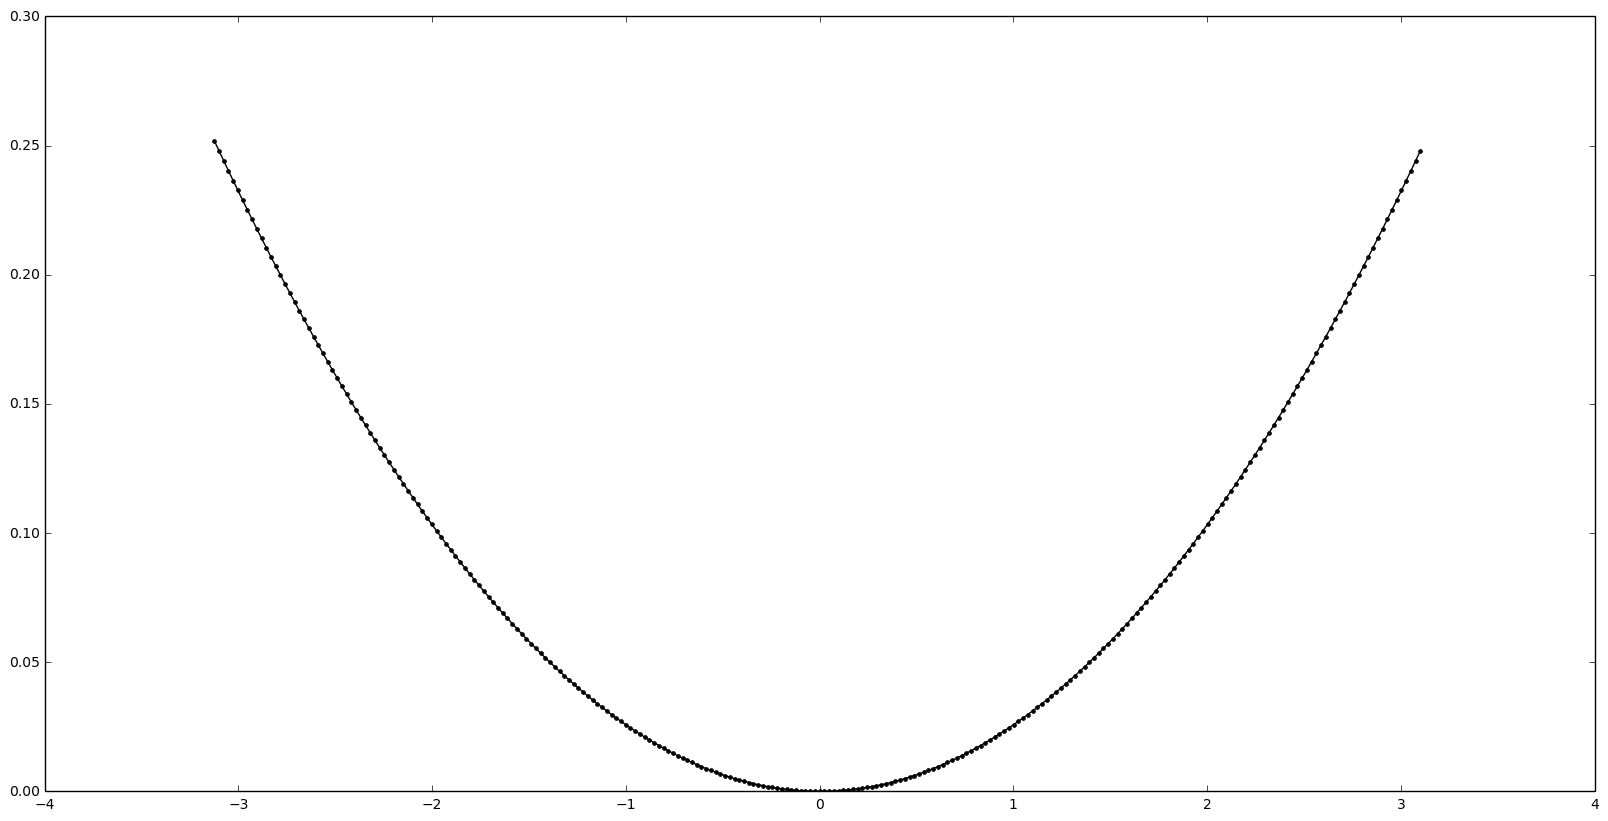

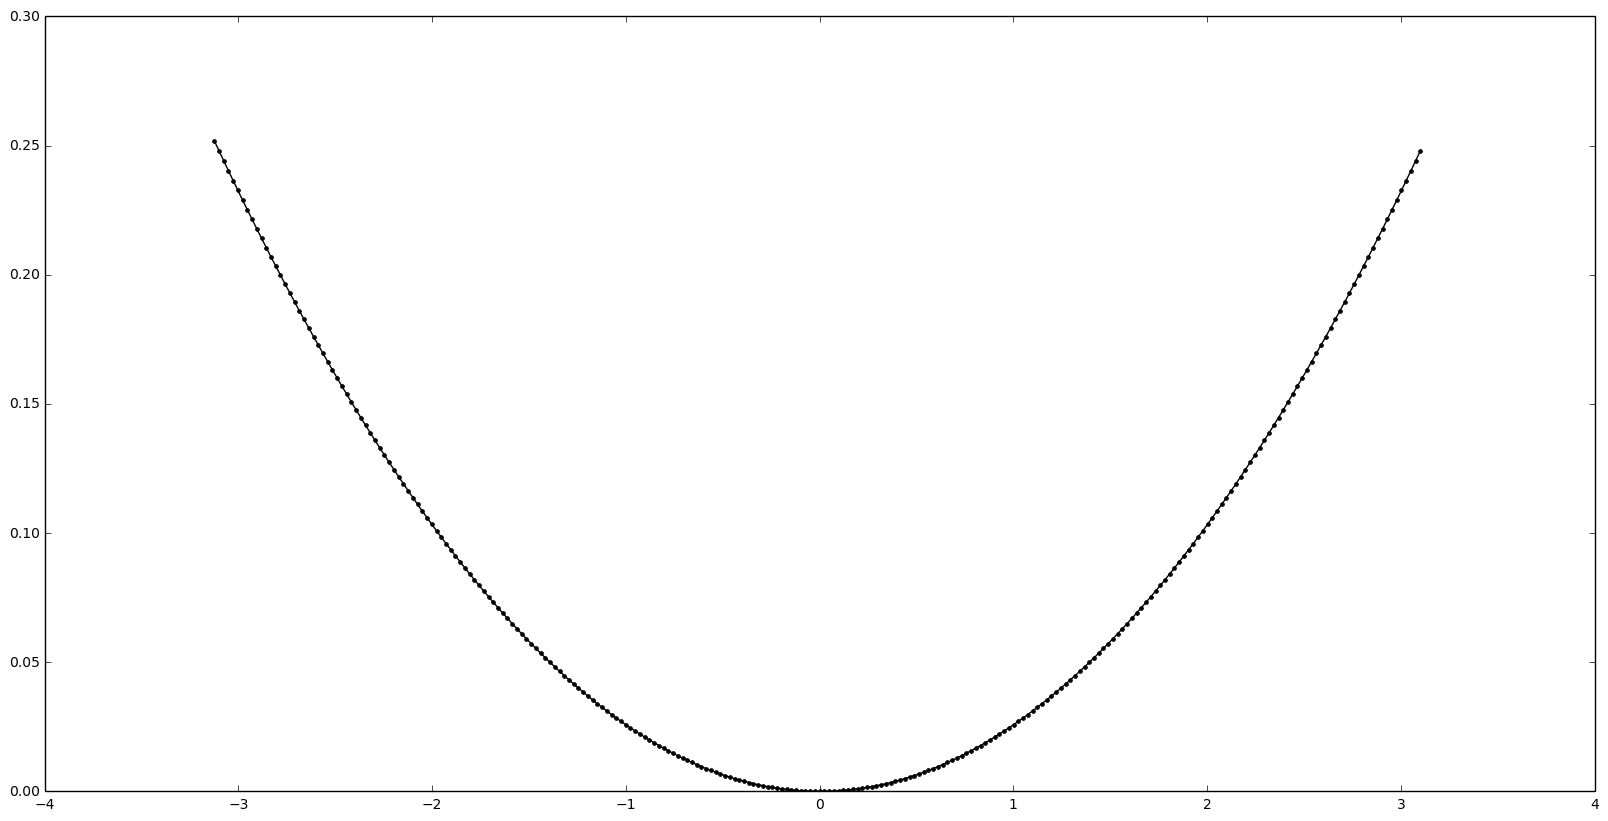

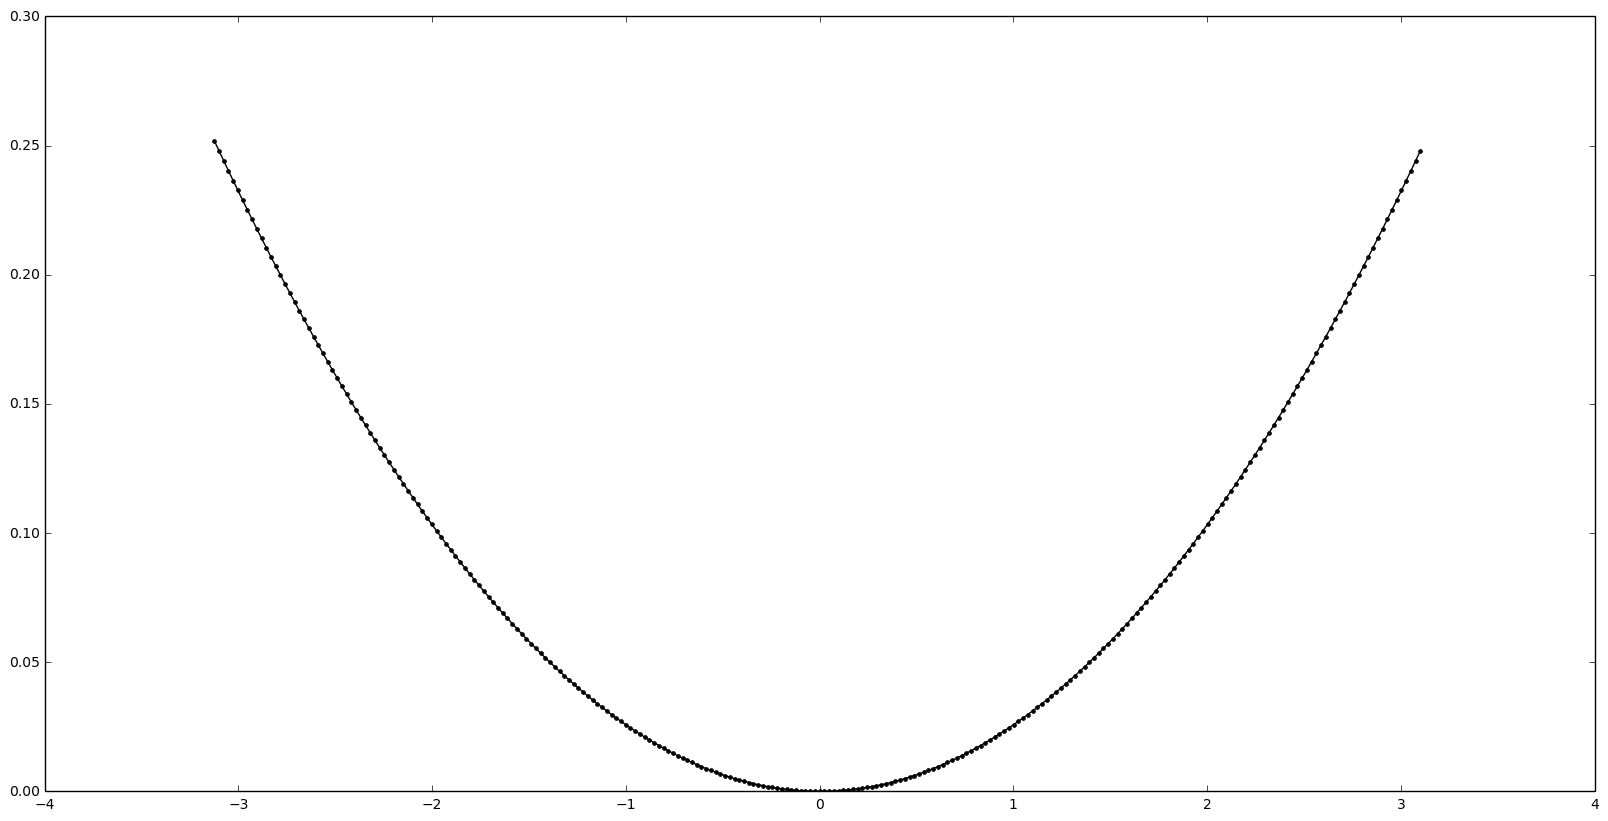

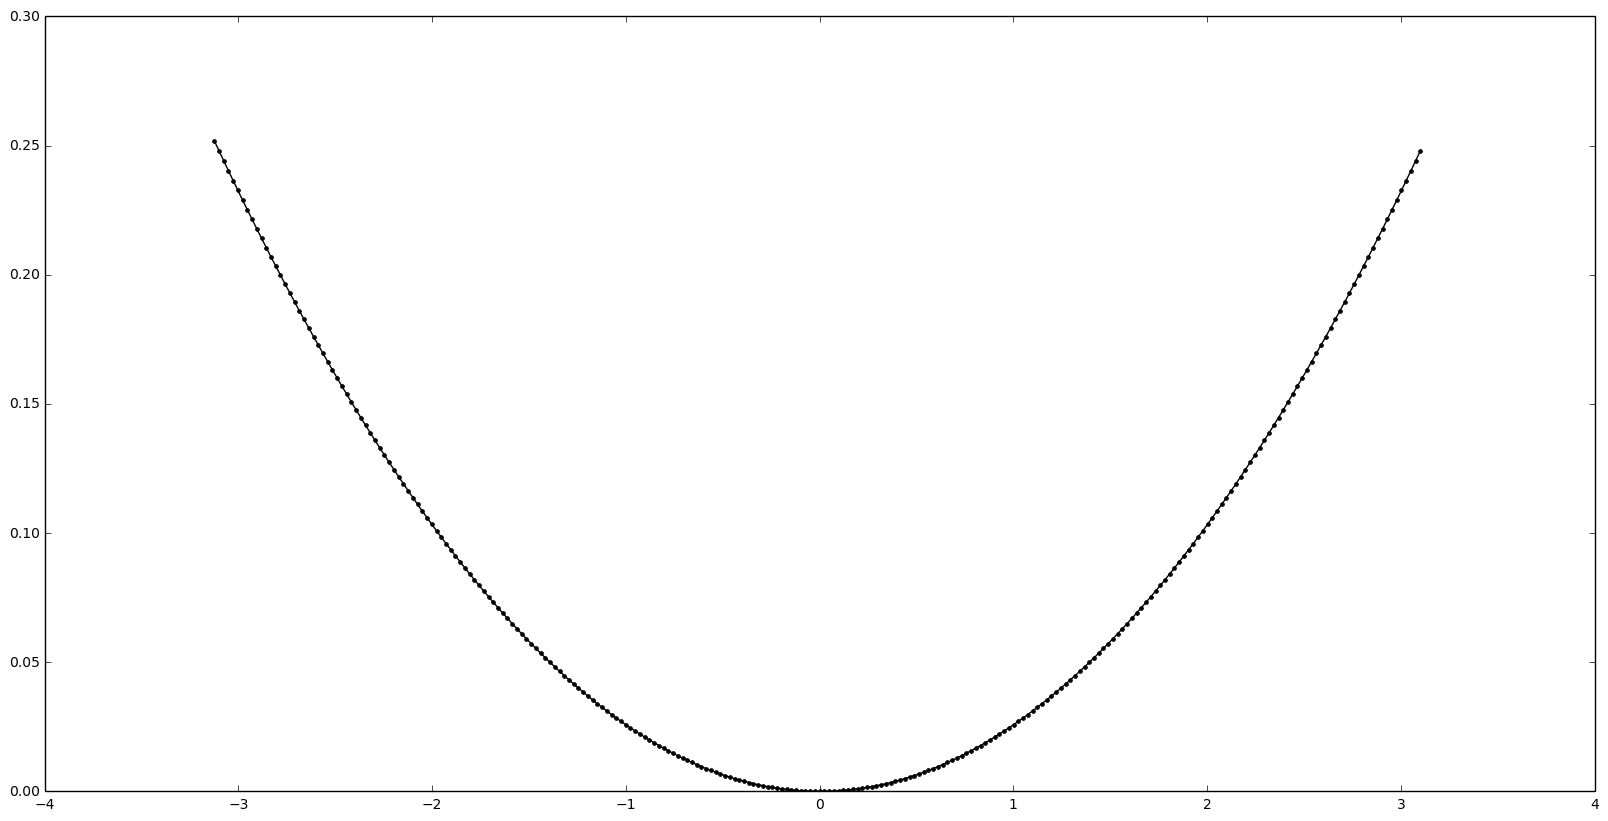

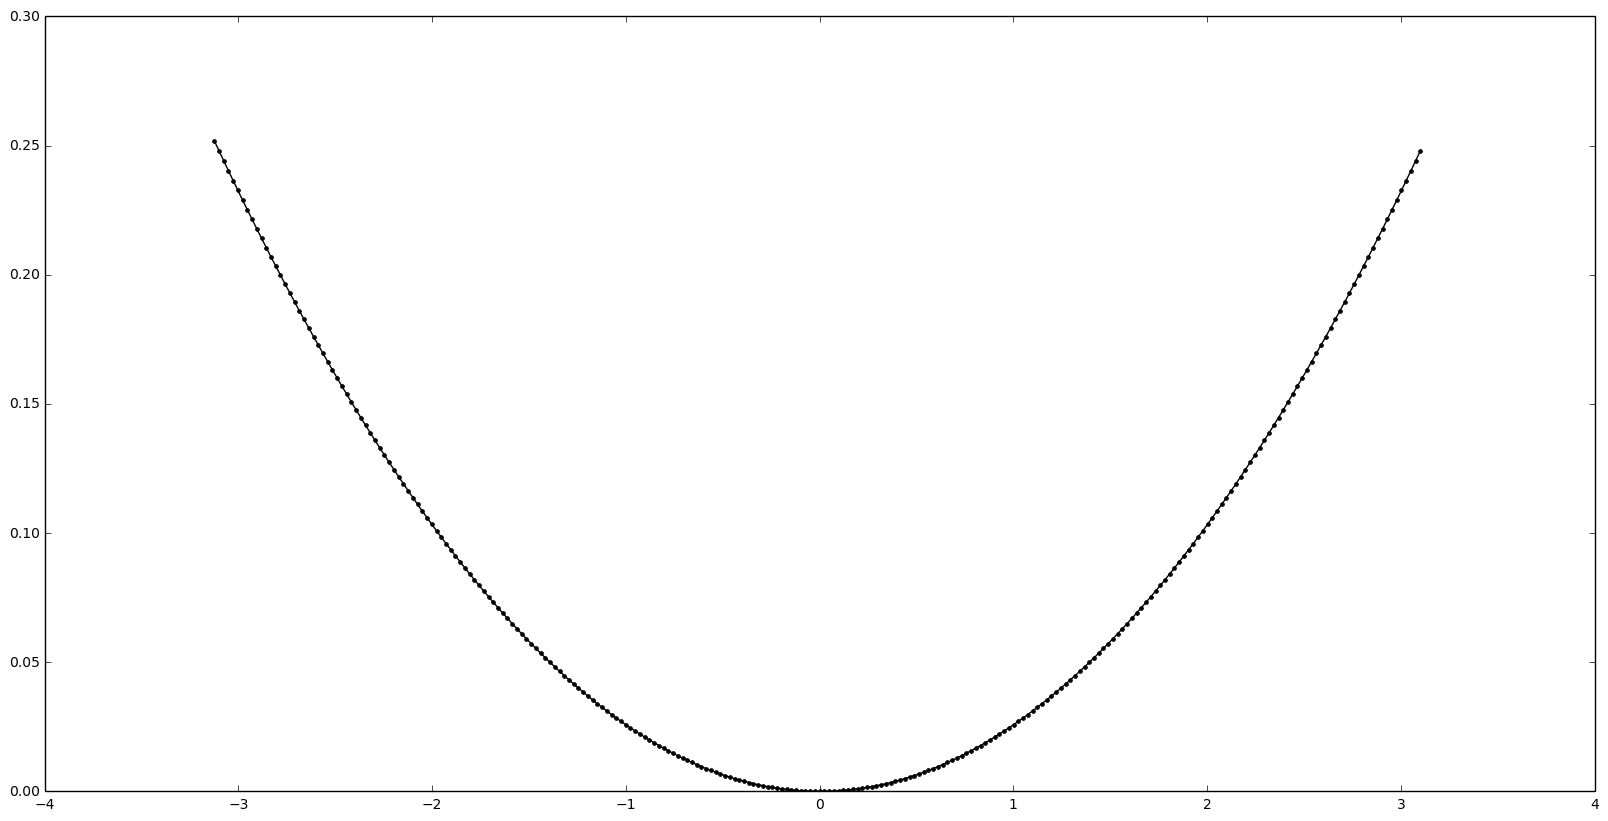

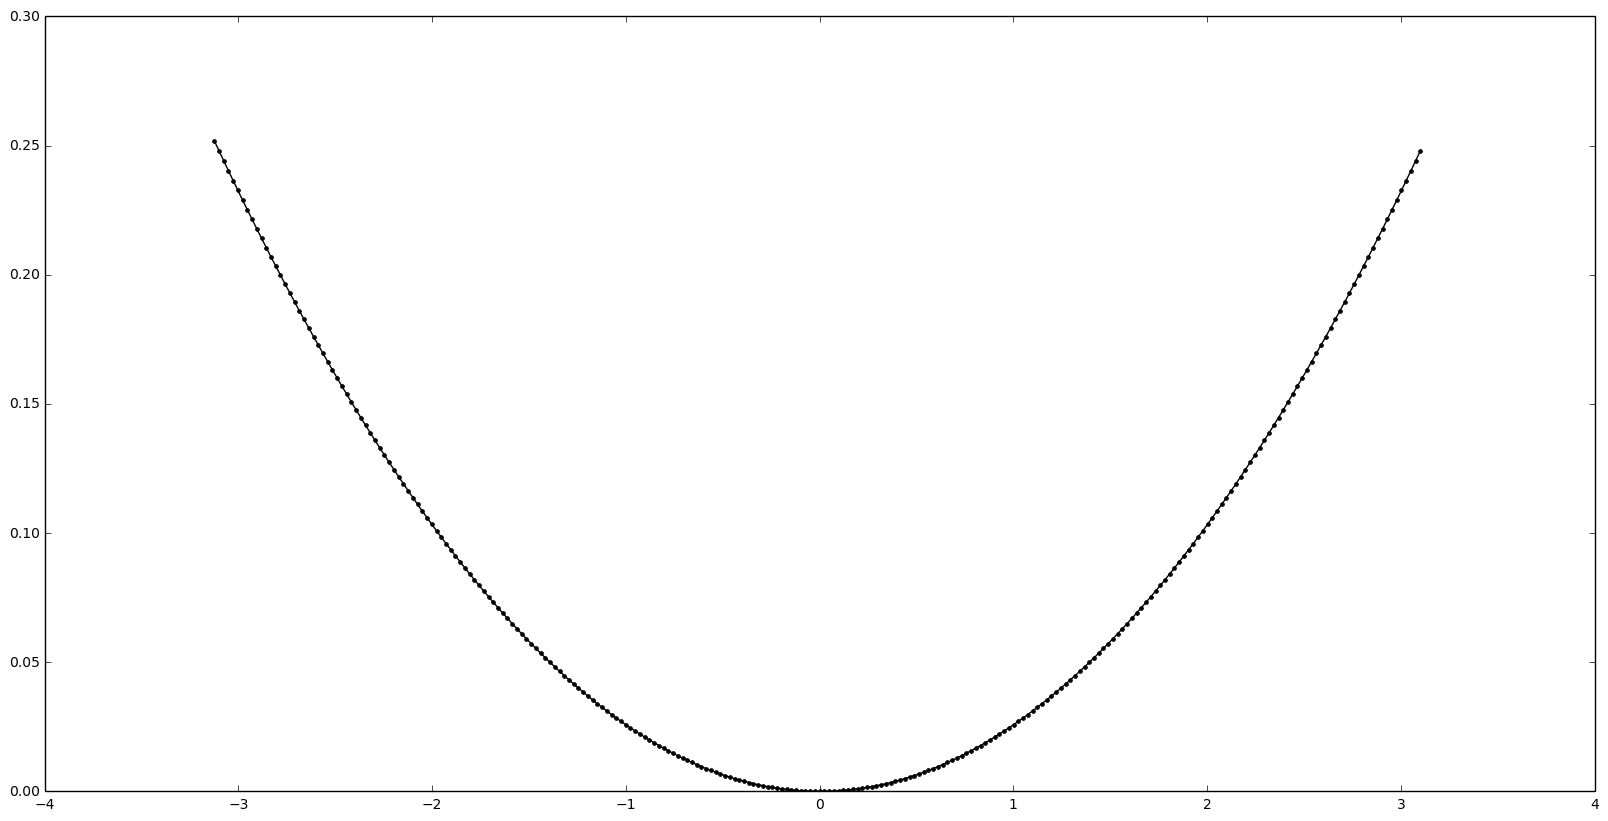

In [10]:
N = 256
freq = np.linspace((-6.25/2),(1 - 2/N) * (6.25/2),num=N,endpoint=False)
for i in range(1, 10):
    filename = "sample_" + str(i) + ".npy"
    arr_plot = np.load(filename)
    pl.figure(i, figsize=(20,10))
    fourier_test = ugradio.dft.dft(arr_plot[:N])
    fourier_test = np.abs(fourier_test)**2
    print len(fourier_test[0])
    print len(freq)
    pl.plot(freq, fourier_test[0], 'k.-')

[ -2560 -15104  13568 ...,  -7680  11776   5632]


(array([  2.,   1.,   1.,   3.,   1.,   6.,   6.,   6.,   9.,   8.,   4.,
         14.,  15.,  16.,  25.,  13.,  22.,  20.,  12.,   9.,  13.,  10.,
         11.,   7.,   7.,   3.,   4.,   4.,   1.,   1.,   1.,   1.]),
 array([-24064., -22520., -20976., -19432., -17888., -16344., -14800.,
        -13256., -11712., -10168.,  -8624.,  -7080.,  -5536.,  -3992.,
         -2448.,   -904.,    640.,   2184.,   3728.,   5272.,   6816.,
          8360.,   9904.,  11448.,  12992.,  14536.,  16080.,  17624.,
         19168.,  20712.,  22256.,  23800.,  25344.]),
 <a list of 32 Patch objects>)

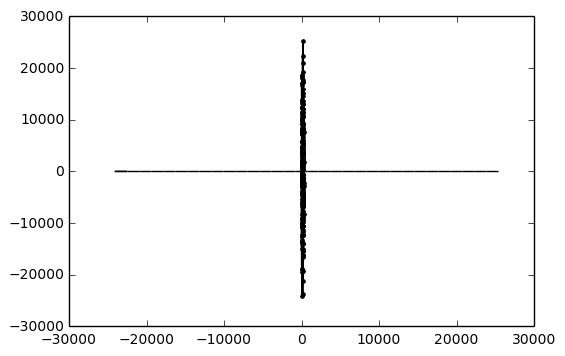

In [54]:
# 3.7 - Fourier Transforms of Noise
arr = ugradio.pico.read_socket("50mV")
print arr
pl.figurefigsize=(20,10)
pl.plot(arr[:256], 'k.-')
pl.hist(arr[:256], bins=)